In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = './'

In [2]:
df = pd.read_csv(path + 'train.csv')
df.head()

,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,190590,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3416326.0,7657
1,2017,190590,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,438747025.0,5294788
2,2017,190590,40,Austria,1.664750e+11,1.948099e+10,0.0,4403.247293,4.172380e+11,3.955690e+11,8797566,NaN,78.856460,8289.029297,453206357.0,335818
3,2017,190590,56,Belgium,4.064120e+11,1.948099e+10,0.0,3980.375563,5.026980e+11,4.757400e+11,11375158,NaN,72.409200,8722.114258,706524512.0,173709
4,2017,190590,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,31329648.0,122850


In [3]:
idx = df[df['TARIFF_AVG'].isnull()].index
df = df.drop(idx)
idx = df[df["KR_TRADE_HSCD_COUNTRYCD"] == 0.0].index
df = df.drop(idx)
idx = df[df["TRADE_HSCD_COUNTRYCD"].isnull()].index
df = df.drop(idx)
idx = df[df['PA_NUS_FCRF'].isnull()].index
df = df.drop(idx)
idx = df[df['SNDIST'].isnull()].index
df = df.drop(idx)

In [4]:
df.head()
df.to_csv('./main_clearNull.csv')

In [5]:
hcsd_uniq = df['HSCD'].unique()
for i in range(len(df['HSCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['HSCD'].iloc[i]:
      df['HSCD'].iloc[i] = (x+1)
      break

df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,1,12,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657
1,2017,1,36,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788
4,2017,1,76,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850
5,2017,1,104,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082
6,2017,1,124,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171


In [6]:
hcsd_uniq = df['COUNTRYCD'].unique()
for i in range(len(df['COUNTRYCD'])):
  for x in range(len(hcsd_uniq)):
    if hcsd_uniq[x] == df['COUNTRYCD'].iloc[i]:
      df['COUNTRYCD'].iloc[i] = (x+1)
      break
#df['TARIFF_AVG'] = df['TARIFF_AVG'] / 100
#df['IC_BUS_EASE_DFRN_DB'] = df['IC_BUS_EASE_DFRN_DB'] / 100
#df['KMDIST'] = df['KMDIST']/100 # total -> divided 10000
#df['gdp_percent'] = df['gdp_percent'] / 100


######################################################################
df.head()

/home/jihoon/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,UNC_YEAR,HSCD,COUNTRYCD,COUNTRYNM,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,2017,1,1,Algeria,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657
1,2017,1,2,Australia,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788
4,2017,1,3,Brazil,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850
5,2017,1,4,Myanmar,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082
6,2017,1,5,Canada,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171


In [7]:
df = df.drop(columns=['UNC_YEAR', 'COUNTRYNM'])# 'SNDIST', 'PA_NUS_FCRF'])

In [8]:
df.head()

,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD
0,1,1,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657
1,1,2,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788
4,1,3,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850
5,1,4,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082
6,1,5,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171


<AxesSubplot:>

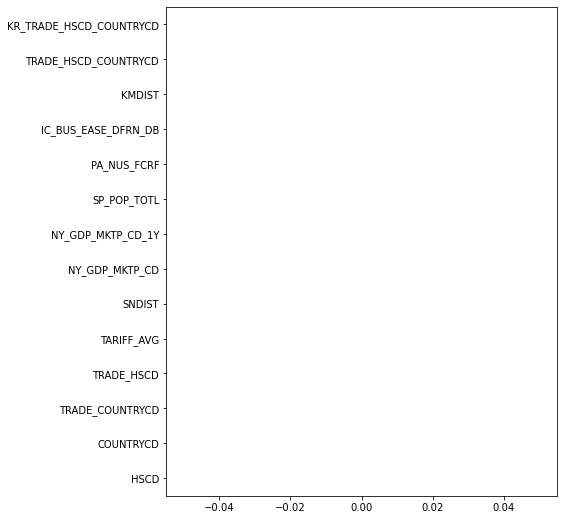

In [9]:
df.isnull().mean().plot.barh(figsize=(7,9))

In [10]:
df.shape


(17269, 14)

In [11]:
df["item_total_percent"] = df["TRADE_HSCD_COUNTRYCD"]/ df["TRADE_COUNTRYCD"] * 100
df["item_world_percent"] = df["TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD"] * 100
df["gdp_percent"] = df["NY_GDP_MKTP_CD"] / df["NY_GDP_MKTP_CD_1Y"] * 100
df["next_year_percent"] = df["KR_TRADE_HSCD_COUNTRYCD"] / df["TRADE_HSCD_COUNTRYCD"] * 100
df["next_year_percent"]

0        0.224130
1        1.206797
4        0.392121
5        4.945077
6        0.652893
           ...   
21098    0.870154
21099    2.552436
21100    0.412353
21101    0.273898
21102    6.848066
Name: next_year_percent, Length: 17269, dtype: float64

In [12]:
df.head()
# df = df.drop('KR_TRADE_HSCD_COUNTRYCD', axis=1).copy()
# df = df.drop('TRADE_HSCD_COUNTRYCD', axis=1).copy()

,HSCD,COUNTRYCD,TRADE_COUNTRYCD,TRADE_HSCD,TARIFF_AVG,SNDIST,NY_GDP_MKTP_CD,NY_GDP_MKTP_CD_1Y,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,TRADE_HSCD_COUNTRYCD,KR_TRADE_HSCD_COUNTRYCD,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,1,4.605299e+10,1.948099e+10,30.0,3878.238437,1.701630e+11,1.599950e+11,41389198,110.973017,46.109810,9954.009766,3.416326e+06,7657,0.007418,0.017537,106.355199,0.224130
1,1,2,2.284420e+11,1.948099e+10,0.0,12203.155980,1.329190e+12,1.208850e+12,24601860,1.304758,80.223690,8329.652344,4.387470e+08,5294788,0.192061,2.252181,109.954916,1.206797
4,1,3,1.507490e+11,1.948099e+10,18.0,9644.206941,2.062830e+12,1.795700e+12,207833831,3.191389,55.382403,18364.505860,3.132965e+07,122850,0.020783,0.160822,114.876093,0.392121
5,1,4,1.925344e+10,1.948099e+10,5.0,5891.659995,6.894587e+10,6.718424e+10,53382581,1360.358707,42.671390,3796.142578,1.276182e+07,631082,0.066283,0.065509,102.622089,4.945077
6,1,5,4.324050e+11,1.948099e+10,0.0,7911.783801,1.649880e+12,1.528240e+12,36543321,1.297936,79.540940,10617.703130,1.113991e+09,7273171,0.257627,5.718352,107.959483,0.652893


In [13]:
#df['KMDIST'] = df['KMDIST']/100
#df = df.drop(columns=['SP_POP_TOTL', 'KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [14]:

df['KMDIST'] = df['KMDIST'] / 100
df['SNDIST'] = df['SNDIST'] / 100
df['SP_POP_TOTL'] = (df['SP_POP_TOTL'] - df['SP_POP_TOTL'].min()) / (df['SP_POP_TOTL'].max() - df['SP_POP_TOTL'].min())
# 'SP_POP_TOTL', 
df = df.drop(columns=['KR_TRADE_HSCD_COUNTRYCD', 'TRADE_HSCD_COUNTRYCD', 'TRADE_COUNTRYCD', 'TRADE_HSCD', 'NY_GDP_MKTP_CD', 'NY_GDP_MKTP_CD_1Y'])

In [15]:
df.head()

,HSCD,COUNTRYCD,TARIFF_AVG,SNDIST,SP_POP_TOTL,PA_NUS_FCRF,IC_BUS_EASE_DFRN_DB,KMDIST,item_total_percent,item_world_percent,gdp_percent,next_year_percent
0,1,1,30.0,38.782384,0.027670,110.973017,46.109810,99.540098,0.007418,0.017537,106.355199,0.224130
1,1,2,0.0,122.031560,0.015534,1.304758,80.223690,83.296523,0.192061,2.252181,109.954916,1.206797
4,1,3,18.0,96.442069,0.147996,3.191389,55.382403,183.645059,0.020783,0.160822,114.876093,0.392121
5,1,4,5.0,58.916600,0.036340,1360.358707,42.671390,37.961426,0.066283,0.065509,102.622089,4.945077
6,1,5,0.0,79.117838,0.024167,1.297936,79.540940,106.177031,0.257627,5.718352,107.959483,0.652893


In [16]:
df.to_csv('./norm.csv')

In [17]:
print(df.shape)
tr = int(df.shape[0]*6/10) # Train
te = int((df.shape[0] - tr)/2) # Test (actually Train)
va = df.shape[0] - tr - te # Validation (actually Test)
print(tr,te, va)

(17269, 12)
10361 3454 3454


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opti
torch.manual_seed(1015)
device = torch.device("cuda")

In [19]:
import torch
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

x_train = torch.FloatTensor(df.iloc[:tr+te,:-1].values).to(device)
y_train = torch.FloatTensor(df.iloc[:tr+te,-1].values).to(device)
x_test = torch.FloatTensor(df.iloc[tr+te:,:-1].values).to(device)
y_test = torch.FloatTensor(df.iloc[tr+te:,-1].values).to(device)

max(y_train)
y_train = torch.reshape(y_train, (-1,1))


In [20]:
y_test = y_test.reshape(-1,1)

In [21]:
len(df)

17269

In [22]:
print(x_train.shape)
print(y_train.shape)
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

torch.Size([13815, 11])
torch.Size([13815, 1])


In [23]:
class DeepModel(nn.Module):
  def __init__(self, in_channel, out_channel):
    super(DeepModel, self).__init__()

    self.basic = nn.BatchNorm1d(in_channel)
    self.layer1 = nn.Linear(in_channel, 256)
    self.dropout1 = nn.Dropout(0.5)
    self.bn1 = nn.BatchNorm1d(256)
    self.layer2 = nn.Linear(256, 64)
    self.dropout2 = nn.Dropout(0.5)
    self.bn2 = nn.BatchNorm1d(64)
    self.head = nn.Linear(64, out_channel)

  def forward(self, x):
    x = x.to(device)
    x = self.basic(x)
    x = F.relu(self.bn1(self.layer1(x)))
    x = self.dropout1(x)
    x = F.relu(self.bn2(self.layer2(x)))
    x = self.dropout2(x)
    
    return self.head(x)


# model = nn.Linear(9,1).to(device)
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [170]:
optimizer = torch.optim.Adam(deepmodel.parameters(), lr=1e-5)

# L2 Loss model

In [171]:
n_epochs = 100
loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel(x_train).to(device)
    cost = F.mse_loss(y_train, pred)
    loss_list.append(cost)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/216  cost : 2293.87548828125
Ep 0/100  Batch 2/216  cost : 248.73062133789062
Ep 0/100  Batch 3/216  cost : 476.80853271484375
Ep 0/100  Batch 4/216  cost : 640.7259521484375
Ep 0/100  Batch 5/216  cost : 2080.305419921875
Ep 0/100  Batch 6/216  cost : 2147.80517578125
Ep 0/100  Batch 7/216  cost : 19700.05859375
Ep 0/100  Batch 8/216  cost : 152.30917358398438
Ep 0/100  Batch 9/216  cost : 1570.106201171875
Ep 0/100  Batch 10/216  cost : 1403.9708251953125
Ep 0/100  Batch 11/216  cost : 1833.7657470703125
Ep 0/100  Batch 12/216  cost : 249.89524841308594
Ep 0/100  Batch 13/216  cost : 617.5737915039062
Ep 0/100  Batch 14/216  cost : 98.21524047851562
Ep 0/100  Batch 15/216  cost : 113.39445495605469
Ep 0/100  Batch 16/216  cost : 540.743408203125
Ep 0/100  Batch 17/216  cost : 1238.5849609375
Ep 0/100  Batch 18/216  cost : 561.330810546875
Ep 0/100  Batch 19/216  cost : 369.54473876953125
Ep 0/100  Batch 20/216  cost : 80.43170928955078
Ep 0/100  Batch 21/216  cost :

Ep 1/100  Batch 24/216  cost : 245.03863525390625
Ep 1/100  Batch 25/216  cost : 44.92243194580078
Ep 1/100  Batch 26/216  cost : 502.0842590332031
Ep 1/100  Batch 27/216  cost : 160.1741943359375
Ep 1/100  Batch 28/216  cost : 113.5542984008789
Ep 1/100  Batch 29/216  cost : 61.050559997558594
Ep 1/100  Batch 30/216  cost : 57.84727478027344
Ep 1/100  Batch 31/216  cost : 37.35846710205078
Ep 1/100  Batch 32/216  cost : 49.33335876464844
Ep 1/100  Batch 33/216  cost : 895.159912109375
Ep 1/100  Batch 34/216  cost : 93.22517395019531
Ep 1/100  Batch 35/216  cost : 179.43008422851562
Ep 1/100  Batch 36/216  cost : 80.87557983398438
Ep 1/100  Batch 37/216  cost : 137.39920043945312
Ep 1/100  Batch 38/216  cost : 142.29881286621094
Ep 1/100  Batch 39/216  cost : 147.22430419921875
Ep 1/100  Batch 40/216  cost : 37.66053009033203
Ep 1/100  Batch 41/216  cost : 23.584339141845703
Ep 1/100  Batch 42/216  cost : 327.3216247558594
Ep 1/100  Batch 43/216  cost : 36.501766204833984
Ep 1/100  Bat

Ep 2/100  Batch 48/216  cost : 53.92581558227539
Ep 2/100  Batch 49/216  cost : 353.542724609375
Ep 2/100  Batch 50/216  cost : 92.21772003173828
Ep 2/100  Batch 51/216  cost : 158.51681518554688
Ep 2/100  Batch 52/216  cost : 340.4541015625
Ep 2/100  Batch 53/216  cost : 645.4105224609375
Ep 2/100  Batch 54/216  cost : 155.1479034423828
Ep 2/100  Batch 55/216  cost : 135.58148193359375
Ep 2/100  Batch 56/216  cost : 147.1212158203125
Ep 2/100  Batch 57/216  cost : 215.21115112304688
Ep 2/100  Batch 58/216  cost : 36.35157775878906
Ep 2/100  Batch 59/216  cost : 95.50743865966797
Ep 2/100  Batch 60/216  cost : 170790.78125
Ep 2/100  Batch 61/216  cost : 2528.6162109375
Ep 2/100  Batch 62/216  cost : 3112.21435546875
Ep 2/100  Batch 63/216  cost : 468.15264892578125
Ep 2/100  Batch 64/216  cost : 124.9247817993164
Ep 2/100  Batch 65/216  cost : 9298.814453125
Ep 2/100  Batch 66/216  cost : 8698.19921875
Ep 2/100  Batch 67/216  cost : 6652.57763671875
Ep 2/100  Batch 68/216  cost : 6044.

Ep 3/100  Batch 74/216  cost : 385.6374816894531
Ep 3/100  Batch 75/216  cost : 60.20457458496094
Ep 3/100  Batch 76/216  cost : 164.02993774414062
Ep 3/100  Batch 77/216  cost : 895.011962890625
Ep 3/100  Batch 78/216  cost : 457.9165954589844
Ep 3/100  Batch 79/216  cost : 330.4116516113281
Ep 3/100  Batch 80/216  cost : 103.52340698242188
Ep 3/100  Batch 81/216  cost : 227.7259979248047
Ep 3/100  Batch 82/216  cost : 44.53243637084961
Ep 3/100  Batch 83/216  cost : 147.6343994140625
Ep 3/100  Batch 84/216  cost : 115.1241683959961
Ep 3/100  Batch 85/216  cost : 154.0087127685547
Ep 3/100  Batch 86/216  cost : 1999.4742431640625
Ep 3/100  Batch 87/216  cost : 132.45297241210938
Ep 3/100  Batch 88/216  cost : 1483.2115478515625
Ep 3/100  Batch 89/216  cost : 206.58111572265625
Ep 3/100  Batch 90/216  cost : 97.12356567382812
Ep 3/100  Batch 91/216  cost : 295.3228454589844
Ep 3/100  Batch 92/216  cost : 103.43905639648438
Ep 3/100  Batch 93/216  cost : 72.92070007324219
Ep 3/100  Batc

Ep 4/100  Batch 101/216  cost : 397.20782470703125
Ep 4/100  Batch 102/216  cost : 25.73504638671875
Ep 4/100  Batch 103/216  cost : 25.32305908203125
Ep 4/100  Batch 104/216  cost : 31.45512580871582
Ep 4/100  Batch 105/216  cost : 50.20302200317383
Ep 4/100  Batch 106/216  cost : 162.82579040527344
Ep 4/100  Batch 107/216  cost : 112.74821472167969
Ep 4/100  Batch 108/216  cost : 73.65568542480469
Ep 4/100  Batch 109/216  cost : 133.4115447998047
Ep 4/100  Batch 110/216  cost : 137.91339111328125
Ep 4/100  Batch 111/216  cost : 91.831298828125
Ep 4/100  Batch 112/216  cost : 151.30599975585938
Ep 4/100  Batch 113/216  cost : 305.64324951171875
Ep 4/100  Batch 114/216  cost : 845.6309204101562
Ep 4/100  Batch 115/216  cost : 127.5947265625
Ep 4/100  Batch 116/216  cost : 56.50519561767578
Ep 4/100  Batch 117/216  cost : 130.29867553710938
Ep 4/100  Batch 118/216  cost : 218.26950073242188
Ep 4/100  Batch 119/216  cost : 1466.627197265625
Ep 4/100  Batch 120/216  cost : 1425.9833984375

Ep 5/100  Batch 126/216  cost : 63.701416015625
Ep 5/100  Batch 127/216  cost : 110.53443908691406
Ep 5/100  Batch 128/216  cost : 496.3353576660156
Ep 5/100  Batch 129/216  cost : 41.224571228027344
Ep 5/100  Batch 130/216  cost : 229.0418701171875
Ep 5/100  Batch 131/216  cost : 123.18536376953125
Ep 5/100  Batch 132/216  cost : 49.42112350463867
Ep 5/100  Batch 133/216  cost : 107.59931182861328
Ep 5/100  Batch 134/216  cost : 151.8377685546875
Ep 5/100  Batch 135/216  cost : 67.61241149902344
Ep 5/100  Batch 136/216  cost : 78.64338684082031
Ep 5/100  Batch 137/216  cost : 336.94940185546875
Ep 5/100  Batch 138/216  cost : 58.039215087890625
Ep 5/100  Batch 139/216  cost : 158.49508666992188
Ep 5/100  Batch 140/216  cost : 401.48907470703125
Ep 5/100  Batch 141/216  cost : 114.41924285888672
Ep 5/100  Batch 142/216  cost : 609.1845703125
Ep 5/100  Batch 143/216  cost : 131.27732849121094
Ep 5/100  Batch 144/216  cost : 24.507949829101562
Ep 5/100  Batch 145/216  cost : 38.174812316

Ep 6/100  Batch 152/216  cost : 1422.5091552734375
Ep 6/100  Batch 153/216  cost : 133.02699279785156
Ep 6/100  Batch 154/216  cost : 302.0788879394531
Ep 6/100  Batch 155/216  cost : 505.1173400878906
Ep 6/100  Batch 156/216  cost : 409.0782470703125
Ep 6/100  Batch 157/216  cost : 204.44384765625
Ep 6/100  Batch 158/216  cost : 196.06765747070312
Ep 6/100  Batch 159/216  cost : 89.78773498535156
Ep 6/100  Batch 160/216  cost : 139.24429321289062
Ep 6/100  Batch 161/216  cost : 190.18746948242188
Ep 6/100  Batch 162/216  cost : 474.556640625
Ep 6/100  Batch 163/216  cost : 177635.609375
Ep 6/100  Batch 164/216  cost : 43.72195053100586
Ep 6/100  Batch 165/216  cost : 551.134765625
Ep 6/100  Batch 166/216  cost : 622.1348876953125
Ep 6/100  Batch 167/216  cost : 4943.81494140625
Ep 6/100  Batch 168/216  cost : 3269.4091796875
Ep 6/100  Batch 169/216  cost : 1067.5341796875
Ep 6/100  Batch 170/216  cost : 1064.2841796875
Ep 6/100  Batch 171/216  cost : 262.620849609375
Ep 6/100  Batch 1

Ep 7/100  Batch 177/216  cost : 2272.4306640625
Ep 7/100  Batch 178/216  cost : 3831.717041015625
Ep 7/100  Batch 179/216  cost : 1927.020751953125
Ep 7/100  Batch 180/216  cost : 12151.970703125
Ep 7/100  Batch 181/216  cost : 9120.623046875
Ep 7/100  Batch 182/216  cost : 2361.99169921875
Ep 7/100  Batch 183/216  cost : 1588.97021484375
Ep 7/100  Batch 184/216  cost : 345.62396240234375
Ep 7/100  Batch 185/216  cost : 412.1724853515625
Ep 7/100  Batch 186/216  cost : 1026.44921875
Ep 7/100  Batch 187/216  cost : 468.90460205078125
Ep 7/100  Batch 188/216  cost : 4485.7509765625
Ep 7/100  Batch 189/216  cost : 3313.605224609375
Ep 7/100  Batch 190/216  cost : 694.4508056640625
Ep 7/100  Batch 191/216  cost : 6005.134765625
Ep 7/100  Batch 192/216  cost : 4841.494140625
Ep 7/100  Batch 193/216  cost : 3031.037353515625
Ep 7/100  Batch 194/216  cost : 76.02908325195312
Ep 7/100  Batch 195/216  cost : 180.59652709960938
Ep 7/100  Batch 196/216  cost : 1162.3560791015625
Ep 7/100  Batch 1

Ep 8/100  Batch 203/216  cost : 116.83369445800781
Ep 8/100  Batch 204/216  cost : 242.3438720703125
Ep 8/100  Batch 205/216  cost : 70.85205078125
Ep 8/100  Batch 206/216  cost : 69.45183563232422
Ep 8/100  Batch 207/216  cost : 313.5248718261719
Ep 8/100  Batch 208/216  cost : 36.66444396972656
Ep 8/100  Batch 209/216  cost : 90.19876861572266
Ep 8/100  Batch 210/216  cost : 121.03924560546875
Ep 8/100  Batch 211/216  cost : 221.5605010986328
Ep 8/100  Batch 212/216  cost : 983.3255615234375
Ep 8/100  Batch 213/216  cost : 1483.670166015625
Ep 8/100  Batch 214/216  cost : 28.637636184692383
Ep 8/100  Batch 215/216  cost : 181.20387268066406
Ep 8/100  Batch 216/216  cost : 28.314287185668945
Ep 9/100  Batch 1/216  cost : 715.7173461914062
Ep 9/100  Batch 2/216  cost : 80.70120239257812
Ep 9/100  Batch 3/216  cost : 339.9439697265625
Ep 9/100  Batch 4/216  cost : 243.6017608642578
Ep 9/100  Batch 5/216  cost : 79.06340026855469
Ep 9/100  Batch 6/216  cost : 140.70663452148438
Ep 9/100 

Ep 10/100  Batch 13/216  cost : 479.3336181640625
Ep 10/100  Batch 14/216  cost : 565.6949462890625
Ep 10/100  Batch 15/216  cost : 1923.7890625
Ep 10/100  Batch 16/216  cost : 1783.9373779296875
Ep 10/100  Batch 17/216  cost : 505.5313415527344
Ep 10/100  Batch 18/216  cost : 220.8353271484375
Ep 10/100  Batch 19/216  cost : 1003.6238403320312
Ep 10/100  Batch 20/216  cost : 461.65582275390625
Ep 10/100  Batch 21/216  cost : 200.60556030273438
Ep 10/100  Batch 22/216  cost : 126.24935913085938
Ep 10/100  Batch 23/216  cost : 242.09490966796875
Ep 10/100  Batch 24/216  cost : 382.9759521484375
Ep 10/100  Batch 25/216  cost : 235.66802978515625
Ep 10/100  Batch 26/216  cost : 453.45733642578125
Ep 10/100  Batch 27/216  cost : 797.1389770507812
Ep 10/100  Batch 28/216  cost : 189.62890625
Ep 10/100  Batch 29/216  cost : 1949.848388671875
Ep 10/100  Batch 30/216  cost : 254.55406188964844
Ep 10/100  Batch 31/216  cost : 119.30547332763672
Ep 10/100  Batch 32/216  cost : 257.517822265625
E

Ep 11/100  Batch 39/216  cost : 1903.9453125
Ep 11/100  Batch 40/216  cost : 2802.331298828125
Ep 11/100  Batch 41/216  cost : 1018.0938720703125
Ep 11/100  Batch 42/216  cost : 461.3206787109375
Ep 11/100  Batch 43/216  cost : 80.06819915771484
Ep 11/100  Batch 44/216  cost : 68.99159240722656
Ep 11/100  Batch 45/216  cost : 64.9784164428711
Ep 11/100  Batch 46/216  cost : 162.10995483398438
Ep 11/100  Batch 47/216  cost : 646.04736328125
Ep 11/100  Batch 48/216  cost : 1749.13330078125
Ep 11/100  Batch 49/216  cost : 19332.83203125
Ep 11/100  Batch 50/216  cost : 234.2782745361328
Ep 11/100  Batch 51/216  cost : 305.7629089355469
Ep 11/100  Batch 52/216  cost : 66.66658782958984
Ep 11/100  Batch 53/216  cost : 151.8509979248047
Ep 11/100  Batch 54/216  cost : 75.29876708984375
Ep 11/100  Batch 55/216  cost : 620.6773071289062
Ep 11/100  Batch 56/216  cost : 459.69830322265625
Ep 11/100  Batch 57/216  cost : 236.0919189453125
Ep 11/100  Batch 58/216  cost : 73.4931640625
Ep 11/100  Ba

Ep 12/100  Batch 66/216  cost : 196.34432983398438
Ep 12/100  Batch 67/216  cost : 104.16436004638672
Ep 12/100  Batch 68/216  cost : 1792.8751220703125
Ep 12/100  Batch 69/216  cost : 38.31359100341797
Ep 12/100  Batch 70/216  cost : 326.09423828125
Ep 12/100  Batch 71/216  cost : 23.442707061767578
Ep 12/100  Batch 72/216  cost : 101.92405700683594
Ep 12/100  Batch 73/216  cost : 130.65467834472656
Ep 12/100  Batch 74/216  cost : 4970.9853515625
Ep 12/100  Batch 75/216  cost : 74.82952880859375
Ep 12/100  Batch 76/216  cost : 536.091796875
Ep 12/100  Batch 77/216  cost : 373.5
Ep 12/100  Batch 78/216  cost : 173571.421875
Ep 12/100  Batch 79/216  cost : 667.7440185546875
Ep 12/100  Batch 80/216  cost : 4441.35888671875
Ep 12/100  Batch 81/216  cost : 68009.28125
Ep 12/100  Batch 82/216  cost : 17031.1328125
Ep 12/100  Batch 83/216  cost : 24902.88671875
Ep 12/100  Batch 84/216  cost : 14549.130859375
Ep 12/100  Batch 85/216  cost : 17132.943359375
Ep 12/100  Batch 86/216  cost : 496.

Ep 13/100  Batch 92/216  cost : 169.3568878173828
Ep 13/100  Batch 93/216  cost : 2279.224609375
Ep 13/100  Batch 94/216  cost : 99.30068969726562
Ep 13/100  Batch 95/216  cost : 133.1568145751953
Ep 13/100  Batch 96/216  cost : 1774.7169189453125
Ep 13/100  Batch 97/216  cost : 148.76382446289062
Ep 13/100  Batch 98/216  cost : 79.9381103515625
Ep 13/100  Batch 99/216  cost : 153.8197784423828
Ep 13/100  Batch 100/216  cost : 623.6912841796875
Ep 13/100  Batch 101/216  cost : 136.642333984375
Ep 13/100  Batch 102/216  cost : 672.1883544921875
Ep 13/100  Batch 103/216  cost : 178.2732391357422
Ep 13/100  Batch 104/216  cost : 173457.609375
Ep 13/100  Batch 105/216  cost : 1651.874267578125
Ep 13/100  Batch 106/216  cost : 8311.921875
Ep 13/100  Batch 107/216  cost : 3717.21337890625
Ep 13/100  Batch 108/216  cost : 8855.19921875
Ep 13/100  Batch 109/216  cost : 8221.525390625
Ep 13/100  Batch 110/216  cost : 4598.5478515625
Ep 13/100  Batch 111/216  cost : 171.64743041992188
Ep 13/100 

Ep 14/100  Batch 118/216  cost : 96.64682006835938
Ep 14/100  Batch 119/216  cost : 1187.2393798828125
Ep 14/100  Batch 120/216  cost : 1738.8720703125
Ep 14/100  Batch 121/216  cost : 1971.00927734375
Ep 14/100  Batch 122/216  cost : 10262.89453125
Ep 14/100  Batch 123/216  cost : 430.9835205078125
Ep 14/100  Batch 124/216  cost : 3480.1689453125
Ep 14/100  Batch 125/216  cost : 2393.239501953125
Ep 14/100  Batch 126/216  cost : 1186.9256591796875
Ep 14/100  Batch 127/216  cost : 199.7711181640625
Ep 14/100  Batch 128/216  cost : 188.49615478515625
Ep 14/100  Batch 129/216  cost : 769.8692626953125
Ep 14/100  Batch 130/216  cost : 331.05755615234375
Ep 14/100  Batch 131/216  cost : 893.9320068359375
Ep 14/100  Batch 132/216  cost : 3554.81591796875
Ep 14/100  Batch 133/216  cost : 3433.197998046875
Ep 14/100  Batch 134/216  cost : 1813.9288330078125
Ep 14/100  Batch 135/216  cost : 251.28781127929688
Ep 14/100  Batch 136/216  cost : 348.4259948730469
Ep 14/100  Batch 137/216  cost : 7

Ep 15/100  Batch 144/216  cost : 1463.879150390625
Ep 15/100  Batch 145/216  cost : 3249.1318359375
Ep 15/100  Batch 146/216  cost : 1472.505615234375
Ep 15/100  Batch 147/216  cost : 2870.371826171875
Ep 15/100  Batch 148/216  cost : 1650.511962890625
Ep 15/100  Batch 149/216  cost : 501.75518798828125
Ep 15/100  Batch 150/216  cost : 376.8567810058594
Ep 15/100  Batch 151/216  cost : 249.9969024658203
Ep 15/100  Batch 152/216  cost : 29.78700828552246
Ep 15/100  Batch 153/216  cost : 181.3677978515625
Ep 15/100  Batch 154/216  cost : 390.6215515136719
Ep 15/100  Batch 155/216  cost : 251.30023193359375
Ep 15/100  Batch 156/216  cost : 856.40771484375
Ep 15/100  Batch 157/216  cost : 275.3877868652344
Ep 15/100  Batch 158/216  cost : 831.6353149414062
Ep 15/100  Batch 159/216  cost : 19161.26171875
Ep 15/100  Batch 160/216  cost : 184405.453125
Ep 15/100  Batch 161/216  cost : 887.693359375
Ep 15/100  Batch 162/216  cost : 3543.8818359375
Ep 15/100  Batch 163/216  cost : 5861.17578125

Ep 16/100  Batch 170/216  cost : 813.5411376953125
Ep 16/100  Batch 171/216  cost : 449.6864013671875
Ep 16/100  Batch 172/216  cost : 169.32272338867188
Ep 16/100  Batch 173/216  cost : 46.52605056762695
Ep 16/100  Batch 174/216  cost : 145.6177978515625
Ep 16/100  Batch 175/216  cost : 294.86383056640625
Ep 16/100  Batch 176/216  cost : 208.79421997070312
Ep 16/100  Batch 177/216  cost : 163.6343536376953
Ep 16/100  Batch 178/216  cost : 129.8044891357422
Ep 16/100  Batch 179/216  cost : 87.00904846191406
Ep 16/100  Batch 180/216  cost : 135.67477416992188
Ep 16/100  Batch 181/216  cost : 2575.033203125
Ep 16/100  Batch 182/216  cost : 32.786773681640625
Ep 16/100  Batch 183/216  cost : 108.38090515136719
Ep 16/100  Batch 184/216  cost : 259.1267395019531
Ep 16/100  Batch 185/216  cost : 272.6893310546875
Ep 16/100  Batch 186/216  cost : 208.04234313964844
Ep 16/100  Batch 187/216  cost : 362.04718017578125
Ep 16/100  Batch 188/216  cost : 85.77230834960938
Ep 16/100  Batch 189/216  

Ep 17/100  Batch 196/216  cost : 96.15532684326172
Ep 17/100  Batch 197/216  cost : 87.79833984375
Ep 17/100  Batch 198/216  cost : 24.096586227416992
Ep 17/100  Batch 199/216  cost : 106.1811752319336
Ep 17/100  Batch 200/216  cost : 239.85223388671875
Ep 17/100  Batch 201/216  cost : 283.2946472167969
Ep 17/100  Batch 202/216  cost : 68.27498626708984
Ep 17/100  Batch 203/216  cost : 5033.78955078125
Ep 17/100  Batch 204/216  cost : 56.57564926147461
Ep 17/100  Batch 205/216  cost : 82.51020812988281
Ep 17/100  Batch 206/216  cost : 85.12889099121094
Ep 17/100  Batch 207/216  cost : 145.85223388671875
Ep 17/100  Batch 208/216  cost : 268.9411315917969
Ep 17/100  Batch 209/216  cost : 173364.734375
Ep 17/100  Batch 210/216  cost : 3552.953369140625
Ep 17/100  Batch 211/216  cost : 4022.29345703125
Ep 17/100  Batch 212/216  cost : 4834.57275390625
Ep 17/100  Batch 213/216  cost : 5633.10205078125
Ep 17/100  Batch 214/216  cost : 2313.43701171875
Ep 17/100  Batch 215/216  cost : 1608.19

Ep 19/100  Batch 3/216  cost : 83.56204223632812
Ep 19/100  Batch 4/216  cost : 126.89810943603516
Ep 19/100  Batch 5/216  cost : 91.55384063720703
Ep 19/100  Batch 6/216  cost : 1607.5830078125
Ep 19/100  Batch 7/216  cost : 117.78141021728516
Ep 19/100  Batch 8/216  cost : 161.98324584960938
Ep 19/100  Batch 9/216  cost : 56.821189880371094
Ep 19/100  Batch 10/216  cost : 418.42144775390625
Ep 19/100  Batch 11/216  cost : 498.1412048339844
Ep 19/100  Batch 12/216  cost : 84.91956329345703
Ep 19/100  Batch 13/216  cost : 161.67677307128906
Ep 19/100  Batch 14/216  cost : 74.15811920166016
Ep 19/100  Batch 15/216  cost : 101.46435546875
Ep 19/100  Batch 16/216  cost : 25.62091636657715
Ep 19/100  Batch 17/216  cost : 194.70245361328125
Ep 19/100  Batch 18/216  cost : 23.931682586669922
Ep 19/100  Batch 19/216  cost : 40.17436981201172
Ep 19/100  Batch 20/216  cost : 4841.958984375
Ep 19/100  Batch 21/216  cost : 34.477195739746094
Ep 19/100  Batch 22/216  cost : 82.02604675292969
Ep 19

Ep 20/100  Batch 22/216  cost : 503.6930847167969
Ep 20/100  Batch 23/216  cost : 49.558841705322266
Ep 20/100  Batch 24/216  cost : 1901.53759765625
Ep 20/100  Batch 25/216  cost : 181.45703125
Ep 20/100  Batch 26/216  cost : 679.4762573242188
Ep 20/100  Batch 27/216  cost : 1057.9892578125
Ep 20/100  Batch 28/216  cost : 652.6348876953125
Ep 20/100  Batch 29/216  cost : 415.7826232910156
Ep 20/100  Batch 30/216  cost : 1429.2149658203125
Ep 20/100  Batch 31/216  cost : 1206.747802734375
Ep 20/100  Batch 32/216  cost : 53.937583923339844
Ep 20/100  Batch 33/216  cost : 24.30856704711914
Ep 20/100  Batch 34/216  cost : 416.0399475097656
Ep 20/100  Batch 35/216  cost : 530.1436157226562
Ep 20/100  Batch 36/216  cost : 98.53231048583984
Ep 20/100  Batch 37/216  cost : 841.635498046875
Ep 20/100  Batch 38/216  cost : 1190.0745849609375
Ep 20/100  Batch 39/216  cost : 367.728759765625
Ep 20/100  Batch 40/216  cost : 514.7882080078125
Ep 20/100  Batch 41/216  cost : 3224.185302734375
Ep 20/

Ep 21/100  Batch 40/216  cost : 95.565185546875
Ep 21/100  Batch 41/216  cost : 32.85932922363281
Ep 21/100  Batch 42/216  cost : 31.350765228271484
Ep 21/100  Batch 43/216  cost : 38.642154693603516
Ep 21/100  Batch 44/216  cost : 36.95114517211914
Ep 21/100  Batch 45/216  cost : 14.343151092529297
Ep 21/100  Batch 46/216  cost : 187.4365997314453
Ep 21/100  Batch 47/216  cost : 19009.416015625
Ep 21/100  Batch 48/216  cost : 573.0228271484375
Ep 21/100  Batch 49/216  cost : 31.913616180419922
Ep 21/100  Batch 50/216  cost : 40.42809295654297
Ep 21/100  Batch 51/216  cost : 14626.2109375
Ep 21/100  Batch 52/216  cost : 961.4680786132812
Ep 21/100  Batch 53/216  cost : 63.81291198730469
Ep 21/100  Batch 54/216  cost : 49.54338836669922
Ep 21/100  Batch 55/216  cost : 387.54290771484375
Ep 21/100  Batch 56/216  cost : 96.41607666015625
Ep 21/100  Batch 57/216  cost : 77.27717590332031
Ep 21/100  Batch 58/216  cost : 195.1344451904297
Ep 21/100  Batch 59/216  cost : 113.08363342285156
Ep

Ep 22/100  Batch 57/216  cost : 418.2275695800781
Ep 22/100  Batch 58/216  cost : 782.7160034179688
Ep 22/100  Batch 59/216  cost : 764.8330078125
Ep 22/100  Batch 60/216  cost : 623.5413818359375
Ep 22/100  Batch 61/216  cost : 1571.7205810546875
Ep 22/100  Batch 62/216  cost : 1350.472412109375
Ep 22/100  Batch 63/216  cost : 1296.95751953125
Ep 22/100  Batch 64/216  cost : 194.143310546875
Ep 22/100  Batch 65/216  cost : 179.73248291015625
Ep 22/100  Batch 66/216  cost : 303.16436767578125
Ep 22/100  Batch 67/216  cost : 106.89166259765625
Ep 22/100  Batch 68/216  cost : 44.616233825683594
Ep 22/100  Batch 69/216  cost : 351.55535888671875
Ep 22/100  Batch 70/216  cost : 543.1070556640625
Ep 22/100  Batch 71/216  cost : 389.107177734375
Ep 22/100  Batch 72/216  cost : 312.601318359375
Ep 22/100  Batch 73/216  cost : 188.7890167236328
Ep 22/100  Batch 74/216  cost : 109.53426361083984
Ep 22/100  Batch 75/216  cost : 165.00146484375
Ep 22/100  Batch 76/216  cost : 68.11585235595703
Ep

Ep 23/100  Batch 75/216  cost : 45.61361312866211
Ep 23/100  Batch 76/216  cost : 33.75319290161133
Ep 23/100  Batch 77/216  cost : 41.636512756347656
Ep 23/100  Batch 78/216  cost : 50.89981460571289
Ep 23/100  Batch 79/216  cost : 93.14639282226562
Ep 23/100  Batch 80/216  cost : 17.31688117980957
Ep 23/100  Batch 81/216  cost : 1877.5233154296875
Ep 23/100  Batch 82/216  cost : 48.86114501953125
Ep 23/100  Batch 83/216  cost : 97.81268310546875
Ep 23/100  Batch 84/216  cost : 838.8243408203125
Ep 23/100  Batch 85/216  cost : 286.9794921875
Ep 23/100  Batch 86/216  cost : 1208.388427734375
Ep 23/100  Batch 87/216  cost : 195.4300994873047
Ep 23/100  Batch 88/216  cost : 151.9161834716797
Ep 23/100  Batch 89/216  cost : 160.63681030273438
Ep 23/100  Batch 90/216  cost : 459.7248840332031
Ep 23/100  Batch 91/216  cost : 89.76788330078125
Ep 23/100  Batch 92/216  cost : 114.13838195800781
Ep 23/100  Batch 93/216  cost : 63.34742736816406
Ep 23/100  Batch 94/216  cost : 4093.76513671875


Ep 24/100  Batch 102/216  cost : 336.8616943359375
Ep 24/100  Batch 103/216  cost : 103.59664916992188
Ep 24/100  Batch 104/216  cost : 125.21551513671875
Ep 24/100  Batch 105/216  cost : 136.55059814453125
Ep 24/100  Batch 106/216  cost : 167.03158569335938
Ep 24/100  Batch 107/216  cost : 150.9976348876953
Ep 24/100  Batch 108/216  cost : 39.8455810546875
Ep 24/100  Batch 109/216  cost : 91.236083984375
Ep 24/100  Batch 110/216  cost : 88.60356140136719
Ep 24/100  Batch 111/216  cost : 37.94480895996094
Ep 24/100  Batch 112/216  cost : 864.709228515625
Ep 24/100  Batch 113/216  cost : 39.844947814941406
Ep 24/100  Batch 114/216  cost : 71.82548522949219
Ep 24/100  Batch 115/216  cost : 301.0269775390625
Ep 24/100  Batch 116/216  cost : 47.35382843017578
Ep 24/100  Batch 117/216  cost : 33.47509765625
Ep 24/100  Batch 118/216  cost : 111.30488586425781
Ep 24/100  Batch 119/216  cost : 80.12289428710938
Ep 24/100  Batch 120/216  cost : 15.656868934631348
Ep 24/100  Batch 121/216  cost 

Ep 25/100  Batch 129/216  cost : 1318.891357421875
Ep 25/100  Batch 130/216  cost : 1226.40576171875
Ep 25/100  Batch 131/216  cost : 282.9543762207031
Ep 25/100  Batch 132/216  cost : 68.24970245361328
Ep 25/100  Batch 133/216  cost : 148.8302764892578
Ep 25/100  Batch 134/216  cost : 142.03114318847656
Ep 25/100  Batch 135/216  cost : 119.36376953125
Ep 25/100  Batch 136/216  cost : 334.5550231933594
Ep 25/100  Batch 137/216  cost : 113.99311828613281
Ep 25/100  Batch 138/216  cost : 232.6304473876953
Ep 25/100  Batch 139/216  cost : 335.41607666015625
Ep 25/100  Batch 140/216  cost : 543.5599975585938
Ep 25/100  Batch 141/216  cost : 404.3326416015625
Ep 25/100  Batch 142/216  cost : 268.36944580078125
Ep 25/100  Batch 143/216  cost : 162.96629333496094
Ep 25/100  Batch 144/216  cost : 1412.184814453125
Ep 25/100  Batch 145/216  cost : 76.60274505615234
Ep 25/100  Batch 146/216  cost : 259.395751953125
Ep 25/100  Batch 147/216  cost : 153.3734130859375
Ep 25/100  Batch 148/216  cost

Ep 26/100  Batch 156/216  cost : 358.12451171875
Ep 26/100  Batch 157/216  cost : 86.66464233398438
Ep 26/100  Batch 158/216  cost : 119.23141479492188
Ep 26/100  Batch 159/216  cost : 57.366275787353516
Ep 26/100  Batch 160/216  cost : 98.23899841308594
Ep 26/100  Batch 161/216  cost : 119.07503509521484
Ep 26/100  Batch 162/216  cost : 1466.8583984375
Ep 26/100  Batch 163/216  cost : 171337.734375
Ep 26/100  Batch 164/216  cost : 655.963623046875
Ep 26/100  Batch 165/216  cost : 1038.0126953125
Ep 26/100  Batch 166/216  cost : 4160.2294921875
Ep 26/100  Batch 167/216  cost : 1893.912109375
Ep 26/100  Batch 168/216  cost : 5988.078125
Ep 26/100  Batch 169/216  cost : 1340.4373779296875
Ep 26/100  Batch 170/216  cost : 1692.95849609375
Ep 26/100  Batch 171/216  cost : 560.6398315429688
Ep 26/100  Batch 172/216  cost : 107.30398559570312
Ep 26/100  Batch 173/216  cost : 606.5855102539062
Ep 26/100  Batch 174/216  cost : 864.1180419921875
Ep 26/100  Batch 175/216  cost : 1674.07666015625

Ep 27/100  Batch 183/216  cost : 308.0655822753906
Ep 27/100  Batch 184/216  cost : 1157.68505859375
Ep 27/100  Batch 185/216  cost : 3284.3251953125
Ep 27/100  Batch 186/216  cost : 1066.9970703125
Ep 27/100  Batch 187/216  cost : 1386.597900390625
Ep 27/100  Batch 188/216  cost : 1339.2489013671875
Ep 27/100  Batch 189/216  cost : 561.0155639648438
Ep 27/100  Batch 190/216  cost : 1103.6614990234375
Ep 27/100  Batch 191/216  cost : 182.71070861816406
Ep 27/100  Batch 192/216  cost : 4213.70166015625
Ep 27/100  Batch 193/216  cost : 220.35597229003906
Ep 27/100  Batch 194/216  cost : 749.8587646484375
Ep 27/100  Batch 195/216  cost : 981.4541015625
Ep 27/100  Batch 196/216  cost : 648.7958984375
Ep 27/100  Batch 197/216  cost : 306.9189453125
Ep 27/100  Batch 198/216  cost : 175.15443420410156
Ep 27/100  Batch 199/216  cost : 442.67974853515625
Ep 27/100  Batch 200/216  cost : 150.26693725585938
Ep 27/100  Batch 201/216  cost : 93369.984375
Ep 27/100  Batch 202/216  cost : 491.5499267

Ep 28/100  Batch 210/216  cost : 497.515869140625
Ep 28/100  Batch 211/216  cost : 25.532020568847656
Ep 28/100  Batch 212/216  cost : 94.1881103515625
Ep 28/100  Batch 213/216  cost : 390.4378662109375
Ep 28/100  Batch 214/216  cost : 861.8495483398438
Ep 28/100  Batch 215/216  cost : 4030.5
Ep 28/100  Batch 216/216  cost : 3725.770263671875
Ep 29/100  Batch 1/216  cost : 710.4549560546875
Ep 29/100  Batch 2/216  cost : 4708.4609375
Ep 29/100  Batch 3/216  cost : 1149.88232421875
Ep 29/100  Batch 4/216  cost : 457.1683349609375
Ep 29/100  Batch 5/216  cost : 92.27409362792969
Ep 29/100  Batch 6/216  cost : 238.14910888671875
Ep 29/100  Batch 7/216  cost : 1324.631591796875
Ep 29/100  Batch 8/216  cost : 453.44879150390625
Ep 29/100  Batch 9/216  cost : 1551.162353515625
Ep 29/100  Batch 10/216  cost : 15305.7265625
Ep 29/100  Batch 11/216  cost : 974.8170776367188
Ep 29/100  Batch 12/216  cost : 111.83222961425781
Ep 29/100  Batch 13/216  cost : 18.31401252746582
Ep 29/100  Batch 14/2

Ep 30/100  Batch 21/216  cost : 113.28584289550781
Ep 30/100  Batch 22/216  cost : 179.1057586669922
Ep 30/100  Batch 23/216  cost : 4996.154296875
Ep 30/100  Batch 24/216  cost : 78.88241577148438
Ep 30/100  Batch 25/216  cost : 25.01756477355957
Ep 30/100  Batch 26/216  cost : 173220.3125
Ep 30/100  Batch 27/216  cost : 312.14324951171875
Ep 30/100  Batch 28/216  cost : 16302.1669921875
Ep 30/100  Batch 29/216  cost : 2629.5966796875
Ep 30/100  Batch 30/216  cost : 207.7398681640625
Ep 30/100  Batch 31/216  cost : 3801.4609375
Ep 30/100  Batch 32/216  cost : 1371.62939453125
Ep 30/100  Batch 33/216  cost : 1361.7730712890625
Ep 30/100  Batch 34/216  cost : 664.9212036132812
Ep 30/100  Batch 35/216  cost : 139.89939880371094
Ep 30/100  Batch 36/216  cost : 18977.884765625
Ep 30/100  Batch 37/216  cost : 495.252197265625
Ep 30/100  Batch 38/216  cost : 1026.0927734375
Ep 30/100  Batch 39/216  cost : 1559.6817626953125
Ep 30/100  Batch 40/216  cost : 754.02880859375
Ep 30/100  Batch 41/

Ep 31/100  Batch 48/216  cost : 40.669166564941406
Ep 31/100  Batch 49/216  cost : 97.21041870117188
Ep 31/100  Batch 50/216  cost : 43.240135192871094
Ep 31/100  Batch 51/216  cost : 42.46037673950195
Ep 31/100  Batch 52/216  cost : 34.74500274658203
Ep 31/100  Batch 53/216  cost : 59.235572814941406
Ep 31/100  Batch 54/216  cost : 749.3637084960938
Ep 31/100  Batch 55/216  cost : 40.8614616394043
Ep 31/100  Batch 56/216  cost : 172423.71875
Ep 31/100  Batch 57/216  cost : 638.3307495117188
Ep 31/100  Batch 58/216  cost : 765.575927734375
Ep 31/100  Batch 59/216  cost : 3581.82421875
Ep 31/100  Batch 60/216  cost : 3950.621337890625
Ep 31/100  Batch 61/216  cost : 3419.41357421875
Ep 31/100  Batch 62/216  cost : 1583.8699951171875
Ep 31/100  Batch 63/216  cost : 1330.52294921875
Ep 31/100  Batch 64/216  cost : 156.58453369140625
Ep 31/100  Batch 65/216  cost : 263.8255920410156
Ep 31/100  Batch 66/216  cost : 351.9755859375
Ep 31/100  Batch 67/216  cost : 1055.5782470703125
Ep 31/100 

Ep 32/100  Batch 75/216  cost : 100.54106140136719
Ep 32/100  Batch 76/216  cost : 100.19847106933594
Ep 32/100  Batch 77/216  cost : 51.16891098022461
Ep 32/100  Batch 78/216  cost : 410.41943359375
Ep 32/100  Batch 79/216  cost : 154.93862915039062
Ep 32/100  Batch 80/216  cost : 107.6255111694336
Ep 32/100  Batch 81/216  cost : 34.1472053527832
Ep 32/100  Batch 82/216  cost : 63.968666076660156
Ep 32/100  Batch 83/216  cost : 84.6171646118164
Ep 32/100  Batch 84/216  cost : 62.052024841308594
Ep 32/100  Batch 85/216  cost : 99.31265258789062
Ep 32/100  Batch 86/216  cost : 255.37771606445312
Ep 32/100  Batch 87/216  cost : 4960.412109375
Ep 32/100  Batch 88/216  cost : 135.7464141845703
Ep 32/100  Batch 89/216  cost : 273.37677001953125
Ep 32/100  Batch 90/216  cost : 203.45578002929688
Ep 32/100  Batch 91/216  cost : 27.174888610839844
Ep 32/100  Batch 92/216  cost : 168.90272521972656
Ep 32/100  Batch 93/216  cost : 165.0081329345703
Ep 32/100  Batch 94/216  cost : 171.38899230957

Ep 33/100  Batch 102/216  cost : 5308.3681640625
Ep 33/100  Batch 103/216  cost : 810.6334838867188
Ep 33/100  Batch 104/216  cost : 1333.4603271484375
Ep 33/100  Batch 105/216  cost : 213.07504272460938
Ep 33/100  Batch 106/216  cost : 102.89444732666016
Ep 33/100  Batch 107/216  cost : 1174.7706298828125
Ep 33/100  Batch 108/216  cost : 1455.2001953125
Ep 33/100  Batch 109/216  cost : 479.173583984375
Ep 33/100  Batch 110/216  cost : 1128.4405517578125
Ep 33/100  Batch 111/216  cost : 4899.00634765625
Ep 33/100  Batch 112/216  cost : 809.7520751953125
Ep 33/100  Batch 113/216  cost : 123.01728820800781
Ep 33/100  Batch 114/216  cost : 86.68260192871094
Ep 33/100  Batch 115/216  cost : 82.27127075195312
Ep 33/100  Batch 116/216  cost : 592.7852783203125
Ep 33/100  Batch 117/216  cost : 389.370361328125
Ep 33/100  Batch 118/216  cost : 1209.160888671875
Ep 33/100  Batch 119/216  cost : 477.7506103515625
Ep 33/100  Batch 120/216  cost : 233.58340454101562
Ep 33/100  Batch 121/216  cost 

Ep 34/100  Batch 49/216  cost : 539.4031982421875
Ep 34/100  Batch 50/216  cost : 212.71585083007812
Ep 34/100  Batch 51/216  cost : 79.90608215332031
Ep 34/100  Batch 52/216  cost : 54.36039733886719
Ep 34/100  Batch 53/216  cost : 79.09332275390625
Ep 34/100  Batch 54/216  cost : 65.44218444824219
Ep 34/100  Batch 55/216  cost : 289.6488037109375
Ep 34/100  Batch 56/216  cost : 52.4227294921875
Ep 34/100  Batch 57/216  cost : 324.44598388671875
Ep 34/100  Batch 58/216  cost : 142.17791748046875
Ep 34/100  Batch 59/216  cost : 239.3164825439453
Ep 34/100  Batch 60/216  cost : 1868.08984375
Ep 34/100  Batch 61/216  cost : 118.1907958984375
Ep 34/100  Batch 62/216  cost : 116.20198059082031
Ep 34/100  Batch 63/216  cost : 149.15579223632812
Ep 34/100  Batch 64/216  cost : 121.07783508300781
Ep 34/100  Batch 65/216  cost : 75.34220886230469
Ep 34/100  Batch 66/216  cost : 119.82301330566406
Ep 34/100  Batch 67/216  cost : 204.73095703125
Ep 34/100  Batch 68/216  cost : 240.24501037597656

Ep 34/100  Batch 213/216  cost : 251.65235900878906
Ep 34/100  Batch 214/216  cost : 78.1731185913086
Ep 34/100  Batch 215/216  cost : 77.43849182128906
Ep 34/100  Batch 216/216  cost : 78.55036163330078
Ep 35/100  Batch 1/216  cost : 128.99452209472656
Ep 35/100  Batch 2/216  cost : 63.06718063354492
Ep 35/100  Batch 3/216  cost : 64.26615905761719
Ep 35/100  Batch 4/216  cost : 460.4231872558594
Ep 35/100  Batch 5/216  cost : 289.8007507324219
Ep 35/100  Batch 6/216  cost : 216.00186157226562
Ep 35/100  Batch 7/216  cost : 93.2891845703125
Ep 35/100  Batch 8/216  cost : 186.2387237548828
Ep 35/100  Batch 9/216  cost : 78.32695007324219
Ep 35/100  Batch 10/216  cost : 192.68185424804688
Ep 35/100  Batch 11/216  cost : 98.29373168945312
Ep 35/100  Batch 12/216  cost : 61.799163818359375
Ep 35/100  Batch 13/216  cost : 89.73703002929688
Ep 35/100  Batch 14/216  cost : 52.885231018066406
Ep 35/100  Batch 15/216  cost : 55.5761604309082
Ep 35/100  Batch 16/216  cost : 99.82211303710938
Ep

Ep 35/100  Batch 161/216  cost : 40.000797271728516
Ep 35/100  Batch 162/216  cost : 165.78366088867188
Ep 35/100  Batch 163/216  cost : 97.30378723144531
Ep 35/100  Batch 164/216  cost : 67.16099548339844
Ep 35/100  Batch 165/216  cost : 85.61528015136719
Ep 35/100  Batch 166/216  cost : 597.5228271484375
Ep 35/100  Batch 167/216  cost : 137.06825256347656
Ep 35/100  Batch 168/216  cost : 72.14886474609375
Ep 35/100  Batch 169/216  cost : 58.08634948730469
Ep 35/100  Batch 170/216  cost : 193.65847778320312
Ep 35/100  Batch 171/216  cost : 199.40103149414062
Ep 35/100  Batch 172/216  cost : 77.43701171875
Ep 35/100  Batch 173/216  cost : 69.06733703613281
Ep 35/100  Batch 174/216  cost : 29.754819869995117
Ep 35/100  Batch 175/216  cost : 90.03997802734375
Ep 35/100  Batch 176/216  cost : 218.984619140625
Ep 35/100  Batch 177/216  cost : 139.41188049316406
Ep 35/100  Batch 178/216  cost : 58.744205474853516
Ep 35/100  Batch 179/216  cost : 2248.26416015625
Ep 35/100  Batch 180/216  co

Ep 36/100  Batch 189/216  cost : 109.73218536376953
Ep 36/100  Batch 190/216  cost : 179.45816040039062
Ep 36/100  Batch 191/216  cost : 62.95990753173828
Ep 36/100  Batch 192/216  cost : 48.50083923339844
Ep 36/100  Batch 193/216  cost : 145.70294189453125
Ep 36/100  Batch 194/216  cost : 62.554664611816406
Ep 36/100  Batch 195/216  cost : 38.1632194519043
Ep 36/100  Batch 196/216  cost : 2217.76904296875
Ep 36/100  Batch 197/216  cost : 511.68487548828125
Ep 36/100  Batch 198/216  cost : 260.7788391113281
Ep 36/100  Batch 199/216  cost : 219.70535278320312
Ep 36/100  Batch 200/216  cost : 301.42529296875
Ep 36/100  Batch 201/216  cost : 107.59980010986328
Ep 36/100  Batch 202/216  cost : 141.24807739257812
Ep 36/100  Batch 203/216  cost : 89.43264770507812
Ep 36/100  Batch 204/216  cost : 23.68396759033203
Ep 36/100  Batch 205/216  cost : 145.09730529785156
Ep 36/100  Batch 206/216  cost : 284.42486572265625
Ep 36/100  Batch 207/216  cost : 44.30842590332031
Ep 36/100  Batch 208/216 

Ep 37/100  Batch 216/216  cost : 2611.921142578125
Ep 38/100  Batch 1/216  cost : 5912.81640625
Ep 38/100  Batch 2/216  cost : 976.5768432617188
Ep 38/100  Batch 3/216  cost : 677.7265625
Ep 38/100  Batch 4/216  cost : 81.92549896240234
Ep 38/100  Batch 5/216  cost : 492.8385009765625
Ep 38/100  Batch 6/216  cost : 1081.85302734375
Ep 38/100  Batch 7/216  cost : 1118.867919921875
Ep 38/100  Batch 8/216  cost : 2825.32080078125
Ep 38/100  Batch 9/216  cost : 1472.719970703125
Ep 38/100  Batch 10/216  cost : 762.2531127929688
Ep 38/100  Batch 11/216  cost : 288.1119384765625
Ep 38/100  Batch 12/216  cost : 99.2770004272461
Ep 38/100  Batch 13/216  cost : 205.01661682128906
Ep 38/100  Batch 14/216  cost : 365.974365234375
Ep 38/100  Batch 15/216  cost : 1358.7242431640625
Ep 38/100  Batch 16/216  cost : 2025.2242431640625
Ep 38/100  Batch 17/216  cost : 642.46337890625
Ep 38/100  Batch 18/216  cost : 209.8297576904297
Ep 38/100  Batch 19/216  cost : 277.0881042480469
Ep 38/100  Batch 20/2

Ep 39/100  Batch 28/216  cost : 61.22090530395508
Ep 39/100  Batch 29/216  cost : 106.07542419433594
Ep 39/100  Batch 30/216  cost : 216.62403869628906
Ep 39/100  Batch 31/216  cost : 28.800384521484375
Ep 39/100  Batch 32/216  cost : 104.40927124023438
Ep 39/100  Batch 33/216  cost : 82.08702087402344
Ep 39/100  Batch 34/216  cost : 59.812774658203125
Ep 39/100  Batch 35/216  cost : 73.23573303222656
Ep 39/100  Batch 36/216  cost : 261.9366455078125
Ep 39/100  Batch 37/216  cost : 39.56337356567383
Ep 39/100  Batch 38/216  cost : 111.07662200927734
Ep 39/100  Batch 39/216  cost : 59.67554473876953
Ep 39/100  Batch 40/216  cost : 114.33187866210938
Ep 39/100  Batch 41/216  cost : 39.54547882080078
Ep 39/100  Batch 42/216  cost : 139.78866577148438
Ep 39/100  Batch 43/216  cost : 131.01150512695312
Ep 39/100  Batch 44/216  cost : 38.04148864746094
Ep 39/100  Batch 45/216  cost : 112.87124633789062
Ep 39/100  Batch 46/216  cost : 451.9408874511719
Ep 39/100  Batch 47/216  cost : 52.01775

Ep 40/100  Batch 55/216  cost : 28.904712677001953
Ep 40/100  Batch 56/216  cost : 504.24365234375
Ep 40/100  Batch 57/216  cost : 900.0173950195312
Ep 40/100  Batch 58/216  cost : 849.3662109375
Ep 40/100  Batch 59/216  cost : 1155.671630859375
Ep 40/100  Batch 60/216  cost : 2333.0751953125
Ep 40/100  Batch 61/216  cost : 928.0933227539062
Ep 40/100  Batch 62/216  cost : 339.10333251953125
Ep 40/100  Batch 63/216  cost : 55.67369842529297
Ep 40/100  Batch 64/216  cost : 249.43359375
Ep 40/100  Batch 65/216  cost : 601.5809936523438
Ep 40/100  Batch 66/216  cost : 771.5987548828125
Ep 40/100  Batch 67/216  cost : 515.9956665039062
Ep 40/100  Batch 68/216  cost : 398.8956298828125
Ep 40/100  Batch 69/216  cost : 736.53076171875
Ep 40/100  Batch 70/216  cost : 134.13572692871094
Ep 40/100  Batch 71/216  cost : 518.44580078125
Ep 40/100  Batch 72/216  cost : 45.25939178466797
Ep 40/100  Batch 73/216  cost : 63.19757843017578
Ep 40/100  Batch 74/216  cost : 167.161376953125
Ep 40/100  Bat

Ep 41/100  Batch 2/216  cost : 33.56939697265625
Ep 41/100  Batch 3/216  cost : 53.89036560058594
Ep 41/100  Batch 4/216  cost : 51.962135314941406
Ep 41/100  Batch 5/216  cost : 137.23648071289062
Ep 41/100  Batch 6/216  cost : 46.44392395019531
Ep 41/100  Batch 7/216  cost : 82.6333236694336
Ep 41/100  Batch 8/216  cost : 133.2786407470703
Ep 41/100  Batch 9/216  cost : 83.11739349365234
Ep 41/100  Batch 10/216  cost : 59.795806884765625
Ep 41/100  Batch 11/216  cost : 643.2553100585938
Ep 41/100  Batch 12/216  cost : 44.062164306640625
Ep 41/100  Batch 13/216  cost : 57.2629280090332
Ep 41/100  Batch 14/216  cost : 267.8211975097656
Ep 41/100  Batch 15/216  cost : 64.63056945800781
Ep 41/100  Batch 16/216  cost : 151.41482543945312
Ep 41/100  Batch 17/216  cost : 1467.0616455078125
Ep 41/100  Batch 18/216  cost : 48.276737213134766
Ep 41/100  Batch 19/216  cost : 49.326942443847656
Ep 41/100  Batch 20/216  cost : 38.9197998046875
Ep 41/100  Batch 21/216  cost : 33.557647705078125
Ep

Ep 42/100  Batch 29/216  cost : 161.07228088378906
Ep 42/100  Batch 30/216  cost : 180.65673828125
Ep 42/100  Batch 31/216  cost : 94.05009460449219
Ep 42/100  Batch 32/216  cost : 107.74451446533203
Ep 42/100  Batch 33/216  cost : 39.232566833496094
Ep 42/100  Batch 34/216  cost : 40.388084411621094
Ep 42/100  Batch 35/216  cost : 203.76846313476562
Ep 42/100  Batch 36/216  cost : 49.32798385620117
Ep 42/100  Batch 37/216  cost : 687.8200073242188
Ep 42/100  Batch 38/216  cost : 167.1941680908203
Ep 42/100  Batch 39/216  cost : 405.6204833984375
Ep 42/100  Batch 40/216  cost : 165.04071044921875
Ep 42/100  Batch 41/216  cost : 212.57066345214844
Ep 42/100  Batch 42/216  cost : 135.47177124023438
Ep 42/100  Batch 43/216  cost : 27.530656814575195
Ep 42/100  Batch 44/216  cost : 40.64972686767578
Ep 42/100  Batch 45/216  cost : 113.13762664794922
Ep 42/100  Batch 46/216  cost : 430.1199035644531
Ep 42/100  Batch 47/216  cost : 55.72821044921875
Ep 42/100  Batch 48/216  cost : 72.7261276

Ep 43/100  Batch 55/216  cost : 35.14347839355469
Ep 43/100  Batch 56/216  cost : 229.36474609375
Ep 43/100  Batch 57/216  cost : 55.63517761230469
Ep 43/100  Batch 58/216  cost : 1714.7403564453125
Ep 43/100  Batch 59/216  cost : 64.17601013183594
Ep 43/100  Batch 60/216  cost : 63.56619644165039
Ep 43/100  Batch 61/216  cost : 78.18914794921875
Ep 43/100  Batch 62/216  cost : 75.87635803222656
Ep 43/100  Batch 63/216  cost : 269.6935119628906
Ep 43/100  Batch 64/216  cost : 57.227012634277344
Ep 43/100  Batch 65/216  cost : 78.35277557373047
Ep 43/100  Batch 66/216  cost : 190.16587829589844
Ep 43/100  Batch 67/216  cost : 104.90083312988281
Ep 43/100  Batch 68/216  cost : 54.26384353637695
Ep 43/100  Batch 69/216  cost : 32.41801834106445
Ep 43/100  Batch 70/216  cost : 509.3379211425781
Ep 43/100  Batch 71/216  cost : 112.204345703125
Ep 43/100  Batch 72/216  cost : 2304.531494140625
Ep 43/100  Batch 73/216  cost : 61.602149963378906
Ep 43/100  Batch 74/216  cost : 33.0196495056152

Ep 44/100  Batch 79/216  cost : 130.81723022460938
Ep 44/100  Batch 80/216  cost : 68.09837341308594
Ep 44/100  Batch 81/216  cost : 42.23427200317383
Ep 44/100  Batch 82/216  cost : 331.88726806640625
Ep 44/100  Batch 83/216  cost : 2308.06640625
Ep 44/100  Batch 84/216  cost : 192.91781616210938
Ep 44/100  Batch 85/216  cost : 93.17662048339844
Ep 44/100  Batch 86/216  cost : 59.55014419555664
Ep 44/100  Batch 87/216  cost : 93.41183471679688
Ep 44/100  Batch 88/216  cost : 73.87203216552734
Ep 44/100  Batch 89/216  cost : 223.79917907714844
Ep 44/100  Batch 90/216  cost : 69.29878997802734
Ep 44/100  Batch 91/216  cost : 83.14344024658203
Ep 44/100  Batch 92/216  cost : 86.75401306152344
Ep 44/100  Batch 93/216  cost : 326.8177795410156
Ep 44/100  Batch 94/216  cost : 136.69085693359375
Ep 44/100  Batch 95/216  cost : 93.6410140991211
Ep 44/100  Batch 96/216  cost : 174897.046875
Ep 44/100  Batch 97/216  cost : 982.0509033203125
Ep 44/100  Batch 98/216  cost : 15031.2890625
Ep 44/10

Ep 45/100  Batch 105/216  cost : 53.49201965332031
Ep 45/100  Batch 106/216  cost : 56.0531005859375
Ep 45/100  Batch 107/216  cost : 48.520233154296875
Ep 45/100  Batch 108/216  cost : 112.8077621459961
Ep 45/100  Batch 109/216  cost : 39.795989990234375
Ep 45/100  Batch 110/216  cost : 47.98818588256836
Ep 45/100  Batch 111/216  cost : 2131.85693359375
Ep 45/100  Batch 112/216  cost : 53.46575927734375
Ep 45/100  Batch 113/216  cost : 75.51887512207031
Ep 45/100  Batch 114/216  cost : 64.17984771728516
Ep 45/100  Batch 115/216  cost : 45.1024055480957
Ep 45/100  Batch 116/216  cost : 182.11526489257812
Ep 45/100  Batch 117/216  cost : 47.69184112548828
Ep 45/100  Batch 118/216  cost : 195.10467529296875
Ep 45/100  Batch 119/216  cost : 64.32512664794922
Ep 45/100  Batch 120/216  cost : 65.76414489746094
Ep 45/100  Batch 121/216  cost : 41.850608825683594
Ep 45/100  Batch 122/216  cost : 157.7357177734375
Ep 45/100  Batch 123/216  cost : 141.98916625976562
Ep 45/100  Batch 124/216  co

Ep 46/100  Batch 51/216  cost : 167.66952514648438
Ep 46/100  Batch 52/216  cost : 252.96505737304688
Ep 46/100  Batch 53/216  cost : 551.26708984375
Ep 46/100  Batch 54/216  cost : 72.23295593261719
Ep 46/100  Batch 55/216  cost : 260.5592346191406
Ep 46/100  Batch 56/216  cost : 55.250667572021484
Ep 46/100  Batch 57/216  cost : 31.23297691345215
Ep 46/100  Batch 58/216  cost : 46.21516036987305
Ep 46/100  Batch 59/216  cost : 28.08702850341797
Ep 46/100  Batch 60/216  cost : 357.3113098144531
Ep 46/100  Batch 61/216  cost : 57.78052520751953
Ep 46/100  Batch 62/216  cost : 89.10354614257812
Ep 46/100  Batch 63/216  cost : 267.7197570800781
Ep 46/100  Batch 64/216  cost : 24.680065155029297
Ep 46/100  Batch 65/216  cost : 56.09356689453125
Ep 46/100  Batch 66/216  cost : 5746.51318359375
Ep 46/100  Batch 67/216  cost : 88.88493347167969
Ep 46/100  Batch 68/216  cost : 365.14697265625
Ep 46/100  Batch 69/216  cost : 101.8306655883789
Ep 46/100  Batch 70/216  cost : 154.3245849609375
E

Ep 47/100  Batch 77/216  cost : 83.73532104492188
Ep 47/100  Batch 78/216  cost : 81.604736328125
Ep 47/100  Batch 79/216  cost : 196.86065673828125
Ep 47/100  Batch 80/216  cost : 265.3246154785156
Ep 47/100  Batch 81/216  cost : 5913.59912109375
Ep 47/100  Batch 82/216  cost : 359.78961181640625
Ep 47/100  Batch 83/216  cost : 164881.890625
Ep 47/100  Batch 84/216  cost : 3675.79150390625
Ep 47/100  Batch 85/216  cost : 1981.8814697265625
Ep 47/100  Batch 86/216  cost : 2334.64794921875
Ep 47/100  Batch 87/216  cost : 1176.078369140625
Ep 47/100  Batch 88/216  cost : 506.395751953125
Ep 47/100  Batch 89/216  cost : 316.7480773925781
Ep 47/100  Batch 90/216  cost : 128.16258239746094
Ep 47/100  Batch 91/216  cost : 142.4344482421875
Ep 47/100  Batch 92/216  cost : 1677.4781494140625
Ep 47/100  Batch 93/216  cost : 578.6179809570312
Ep 47/100  Batch 94/216  cost : 2079.979248046875
Ep 47/100  Batch 95/216  cost : 1377.7158203125
Ep 47/100  Batch 96/216  cost : 250.71591186523438
Ep 47/

Ep 48/100  Batch 23/216  cost : 22.31011962890625
Ep 48/100  Batch 24/216  cost : 61.12994384765625
Ep 48/100  Batch 25/216  cost : 48.814353942871094
Ep 48/100  Batch 26/216  cost : 152.15541076660156
Ep 48/100  Batch 27/216  cost : 101.55622863769531
Ep 48/100  Batch 28/216  cost : 47.22734451293945
Ep 48/100  Batch 29/216  cost : 66.77984619140625
Ep 48/100  Batch 30/216  cost : 37.39807891845703
Ep 48/100  Batch 31/216  cost : 714.4487915039062
Ep 48/100  Batch 32/216  cost : 332.15771484375
Ep 48/100  Batch 33/216  cost : 106.47845458984375
Ep 48/100  Batch 34/216  cost : 43.55934143066406
Ep 48/100  Batch 35/216  cost : 71.96781921386719
Ep 48/100  Batch 36/216  cost : 153.90626525878906
Ep 48/100  Batch 37/216  cost : 48.783626556396484
Ep 48/100  Batch 38/216  cost : 276.20794677734375
Ep 48/100  Batch 39/216  cost : 269.7486572265625
Ep 48/100  Batch 40/216  cost : 78.68605041503906
Ep 48/100  Batch 41/216  cost : 1603.572509765625
Ep 48/100  Batch 42/216  cost : 112.005561828

Ep 48/100  Batch 186/216  cost : 60.913414001464844
Ep 48/100  Batch 187/216  cost : 180.29739379882812
Ep 48/100  Batch 188/216  cost : 171392.90625
Ep 48/100  Batch 189/216  cost : 389.3376159667969
Ep 48/100  Batch 190/216  cost : 2958.324951171875
Ep 48/100  Batch 191/216  cost : 12665.2158203125
Ep 48/100  Batch 192/216  cost : 4323.80419921875
Ep 48/100  Batch 193/216  cost : 3577.45263671875
Ep 48/100  Batch 194/216  cost : 1085.4019775390625
Ep 48/100  Batch 195/216  cost : 1793.0380859375
Ep 48/100  Batch 196/216  cost : 1533.18310546875
Ep 48/100  Batch 197/216  cost : 242.1033935546875
Ep 48/100  Batch 198/216  cost : 221.4197540283203
Ep 48/100  Batch 199/216  cost : 706.398681640625
Ep 48/100  Batch 200/216  cost : 1206.72216796875
Ep 48/100  Batch 201/216  cost : 1163.8162841796875
Ep 48/100  Batch 202/216  cost : 2292.537841796875
Ep 48/100  Batch 203/216  cost : 1503.626220703125
Ep 48/100  Batch 204/216  cost : 1658.7518310546875
Ep 48/100  Batch 205/216  cost : 792.16

Ep 49/100  Batch 213/216  cost : 62.61223602294922
Ep 49/100  Batch 214/216  cost : 1673.00927734375
Ep 49/100  Batch 215/216  cost : 72.79190826416016
Ep 49/100  Batch 216/216  cost : 80.38581848144531
Ep 50/100  Batch 1/216  cost : 264.9937438964844
Ep 50/100  Batch 2/216  cost : 47.986846923828125
Ep 50/100  Batch 3/216  cost : 63.38544464111328
Ep 50/100  Batch 4/216  cost : 43.174560546875
Ep 50/100  Batch 5/216  cost : 2779.031005859375
Ep 50/100  Batch 6/216  cost : 235.29901123046875
Ep 50/100  Batch 7/216  cost : 34.714481353759766
Ep 50/100  Batch 8/216  cost : 17.720195770263672
Ep 50/100  Batch 9/216  cost : 261.23907470703125
Ep 50/100  Batch 10/216  cost : 33.37980651855469
Ep 50/100  Batch 11/216  cost : 75.82418823242188
Ep 50/100  Batch 12/216  cost : 86.42619323730469
Ep 50/100  Batch 13/216  cost : 191.05572509765625
Ep 50/100  Batch 14/216  cost : 991.221435546875
Ep 50/100  Batch 15/216  cost : 55.26894760131836
Ep 50/100  Batch 16/216  cost : 112.02255249023438
Ep

Ep 51/100  Batch 23/216  cost : 256.9972229003906
Ep 51/100  Batch 24/216  cost : 282.7778625488281
Ep 51/100  Batch 25/216  cost : 169.18800354003906
Ep 51/100  Batch 26/216  cost : 113.89324951171875
Ep 51/100  Batch 27/216  cost : 290.3218688964844
Ep 51/100  Batch 28/216  cost : 113.55369567871094
Ep 51/100  Batch 29/216  cost : 111.41192626953125
Ep 51/100  Batch 30/216  cost : 52.84815216064453
Ep 51/100  Batch 31/216  cost : 1777.655517578125
Ep 51/100  Batch 32/216  cost : 68.68937683105469
Ep 51/100  Batch 33/216  cost : 149.71810913085938
Ep 51/100  Batch 34/216  cost : 49.573036193847656
Ep 51/100  Batch 35/216  cost : 207.01268005371094
Ep 51/100  Batch 36/216  cost : 222.26708984375
Ep 51/100  Batch 37/216  cost : 156.82737731933594
Ep 51/100  Batch 38/216  cost : 57.76570129394531
Ep 51/100  Batch 39/216  cost : 1019.50341796875
Ep 51/100  Batch 40/216  cost : 52.92902374267578
Ep 51/100  Batch 41/216  cost : 629.7637939453125
Ep 51/100  Batch 42/216  cost : 1885.54577636

Ep 52/100  Batch 50/216  cost : 46.79173278808594
Ep 52/100  Batch 51/216  cost : 108.05746459960938
Ep 52/100  Batch 52/216  cost : 462.8203125
Ep 52/100  Batch 53/216  cost : 109.73454284667969
Ep 52/100  Batch 54/216  cost : 254.40245056152344
Ep 52/100  Batch 55/216  cost : 212.01171875
Ep 52/100  Batch 56/216  cost : 77.85350036621094
Ep 52/100  Batch 57/216  cost : 1337.123779296875
Ep 52/100  Batch 58/216  cost : 358.4436950683594
Ep 52/100  Batch 59/216  cost : 37.70472717285156
Ep 52/100  Batch 60/216  cost : 76.2266845703125
Ep 52/100  Batch 61/216  cost : 136.69381713867188
Ep 52/100  Batch 62/216  cost : 128.4734649658203
Ep 52/100  Batch 63/216  cost : 78.29214477539062
Ep 52/100  Batch 64/216  cost : 24.347148895263672
Ep 52/100  Batch 65/216  cost : 268.6939697265625
Ep 52/100  Batch 66/216  cost : 61.49209213256836
Ep 52/100  Batch 67/216  cost : 101.703125
Ep 52/100  Batch 68/216  cost : 203.0977325439453
Ep 52/100  Batch 69/216  cost : 48.850303649902344
Ep 52/100  Ba

Ep 53/100  Batch 77/216  cost : 552.0643920898438
Ep 53/100  Batch 78/216  cost : 762.260986328125
Ep 53/100  Batch 79/216  cost : 588.97021484375
Ep 53/100  Batch 80/216  cost : 2358.4599609375
Ep 53/100  Batch 81/216  cost : 1846.19482421875
Ep 53/100  Batch 82/216  cost : 1548.084228515625
Ep 53/100  Batch 83/216  cost : 698.1480712890625
Ep 53/100  Batch 84/216  cost : 287.76275634765625
Ep 53/100  Batch 85/216  cost : 799.833251953125
Ep 53/100  Batch 86/216  cost : 324.3719787597656
Ep 53/100  Batch 87/216  cost : 176488.4375
Ep 53/100  Batch 88/216  cost : 659.9757080078125
Ep 53/100  Batch 89/216  cost : 926.2005615234375
Ep 53/100  Batch 90/216  cost : 1146.2979736328125
Ep 53/100  Batch 91/216  cost : 1385.9140625
Ep 53/100  Batch 92/216  cost : 1695.9637451171875
Ep 53/100  Batch 93/216  cost : 3480.2021484375
Ep 53/100  Batch 94/216  cost : 1138.7581787109375
Ep 53/100  Batch 95/216  cost : 1743.5938720703125
Ep 53/100  Batch 96/216  cost : 247.5410614013672
Ep 53/100  Batc

Ep 54/100  Batch 104/216  cost : 5185.18896484375
Ep 54/100  Batch 105/216  cost : 440.6965026855469
Ep 54/100  Batch 106/216  cost : 1879.435546875
Ep 54/100  Batch 107/216  cost : 268.12274169921875
Ep 54/100  Batch 108/216  cost : 57.03107452392578
Ep 54/100  Batch 109/216  cost : 135.35531616210938
Ep 54/100  Batch 110/216  cost : 233.43795776367188
Ep 54/100  Batch 111/216  cost : 262.40704345703125
Ep 54/100  Batch 112/216  cost : 99.03477478027344
Ep 54/100  Batch 113/216  cost : 14725.41015625
Ep 54/100  Batch 114/216  cost : 67.4287338256836
Ep 54/100  Batch 115/216  cost : 2049.993896484375
Ep 54/100  Batch 116/216  cost : 24.882129669189453
Ep 54/100  Batch 117/216  cost : 81.71109771728516
Ep 54/100  Batch 118/216  cost : 105.950439453125
Ep 54/100  Batch 119/216  cost : 138.3463592529297
Ep 54/100  Batch 120/216  cost : 201.34774780273438
Ep 54/100  Batch 121/216  cost : 127.6165542602539
Ep 54/100  Batch 122/216  cost : 227.78890991210938
Ep 54/100  Batch 123/216  cost : 

Ep 55/100  Batch 131/216  cost : 59.53762435913086
Ep 55/100  Batch 132/216  cost : 176.14866638183594
Ep 55/100  Batch 133/216  cost : 170.04443359375
Ep 55/100  Batch 134/216  cost : 129.0828094482422
Ep 55/100  Batch 135/216  cost : 98.84396362304688
Ep 55/100  Batch 136/216  cost : 45.12594223022461
Ep 55/100  Batch 137/216  cost : 120.24080657958984
Ep 55/100  Batch 138/216  cost : 88.12464904785156
Ep 55/100  Batch 139/216  cost : 73.04931640625
Ep 55/100  Batch 140/216  cost : 64.79003143310547
Ep 55/100  Batch 141/216  cost : 255.60816955566406
Ep 55/100  Batch 142/216  cost : 6022.9755859375
Ep 55/100  Batch 143/216  cost : 76.56414794921875
Ep 55/100  Batch 144/216  cost : 287.6824951171875
Ep 55/100  Batch 145/216  cost : 205.57272338867188
Ep 55/100  Batch 146/216  cost : 14888.388671875
Ep 55/100  Batch 147/216  cost : 261.4312438964844
Ep 55/100  Batch 148/216  cost : 216.3076629638672
Ep 55/100  Batch 149/216  cost : 100.5653076171875
Ep 55/100  Batch 150/216  cost : 118

Ep 56/100  Batch 158/216  cost : 15132.9365234375
Ep 56/100  Batch 159/216  cost : 419.738525390625
Ep 56/100  Batch 160/216  cost : 161.56158447265625
Ep 56/100  Batch 161/216  cost : 214.16705322265625
Ep 56/100  Batch 162/216  cost : 48.11686706542969
Ep 56/100  Batch 163/216  cost : 253.0937042236328
Ep 56/100  Batch 164/216  cost : 221.48739624023438
Ep 56/100  Batch 165/216  cost : 74.00337219238281
Ep 56/100  Batch 166/216  cost : 292.93402099609375
Ep 56/100  Batch 167/216  cost : 313.4898681640625
Ep 56/100  Batch 168/216  cost : 537.734130859375
Ep 56/100  Batch 169/216  cost : 188353.25
Ep 56/100  Batch 170/216  cost : 226.27471923828125
Ep 56/100  Batch 171/216  cost : 1206.267578125
Ep 56/100  Batch 172/216  cost : 3033.226318359375
Ep 56/100  Batch 173/216  cost : 4371.65380859375
Ep 56/100  Batch 174/216  cost : 7902.5048828125
Ep 56/100  Batch 175/216  cost : 3313.60302734375
Ep 56/100  Batch 176/216  cost : 6523.56884765625
Ep 56/100  Batch 177/216  cost : 5373.2871093

Ep 57/100  Batch 185/216  cost : 77.55375671386719
Ep 57/100  Batch 186/216  cost : 322.6460876464844
Ep 57/100  Batch 187/216  cost : 17.186359405517578
Ep 57/100  Batch 188/216  cost : 44.248626708984375
Ep 57/100  Batch 189/216  cost : 46.08679962158203
Ep 57/100  Batch 190/216  cost : 133.556640625
Ep 57/100  Batch 191/216  cost : 237.07058715820312
Ep 57/100  Batch 192/216  cost : 556.8212890625
Ep 57/100  Batch 193/216  cost : 42.70853805541992
Ep 57/100  Batch 194/216  cost : 225.57859802246094
Ep 57/100  Batch 195/216  cost : 329.0539855957031
Ep 57/100  Batch 196/216  cost : 964.1851196289062
Ep 57/100  Batch 197/216  cost : 142.34783935546875
Ep 57/100  Batch 198/216  cost : 307.1540222167969
Ep 57/100  Batch 199/216  cost : 147.04257202148438
Ep 57/100  Batch 200/216  cost : 133.9657745361328
Ep 57/100  Batch 201/216  cost : 69.73728942871094
Ep 57/100  Batch 202/216  cost : 25.06923484802246
Ep 57/100  Batch 203/216  cost : 327.04229736328125
Ep 57/100  Batch 204/216  cost 

Ep 58/100  Batch 212/216  cost : 149.04074096679688
Ep 58/100  Batch 213/216  cost : 29.381792068481445
Ep 58/100  Batch 214/216  cost : 319.22412109375
Ep 58/100  Batch 215/216  cost : 77.33566284179688
Ep 58/100  Batch 216/216  cost : 73.98695373535156
Ep 59/100  Batch 1/216  cost : 40.02625274658203
Ep 59/100  Batch 2/216  cost : 52.993438720703125
Ep 59/100  Batch 3/216  cost : 109.89781188964844
Ep 59/100  Batch 4/216  cost : 16685.623046875
Ep 59/100  Batch 5/216  cost : 107.64385986328125
Ep 59/100  Batch 6/216  cost : 33.89759826660156
Ep 59/100  Batch 7/216  cost : 23.5120792388916
Ep 59/100  Batch 8/216  cost : 70.38803100585938
Ep 59/100  Batch 9/216  cost : 1409.5853271484375
Ep 59/100  Batch 10/216  cost : 31.155351638793945
Ep 59/100  Batch 11/216  cost : 62.53957748413086
Ep 59/100  Batch 12/216  cost : 473.6827392578125
Ep 59/100  Batch 13/216  cost : 102.14250183105469
Ep 59/100  Batch 14/216  cost : 64.96766662597656
Ep 59/100  Batch 15/216  cost : 2125.615966796875
E

Ep 60/100  Batch 23/216  cost : 133.88412475585938
Ep 60/100  Batch 24/216  cost : 36.4538459777832
Ep 60/100  Batch 25/216  cost : 895.5599365234375
Ep 60/100  Batch 26/216  cost : 424.1842041015625
Ep 60/100  Batch 27/216  cost : 511.580078125
Ep 60/100  Batch 28/216  cost : 310.0958557128906
Ep 60/100  Batch 29/216  cost : 436.20458984375
Ep 60/100  Batch 30/216  cost : 352.3527526855469
Ep 60/100  Batch 31/216  cost : 261.967529296875
Ep 60/100  Batch 32/216  cost : 149.00961303710938
Ep 60/100  Batch 33/216  cost : 251.11436462402344
Ep 60/100  Batch 34/216  cost : 209.79974365234375
Ep 60/100  Batch 35/216  cost : 410.492431640625
Ep 60/100  Batch 36/216  cost : 286.756591796875
Ep 60/100  Batch 37/216  cost : 203.81356811523438
Ep 60/100  Batch 38/216  cost : 380.5533447265625
Ep 60/100  Batch 39/216  cost : 265.2329406738281
Ep 60/100  Batch 40/216  cost : 409.33843994140625
Ep 60/100  Batch 41/216  cost : 214.42117309570312
Ep 60/100  Batch 42/216  cost : 250.3261260986328
Ep 

Ep 60/100  Batch 186/216  cost : 217.01971435546875
Ep 60/100  Batch 187/216  cost : 205.39895629882812
Ep 60/100  Batch 188/216  cost : 114.84786224365234
Ep 60/100  Batch 189/216  cost : 211.33482360839844
Ep 60/100  Batch 190/216  cost : 51.08225631713867
Ep 60/100  Batch 191/216  cost : 219.35879516601562
Ep 60/100  Batch 192/216  cost : 122.843505859375
Ep 60/100  Batch 193/216  cost : 118.80182647705078
Ep 60/100  Batch 194/216  cost : 91.86351013183594
Ep 60/100  Batch 195/216  cost : 67.99225616455078
Ep 60/100  Batch 196/216  cost : 111.07363891601562
Ep 60/100  Batch 197/216  cost : 40.829586029052734
Ep 60/100  Batch 198/216  cost : 159.44882202148438
Ep 60/100  Batch 199/216  cost : 99.73211669921875
Ep 60/100  Batch 200/216  cost : 638.402587890625
Ep 60/100  Batch 201/216  cost : 1375.246337890625
Ep 60/100  Batch 202/216  cost : 145.1737518310547
Ep 60/100  Batch 203/216  cost : 51.51500701904297
Ep 60/100  Batch 204/216  cost : 68.26815795898438
Ep 60/100  Batch 205/216

Ep 61/100  Batch 213/216  cost : 258.34295654296875
Ep 61/100  Batch 214/216  cost : 102.0225830078125
Ep 61/100  Batch 215/216  cost : 22.073341369628906
Ep 61/100  Batch 216/216  cost : 131.8560791015625
Ep 62/100  Batch 1/216  cost : 290.87310791015625
Ep 62/100  Batch 2/216  cost : 39.83191680908203
Ep 62/100  Batch 3/216  cost : 24.900787353515625
Ep 62/100  Batch 4/216  cost : 29.534265518188477
Ep 62/100  Batch 5/216  cost : 115.7768325805664
Ep 62/100  Batch 6/216  cost : 15208.845703125
Ep 62/100  Batch 7/216  cost : 95.58485412597656
Ep 62/100  Batch 8/216  cost : 78.09513854980469
Ep 62/100  Batch 9/216  cost : 20.372583389282227
Ep 62/100  Batch 10/216  cost : 69.71013641357422
Ep 62/100  Batch 11/216  cost : 53.65398025512695
Ep 62/100  Batch 12/216  cost : 29.970703125
Ep 62/100  Batch 13/216  cost : 211.36912536621094
Ep 62/100  Batch 14/216  cost : 165.65750122070312
Ep 62/100  Batch 15/216  cost : 70.18730163574219
Ep 62/100  Batch 16/216  cost : 2148.876953125
Ep 62/1

Ep 63/100  Batch 25/216  cost : 27.690330505371094
Ep 63/100  Batch 26/216  cost : 58.30460739135742
Ep 63/100  Batch 27/216  cost : 53.45387268066406
Ep 63/100  Batch 28/216  cost : 87.7423095703125
Ep 63/100  Batch 29/216  cost : 148.39410400390625
Ep 63/100  Batch 30/216  cost : 93453.1015625
Ep 63/100  Batch 31/216  cost : 656.1312866210938
Ep 63/100  Batch 32/216  cost : 1487.0120849609375
Ep 63/100  Batch 33/216  cost : 1385.4512939453125
Ep 63/100  Batch 34/216  cost : 5208.93359375
Ep 63/100  Batch 35/216  cost : 2440.982421875
Ep 63/100  Batch 36/216  cost : 1618.780517578125
Ep 63/100  Batch 37/216  cost : 1416.020751953125
Ep 63/100  Batch 38/216  cost : 1585.49658203125
Ep 63/100  Batch 39/216  cost : 162.47491455078125
Ep 63/100  Batch 40/216  cost : 69.95089721679688
Ep 63/100  Batch 41/216  cost : 2864.8564453125
Ep 63/100  Batch 42/216  cost : 498.1640625
Ep 63/100  Batch 43/216  cost : 807.7866821289062
Ep 63/100  Batch 44/216  cost : 224.3257598876953
Ep 63/100  Batch

Ep 64/100  Batch 52/216  cost : 1774.9407958984375
Ep 64/100  Batch 53/216  cost : 1440.9473876953125
Ep 64/100  Batch 54/216  cost : 1257.228271484375
Ep 64/100  Batch 55/216  cost : 358.9755859375
Ep 64/100  Batch 56/216  cost : 14707.1533203125
Ep 64/100  Batch 57/216  cost : 86.01495361328125
Ep 64/100  Batch 58/216  cost : 151.23004150390625
Ep 64/100  Batch 59/216  cost : 348.6716003417969
Ep 64/100  Batch 60/216  cost : 822.4803466796875
Ep 64/100  Batch 61/216  cost : 974.986572265625
Ep 64/100  Batch 62/216  cost : 414.24224853515625
Ep 64/100  Batch 63/216  cost : 467.9685363769531
Ep 64/100  Batch 64/216  cost : 691.3198852539062
Ep 64/100  Batch 65/216  cost : 85.48955535888672
Ep 64/100  Batch 66/216  cost : 395.84722900390625
Ep 64/100  Batch 67/216  cost : 468.7108459472656
Ep 64/100  Batch 68/216  cost : 317.4145202636719
Ep 64/100  Batch 69/216  cost : 256.040771484375
Ep 64/100  Batch 70/216  cost : 407.3994140625
Ep 64/100  Batch 71/216  cost : 230.33180236816406
Ep 

Ep 64/100  Batch 214/216  cost : 478.4339599609375
Ep 64/100  Batch 215/216  cost : 35.52151107788086
Ep 64/100  Batch 216/216  cost : 37.50019454956055
Ep 65/100  Batch 1/216  cost : 41.24854278564453
Ep 65/100  Batch 2/216  cost : 44.04317092895508
Ep 65/100  Batch 3/216  cost : 19.79749870300293
Ep 65/100  Batch 4/216  cost : 34.53076171875
Ep 65/100  Batch 5/216  cost : 2037.473876953125
Ep 65/100  Batch 6/216  cost : 56.91944122314453
Ep 65/100  Batch 7/216  cost : 1328.4708251953125
Ep 65/100  Batch 8/216  cost : 168.2728271484375
Ep 65/100  Batch 9/216  cost : 161.83090209960938
Ep 65/100  Batch 10/216  cost : 1283.0487060546875
Ep 65/100  Batch 11/216  cost : 206.20498657226562
Ep 65/100  Batch 12/216  cost : 173.34622192382812
Ep 65/100  Batch 13/216  cost : 83.46138000488281
Ep 65/100  Batch 14/216  cost : 63.80854797363281
Ep 65/100  Batch 15/216  cost : 350.38836669921875
Ep 65/100  Batch 16/216  cost : 92.4480972290039
Ep 65/100  Batch 17/216  cost : 313.277587890625
Ep 65

Ep 66/100  Batch 23/216  cost : 100.15440368652344
Ep 66/100  Batch 24/216  cost : 173.52120971679688
Ep 66/100  Batch 25/216  cost : 91.90858459472656
Ep 66/100  Batch 26/216  cost : 231.91806030273438
Ep 66/100  Batch 27/216  cost : 586.4977416992188
Ep 66/100  Batch 28/216  cost : 141.47869873046875
Ep 66/100  Batch 29/216  cost : 1036.5374755859375
Ep 66/100  Batch 30/216  cost : 59.338775634765625
Ep 66/100  Batch 31/216  cost : 60.108917236328125
Ep 66/100  Batch 32/216  cost : 87.22444152832031
Ep 66/100  Batch 33/216  cost : 149.7452392578125
Ep 66/100  Batch 34/216  cost : 98.70941925048828
Ep 66/100  Batch 35/216  cost : 125.80271911621094
Ep 66/100  Batch 36/216  cost : 38.33232116699219
Ep 66/100  Batch 37/216  cost : 42.91189193725586
Ep 66/100  Batch 38/216  cost : 34.71424102783203
Ep 66/100  Batch 39/216  cost : 36.325130462646484
Ep 66/100  Batch 40/216  cost : 109.92936706542969
Ep 66/100  Batch 41/216  cost : 67.40766906738281
Ep 66/100  Batch 42/216  cost : 108.6464

Ep 67/100  Batch 48/216  cost : 1899.2830810546875
Ep 67/100  Batch 49/216  cost : 2406.881591796875
Ep 67/100  Batch 50/216  cost : 2906.56005859375
Ep 67/100  Batch 51/216  cost : 1895.4595947265625
Ep 67/100  Batch 52/216  cost : 2764.93994140625
Ep 67/100  Batch 53/216  cost : 2165.8203125
Ep 67/100  Batch 54/216  cost : 1094.363037109375
Ep 67/100  Batch 55/216  cost : 304.5663146972656
Ep 67/100  Batch 56/216  cost : 225.40603637695312
Ep 67/100  Batch 57/216  cost : 1345.2425537109375
Ep 67/100  Batch 58/216  cost : 1029.8828125
Ep 67/100  Batch 59/216  cost : 2005.893310546875
Ep 67/100  Batch 60/216  cost : 1440.237060546875
Ep 67/100  Batch 61/216  cost : 3726.6123046875
Ep 67/100  Batch 62/216  cost : 1542.3173828125
Ep 67/100  Batch 63/216  cost : 585.157470703125
Ep 67/100  Batch 64/216  cost : 452.3699035644531
Ep 67/100  Batch 65/216  cost : 357.41400146484375
Ep 67/100  Batch 66/216  cost : 1037.333740234375
Ep 67/100  Batch 67/216  cost : 868.0196533203125
Ep 67/100  B

Ep 68/100  Batch 74/216  cost : 306.2540283203125
Ep 68/100  Batch 75/216  cost : 33.598388671875
Ep 68/100  Batch 76/216  cost : 1690.2645263671875
Ep 68/100  Batch 77/216  cost : 22.951229095458984
Ep 68/100  Batch 78/216  cost : 463.14892578125
Ep 68/100  Batch 79/216  cost : 58.0930290222168
Ep 68/100  Batch 80/216  cost : 124.93975830078125
Ep 68/100  Batch 81/216  cost : 224.3387451171875
Ep 68/100  Batch 82/216  cost : 93.28714752197266
Ep 68/100  Batch 83/216  cost : 59.87372589111328
Ep 68/100  Batch 84/216  cost : 53.74082946777344
Ep 68/100  Batch 85/216  cost : 77.43995666503906
Ep 68/100  Batch 86/216  cost : 75.43175506591797
Ep 68/100  Batch 87/216  cost : 2196.0810546875
Ep 68/100  Batch 88/216  cost : 89.28655242919922
Ep 68/100  Batch 89/216  cost : 107.32192993164062
Ep 68/100  Batch 90/216  cost : 6243.3671875
Ep 68/100  Batch 91/216  cost : 31.354198455810547
Ep 68/100  Batch 92/216  cost : 147.3580780029297
Ep 68/100  Batch 93/216  cost : 146.7413330078125
Ep 68/1

Ep 69/100  Batch 101/216  cost : 133.86062622070312
Ep 69/100  Batch 102/216  cost : 2083.124267578125
Ep 69/100  Batch 103/216  cost : 419.5506896972656
Ep 69/100  Batch 104/216  cost : 448.57720947265625
Ep 69/100  Batch 105/216  cost : 752.3096313476562
Ep 69/100  Batch 106/216  cost : 887.4947509765625
Ep 69/100  Batch 107/216  cost : 464.57196044921875
Ep 69/100  Batch 108/216  cost : 370.9510192871094
Ep 69/100  Batch 109/216  cost : 1995.96044921875
Ep 69/100  Batch 110/216  cost : 48.19849395751953
Ep 69/100  Batch 111/216  cost : 540.0030517578125
Ep 69/100  Batch 112/216  cost : 183.5470733642578
Ep 69/100  Batch 113/216  cost : 293.5301208496094
Ep 69/100  Batch 114/216  cost : 733.3193969726562
Ep 69/100  Batch 115/216  cost : 229.63250732421875
Ep 69/100  Batch 116/216  cost : 134.0029296875
Ep 69/100  Batch 117/216  cost : 188.06790161132812
Ep 69/100  Batch 118/216  cost : 134.79104614257812
Ep 69/100  Batch 119/216  cost : 127.12145233154297
Ep 69/100  Batch 120/216  co

Ep 70/100  Batch 128/216  cost : 381.1324157714844
Ep 70/100  Batch 129/216  cost : 711.4080200195312
Ep 70/100  Batch 130/216  cost : 125.75475311279297
Ep 70/100  Batch 131/216  cost : 212.09466552734375
Ep 70/100  Batch 132/216  cost : 54.24609375
Ep 70/100  Batch 133/216  cost : 112.28839111328125
Ep 70/100  Batch 134/216  cost : 93.7171630859375
Ep 70/100  Batch 135/216  cost : 177.80178833007812
Ep 70/100  Batch 136/216  cost : 3606.30224609375
Ep 70/100  Batch 137/216  cost : 74.75305938720703
Ep 70/100  Batch 138/216  cost : 185.96295166015625
Ep 70/100  Batch 139/216  cost : 101.5243911743164
Ep 70/100  Batch 140/216  cost : 48.15438461303711
Ep 70/100  Batch 141/216  cost : 394.06951904296875
Ep 70/100  Batch 142/216  cost : 193.4884033203125
Ep 70/100  Batch 143/216  cost : 272.08782958984375
Ep 70/100  Batch 144/216  cost : 230.69686889648438
Ep 70/100  Batch 145/216  cost : 239.37533569335938
Ep 70/100  Batch 146/216  cost : 185.47181701660156
Ep 70/100  Batch 147/216  cos

Ep 71/100  Batch 155/216  cost : 24.940080642700195
Ep 71/100  Batch 156/216  cost : 71.66177368164062
Ep 71/100  Batch 157/216  cost : 225.84356689453125
Ep 71/100  Batch 158/216  cost : 892.3531494140625
Ep 71/100  Batch 159/216  cost : 1214.161865234375
Ep 71/100  Batch 160/216  cost : 1210.83740234375
Ep 71/100  Batch 161/216  cost : 793.5218505859375
Ep 71/100  Batch 162/216  cost : 785.294189453125
Ep 71/100  Batch 163/216  cost : 588.172607421875
Ep 71/100  Batch 164/216  cost : 403.80181884765625
Ep 71/100  Batch 165/216  cost : 53.934349060058594
Ep 71/100  Batch 166/216  cost : 543.578369140625
Ep 71/100  Batch 167/216  cost : 972.336669921875
Ep 71/100  Batch 168/216  cost : 464.34393310546875
Ep 71/100  Batch 169/216  cost : 1116.4615478515625
Ep 71/100  Batch 170/216  cost : 588.0733642578125
Ep 71/100  Batch 171/216  cost : 327.9296875
Ep 71/100  Batch 172/216  cost : 347.6328125
Ep 71/100  Batch 173/216  cost : 170.61265563964844
Ep 71/100  Batch 174/216  cost : 28.60047

Ep 72/100  Batch 182/216  cost : 102.34998321533203
Ep 72/100  Batch 183/216  cost : 44.0009765625
Ep 72/100  Batch 184/216  cost : 191.11097717285156
Ep 72/100  Batch 185/216  cost : 189.53140258789062
Ep 72/100  Batch 186/216  cost : 1075.83203125
Ep 72/100  Batch 187/216  cost : 6128.95947265625
Ep 72/100  Batch 188/216  cost : 43.30109405517578
Ep 72/100  Batch 189/216  cost : 233.99148559570312
Ep 72/100  Batch 190/216  cost : 64.74544525146484
Ep 72/100  Batch 191/216  cost : 177.27215576171875
Ep 72/100  Batch 192/216  cost : 426.1419982910156
Ep 72/100  Batch 193/216  cost : 1745.361083984375
Ep 72/100  Batch 194/216  cost : 380.2052307128906
Ep 72/100  Batch 195/216  cost : 152.34226989746094
Ep 72/100  Batch 196/216  cost : 867.9197998046875
Ep 72/100  Batch 197/216  cost : 67.23517608642578
Ep 72/100  Batch 198/216  cost : 91.51628112792969
Ep 72/100  Batch 199/216  cost : 24.44827651977539
Ep 72/100  Batch 200/216  cost : 82.13601684570312
Ep 72/100  Batch 201/216  cost : 1

Ep 73/100  Batch 209/216  cost : 50.48225021362305
Ep 73/100  Batch 210/216  cost : 28.964345932006836
Ep 73/100  Batch 211/216  cost : 100.80915832519531
Ep 73/100  Batch 212/216  cost : 335.62982177734375
Ep 73/100  Batch 213/216  cost : 51.93494415283203
Ep 73/100  Batch 214/216  cost : 574.4561157226562
Ep 73/100  Batch 215/216  cost : 33.911964416503906
Ep 73/100  Batch 216/216  cost : 160.53717041015625
Ep 74/100  Batch 1/216  cost : 175685.84375
Ep 74/100  Batch 2/216  cost : 824.941650390625
Ep 74/100  Batch 3/216  cost : 5457.783203125
Ep 74/100  Batch 4/216  cost : 5758.5849609375
Ep 74/100  Batch 5/216  cost : 995.5928344726562
Ep 74/100  Batch 6/216  cost : 6862.1083984375
Ep 74/100  Batch 7/216  cost : 2039.87451171875
Ep 74/100  Batch 8/216  cost : 451.09857177734375
Ep 74/100  Batch 9/216  cost : 115.95724487304688
Ep 74/100  Batch 10/216  cost : 296.6731262207031
Ep 74/100  Batch 11/216  cost : 792.1863403320312
Ep 74/100  Batch 12/216  cost : 1534.2972412109375
Ep 74/1

Ep 75/100  Batch 20/216  cost : 347.3170166015625
Ep 75/100  Batch 21/216  cost : 40.2766227722168
Ep 75/100  Batch 22/216  cost : 59.896358489990234
Ep 75/100  Batch 23/216  cost : 122.17543029785156
Ep 75/100  Batch 24/216  cost : 47.394676208496094
Ep 75/100  Batch 25/216  cost : 132.72357177734375
Ep 75/100  Batch 26/216  cost : 68.16561889648438
Ep 75/100  Batch 27/216  cost : 37.336082458496094
Ep 75/100  Batch 28/216  cost : 170.43887329101562
Ep 75/100  Batch 29/216  cost : 225.39273071289062
Ep 75/100  Batch 30/216  cost : 61.89655303955078
Ep 75/100  Batch 31/216  cost : 77.66531372070312
Ep 75/100  Batch 32/216  cost : 92358.46875
Ep 75/100  Batch 33/216  cost : 325.5496826171875
Ep 75/100  Batch 34/216  cost : 2048.90087890625
Ep 75/100  Batch 35/216  cost : 5415.9638671875
Ep 75/100  Batch 36/216  cost : 4224.6865234375
Ep 75/100  Batch 37/216  cost : 6152.953125
Ep 75/100  Batch 38/216  cost : 1971.92626953125
Ep 75/100  Batch 39/216  cost : 64.963623046875
Ep 75/100  Bat

Ep 76/100  Batch 43/216  cost : 71.26964569091797
Ep 76/100  Batch 44/216  cost : 2173.135986328125
Ep 76/100  Batch 45/216  cost : 388.4709777832031
Ep 76/100  Batch 46/216  cost : 74.65533447265625
Ep 76/100  Batch 47/216  cost : 224.83750915527344
Ep 76/100  Batch 48/216  cost : 28.086467742919922
Ep 76/100  Batch 49/216  cost : 77.4097900390625
Ep 76/100  Batch 50/216  cost : 70.28631591796875
Ep 76/100  Batch 51/216  cost : 84.02931213378906
Ep 76/100  Batch 52/216  cost : 51.08570098876953
Ep 76/100  Batch 53/216  cost : 185.0978240966797
Ep 76/100  Batch 54/216  cost : 26.24785614013672
Ep 76/100  Batch 55/216  cost : 125.255615234375
Ep 76/100  Batch 56/216  cost : 465.41680908203125
Ep 76/100  Batch 57/216  cost : 291.51666259765625
Ep 76/100  Batch 58/216  cost : 32.37884521484375
Ep 76/100  Batch 59/216  cost : 33.5300407409668
Ep 76/100  Batch 60/216  cost : 49.10275650024414
Ep 76/100  Batch 61/216  cost : 25.1307373046875
Ep 76/100  Batch 62/216  cost : 98.92035675048828


Ep 77/100  Batch 68/216  cost : 90.83106994628906
Ep 77/100  Batch 69/216  cost : 132.26263427734375
Ep 77/100  Batch 70/216  cost : 784.8305053710938
Ep 77/100  Batch 71/216  cost : 510.5774230957031
Ep 77/100  Batch 72/216  cost : 29.665130615234375
Ep 77/100  Batch 73/216  cost : 33.16843032836914
Ep 77/100  Batch 74/216  cost : 204.52276611328125
Ep 77/100  Batch 75/216  cost : 73.55347442626953
Ep 77/100  Batch 76/216  cost : 17.996761322021484
Ep 77/100  Batch 77/216  cost : 67.88652038574219
Ep 77/100  Batch 78/216  cost : 65.76363372802734
Ep 77/100  Batch 79/216  cost : 362.9344177246094
Ep 77/100  Batch 80/216  cost : 550.31982421875
Ep 77/100  Batch 81/216  cost : 123.67926025390625
Ep 77/100  Batch 82/216  cost : 66.60939025878906
Ep 77/100  Batch 83/216  cost : 96.8649673461914
Ep 77/100  Batch 84/216  cost : 262.4429931640625
Ep 77/100  Batch 85/216  cost : 78.51423645019531
Ep 77/100  Batch 86/216  cost : 78.10285949707031
Ep 77/100  Batch 87/216  cost : 46.2890014648437

Ep 78/100  Batch 95/216  cost : 35.079673767089844
Ep 78/100  Batch 96/216  cost : 98.79017639160156
Ep 78/100  Batch 97/216  cost : 35.60213851928711
Ep 78/100  Batch 98/216  cost : 210.30166625976562
Ep 78/100  Batch 99/216  cost : 88.17082214355469
Ep 78/100  Batch 100/216  cost : 55.4356689453125
Ep 78/100  Batch 101/216  cost : 124.66956329345703
Ep 78/100  Batch 102/216  cost : 184.82611083984375
Ep 78/100  Batch 103/216  cost : 94.59868621826172
Ep 78/100  Batch 104/216  cost : 34.88963317871094
Ep 78/100  Batch 105/216  cost : 183.98609924316406
Ep 78/100  Batch 106/216  cost : 152.5289306640625
Ep 78/100  Batch 107/216  cost : 1329.1630859375
Ep 78/100  Batch 108/216  cost : 2115.8134765625
Ep 78/100  Batch 109/216  cost : 5138.46630859375
Ep 78/100  Batch 110/216  cost : 70.89844512939453
Ep 78/100  Batch 111/216  cost : 262.3487548828125
Ep 78/100  Batch 112/216  cost : 125.04875183105469
Ep 78/100  Batch 113/216  cost : 5903.2705078125
Ep 78/100  Batch 114/216  cost : 237.2

Ep 79/100  Batch 120/216  cost : 1611.9100341796875
Ep 79/100  Batch 121/216  cost : 751.1267700195312
Ep 79/100  Batch 122/216  cost : 2099.16455078125
Ep 79/100  Batch 123/216  cost : 196.90777587890625
Ep 79/100  Batch 124/216  cost : 101.20277404785156
Ep 79/100  Batch 125/216  cost : 411.08111572265625
Ep 79/100  Batch 126/216  cost : 15002.4453125
Ep 79/100  Batch 127/216  cost : 3345.05419921875
Ep 79/100  Batch 128/216  cost : 2054.092041015625
Ep 79/100  Batch 129/216  cost : 1212.363037109375
Ep 79/100  Batch 130/216  cost : 839.7448120117188
Ep 79/100  Batch 131/216  cost : 1890.365478515625
Ep 79/100  Batch 132/216  cost : 25.457313537597656
Ep 79/100  Batch 133/216  cost : 199.4088897705078
Ep 79/100  Batch 134/216  cost : 143.34017944335938
Ep 79/100  Batch 135/216  cost : 1166.720947265625
Ep 79/100  Batch 136/216  cost : 732.7676391601562
Ep 79/100  Batch 137/216  cost : 1667.38623046875
Ep 79/100  Batch 138/216  cost : 558.1773681640625
Ep 79/100  Batch 139/216  cost :

Ep 80/100  Batch 146/216  cost : 1234.0872802734375
Ep 80/100  Batch 147/216  cost : 62.8876838684082
Ep 80/100  Batch 148/216  cost : 32.92562484741211
Ep 80/100  Batch 149/216  cost : 45.50397872924805
Ep 80/100  Batch 150/216  cost : 43.9510498046875
Ep 80/100  Batch 151/216  cost : 151.11691284179688
Ep 80/100  Batch 152/216  cost : 72.50020599365234
Ep 80/100  Batch 153/216  cost : 26.90145492553711
Ep 80/100  Batch 154/216  cost : 91.70814514160156
Ep 80/100  Batch 155/216  cost : 154.02255249023438
Ep 80/100  Batch 156/216  cost : 654.86181640625
Ep 80/100  Batch 157/216  cost : 198.76376342773438
Ep 80/100  Batch 158/216  cost : 28.895536422729492
Ep 80/100  Batch 159/216  cost : 118.4229736328125
Ep 80/100  Batch 160/216  cost : 219.0126190185547
Ep 80/100  Batch 161/216  cost : 156.4375457763672
Ep 80/100  Batch 162/216  cost : 128.10812377929688
Ep 80/100  Batch 163/216  cost : 34.825218200683594
Ep 80/100  Batch 164/216  cost : 1180.859619140625
Ep 80/100  Batch 165/216  co

Ep 81/100  Batch 172/216  cost : 77.15420532226562
Ep 81/100  Batch 173/216  cost : 38.97874450683594
Ep 81/100  Batch 174/216  cost : 235.47845458984375
Ep 81/100  Batch 175/216  cost : 116.25312042236328
Ep 81/100  Batch 176/216  cost : 500.9241027832031
Ep 81/100  Batch 177/216  cost : 1313.500244140625
Ep 81/100  Batch 178/216  cost : 297.17352294921875
Ep 81/100  Batch 179/216  cost : 35.346805572509766
Ep 81/100  Batch 180/216  cost : 56.14696502685547
Ep 81/100  Batch 181/216  cost : 177.86483764648438
Ep 81/100  Batch 182/216  cost : 76.75523376464844
Ep 81/100  Batch 183/216  cost : 124.09796142578125
Ep 81/100  Batch 184/216  cost : 132.44232177734375
Ep 81/100  Batch 185/216  cost : 53.63169860839844
Ep 81/100  Batch 186/216  cost : 87.36103820800781
Ep 81/100  Batch 187/216  cost : 96.34757995605469
Ep 81/100  Batch 188/216  cost : 46.853755950927734
Ep 81/100  Batch 189/216  cost : 84.69556427001953
Ep 81/100  Batch 190/216  cost : 33.71052169799805
Ep 81/100  Batch 191/21

Ep 82/100  Batch 196/216  cost : 362.3148193359375
Ep 82/100  Batch 197/216  cost : 348.117431640625
Ep 82/100  Batch 198/216  cost : 835.951904296875
Ep 82/100  Batch 199/216  cost : 988.0220947265625
Ep 82/100  Batch 200/216  cost : 2193.03271484375
Ep 82/100  Batch 201/216  cost : 109.7281494140625
Ep 82/100  Batch 202/216  cost : 46.096046447753906
Ep 82/100  Batch 203/216  cost : 819.7925415039062
Ep 82/100  Batch 204/216  cost : 148.99349975585938
Ep 82/100  Batch 205/216  cost : 323.75714111328125
Ep 82/100  Batch 206/216  cost : 1463.120849609375
Ep 82/100  Batch 207/216  cost : 159.16690063476562
Ep 82/100  Batch 208/216  cost : 846.967529296875
Ep 82/100  Batch 209/216  cost : 584.90283203125
Ep 82/100  Batch 210/216  cost : 292.6343688964844
Ep 82/100  Batch 211/216  cost : 158.28817749023438
Ep 82/100  Batch 212/216  cost : 159.9656524658203
Ep 82/100  Batch 213/216  cost : 97.80154418945312
Ep 82/100  Batch 214/216  cost : 104.42623901367188
Ep 82/100  Batch 215/216  cost 

Ep 84/100  Batch 7/216  cost : 4847.25146484375
Ep 84/100  Batch 8/216  cost : 82.52029418945312
Ep 84/100  Batch 9/216  cost : 41.19444274902344
Ep 84/100  Batch 10/216  cost : 123.51966094970703
Ep 84/100  Batch 11/216  cost : 18.040950775146484
Ep 84/100  Batch 12/216  cost : 32.752620697021484
Ep 84/100  Batch 13/216  cost : 158.69198608398438
Ep 84/100  Batch 14/216  cost : 59.4322624206543
Ep 84/100  Batch 15/216  cost : 730.7018432617188
Ep 84/100  Batch 16/216  cost : 57.133087158203125
Ep 84/100  Batch 17/216  cost : 49.35600662231445
Ep 84/100  Batch 18/216  cost : 33.407222747802734
Ep 84/100  Batch 19/216  cost : 193.6341552734375
Ep 84/100  Batch 20/216  cost : 57.949562072753906
Ep 84/100  Batch 21/216  cost : 69.09239196777344
Ep 84/100  Batch 22/216  cost : 73.344970703125
Ep 84/100  Batch 23/216  cost : 296.0747375488281
Ep 84/100  Batch 24/216  cost : 56.956687927246094
Ep 84/100  Batch 25/216  cost : 69.97805786132812
Ep 84/100  Batch 26/216  cost : 35.66851806640625

Ep 84/100  Batch 169/216  cost : 59.471107482910156
Ep 84/100  Batch 170/216  cost : 143.6896209716797
Ep 84/100  Batch 171/216  cost : 14.573509216308594
Ep 84/100  Batch 172/216  cost : 5540.4306640625
Ep 84/100  Batch 173/216  cost : 207.60926818847656
Ep 84/100  Batch 174/216  cost : 19232.462890625
Ep 84/100  Batch 175/216  cost : 754.49072265625
Ep 84/100  Batch 176/216  cost : 201.23171997070312
Ep 84/100  Batch 177/216  cost : 238.90753173828125
Ep 84/100  Batch 178/216  cost : 119.0543441772461
Ep 84/100  Batch 179/216  cost : 88.87945556640625
Ep 84/100  Batch 180/216  cost : 91.65003204345703
Ep 84/100  Batch 181/216  cost : 132.86691284179688
Ep 84/100  Batch 182/216  cost : 42.67216873168945
Ep 84/100  Batch 183/216  cost : 92.83749389648438
Ep 84/100  Batch 184/216  cost : 57.782188415527344
Ep 84/100  Batch 185/216  cost : 294.0708312988281
Ep 84/100  Batch 186/216  cost : 78.6491928100586
Ep 84/100  Batch 187/216  cost : 95.30879211425781
Ep 84/100  Batch 188/216  cost 

Ep 85/100  Batch 196/216  cost : 97.5949935913086
Ep 85/100  Batch 197/216  cost : 72.07707214355469
Ep 85/100  Batch 198/216  cost : 1825.795654296875
Ep 85/100  Batch 199/216  cost : 49.83158874511719
Ep 85/100  Batch 200/216  cost : 166.75640869140625
Ep 85/100  Batch 201/216  cost : 97.80905151367188
Ep 85/100  Batch 202/216  cost : 4759.34521484375
Ep 85/100  Batch 203/216  cost : 52.41596984863281
Ep 85/100  Batch 204/216  cost : 215.6999053955078
Ep 85/100  Batch 205/216  cost : 288.833251953125
Ep 85/100  Batch 206/216  cost : 163.46755981445312
Ep 85/100  Batch 207/216  cost : 186.57818603515625
Ep 85/100  Batch 208/216  cost : 67.42253112792969
Ep 85/100  Batch 209/216  cost : 78.73111724853516
Ep 85/100  Batch 210/216  cost : 69.64080047607422
Ep 85/100  Batch 211/216  cost : 75.04718780517578
Ep 85/100  Batch 212/216  cost : 1404.6053466796875
Ep 85/100  Batch 213/216  cost : 59.74797058105469
Ep 85/100  Batch 214/216  cost : 38.23780822753906
Ep 85/100  Batch 215/216  cost

Ep 87/100  Batch 6/216  cost : 1424.468994140625
Ep 87/100  Batch 7/216  cost : 490.95245361328125
Ep 87/100  Batch 8/216  cost : 370.09100341796875
Ep 87/100  Batch 9/216  cost : 66.07331848144531
Ep 87/100  Batch 10/216  cost : 1298.8533935546875
Ep 87/100  Batch 11/216  cost : 38.45820236206055
Ep 87/100  Batch 12/216  cost : 230.74432373046875
Ep 87/100  Batch 13/216  cost : 268.1723327636719
Ep 87/100  Batch 14/216  cost : 342.2213134765625
Ep 87/100  Batch 15/216  cost : 96.64668273925781
Ep 87/100  Batch 16/216  cost : 64.82417297363281
Ep 87/100  Batch 17/216  cost : 561.1799926757812
Ep 87/100  Batch 18/216  cost : 57.2186279296875
Ep 87/100  Batch 19/216  cost : 59.791351318359375
Ep 87/100  Batch 20/216  cost : 55.7853889465332
Ep 87/100  Batch 21/216  cost : 53.06745147705078
Ep 87/100  Batch 22/216  cost : 211.91259765625
Ep 87/100  Batch 23/216  cost : 45.548858642578125
Ep 87/100  Batch 24/216  cost : 30.50756072998047
Ep 87/100  Batch 25/216  cost : 39.62794494628906
Ep

Ep 88/100  Batch 30/216  cost : 439.6575927734375
Ep 88/100  Batch 31/216  cost : 191.9527130126953
Ep 88/100  Batch 32/216  cost : 124.43046569824219
Ep 88/100  Batch 33/216  cost : 149.1074676513672
Ep 88/100  Batch 34/216  cost : 66.59622192382812
Ep 88/100  Batch 35/216  cost : 476.4530334472656
Ep 88/100  Batch 36/216  cost : 358.3921813964844
Ep 88/100  Batch 37/216  cost : 27.758037567138672
Ep 88/100  Batch 38/216  cost : 54.910682678222656
Ep 88/100  Batch 39/216  cost : 134.8095703125
Ep 88/100  Batch 40/216  cost : 98.44099426269531
Ep 88/100  Batch 41/216  cost : 71.12840270996094
Ep 88/100  Batch 42/216  cost : 108.64688110351562
Ep 88/100  Batch 43/216  cost : 1686.4564208984375
Ep 88/100  Batch 44/216  cost : 99.23202514648438
Ep 88/100  Batch 45/216  cost : 66.123046875
Ep 88/100  Batch 46/216  cost : 338.92547607421875
Ep 88/100  Batch 47/216  cost : 251.837646484375
Ep 88/100  Batch 48/216  cost : 73.76671600341797
Ep 88/100  Batch 49/216  cost : 111.84966278076172
Ep

Ep 89/100  Batch 55/216  cost : 107.26119995117188
Ep 89/100  Batch 56/216  cost : 328.21484375
Ep 89/100  Batch 57/216  cost : 89542.3046875
Ep 89/100  Batch 58/216  cost : 751.3110961914062
Ep 89/100  Batch 59/216  cost : 2437.24560546875
Ep 89/100  Batch 60/216  cost : 5388.935546875
Ep 89/100  Batch 61/216  cost : 4435.35546875
Ep 89/100  Batch 62/216  cost : 2493.29248046875
Ep 89/100  Batch 63/216  cost : 163980.90625
Ep 89/100  Batch 64/216  cost : 587.2952270507812
Ep 89/100  Batch 65/216  cost : 913.1259765625
Ep 89/100  Batch 66/216  cost : 1401.8192138671875
Ep 89/100  Batch 67/216  cost : 139.65264892578125
Ep 89/100  Batch 68/216  cost : 78.2667465209961
Ep 89/100  Batch 69/216  cost : 79.45797729492188
Ep 89/100  Batch 70/216  cost : 110.81907653808594
Ep 89/100  Batch 71/216  cost : 669.5708618164062
Ep 89/100  Batch 72/216  cost : 558.3109130859375
Ep 89/100  Batch 73/216  cost : 248.46798706054688
Ep 89/100  Batch 74/216  cost : 746.7626953125
Ep 89/100  Batch 75/216  

Ep 90/100  Batch 80/216  cost : 694.34033203125
Ep 90/100  Batch 81/216  cost : 130.92837524414062
Ep 90/100  Batch 82/216  cost : 87.22806549072266
Ep 90/100  Batch 83/216  cost : 145.24002075195312
Ep 90/100  Batch 84/216  cost : 427.9056701660156
Ep 90/100  Batch 85/216  cost : 117.57100677490234
Ep 90/100  Batch 86/216  cost : 287.66900634765625
Ep 90/100  Batch 87/216  cost : 165.42897033691406
Ep 90/100  Batch 88/216  cost : 316.26580810546875
Ep 90/100  Batch 89/216  cost : 152.13894653320312
Ep 90/100  Batch 90/216  cost : 61.83861541748047
Ep 90/100  Batch 91/216  cost : 39.51411819458008
Ep 90/100  Batch 92/216  cost : 18.14537811279297
Ep 90/100  Batch 93/216  cost : 67.58340454101562
Ep 90/100  Batch 94/216  cost : 838.1343994140625
Ep 90/100  Batch 95/216  cost : 81.65678405761719
Ep 90/100  Batch 96/216  cost : 138.97080993652344
Ep 90/100  Batch 97/216  cost : 154.24398803710938
Ep 90/100  Batch 98/216  cost : 246.61688232421875
Ep 90/100  Batch 99/216  cost : 1477.46691

Ep 91/100  Batch 105/216  cost : 128.41610717773438
Ep 91/100  Batch 106/216  cost : 79.29951477050781
Ep 91/100  Batch 107/216  cost : 66.47077941894531
Ep 91/100  Batch 108/216  cost : 4772.23388671875
Ep 91/100  Batch 109/216  cost : 44.048744201660156
Ep 91/100  Batch 110/216  cost : 26.13008689880371
Ep 91/100  Batch 111/216  cost : 161.15780639648438
Ep 91/100  Batch 112/216  cost : 49.53521728515625
Ep 91/100  Batch 113/216  cost : 143.6317138671875
Ep 91/100  Batch 114/216  cost : 97.39823913574219
Ep 91/100  Batch 115/216  cost : 107.16315460205078
Ep 91/100  Batch 116/216  cost : 126.2703628540039
Ep 91/100  Batch 117/216  cost : 404.45220947265625
Ep 91/100  Batch 118/216  cost : 43.13176727294922
Ep 91/100  Batch 119/216  cost : 296.9060363769531
Ep 91/100  Batch 120/216  cost : 90.22999572753906
Ep 91/100  Batch 121/216  cost : 90.95783996582031
Ep 91/100  Batch 122/216  cost : 129.228271484375
Ep 91/100  Batch 123/216  cost : 75.99136352539062
Ep 91/100  Batch 124/216  co

Ep 92/100  Batch 132/216  cost : 246.0702362060547
Ep 92/100  Batch 133/216  cost : 88.0163803100586
Ep 92/100  Batch 134/216  cost : 204.51913452148438
Ep 92/100  Batch 135/216  cost : 122.0621566772461
Ep 92/100  Batch 136/216  cost : 109.3450698852539
Ep 92/100  Batch 137/216  cost : 37.896240234375
Ep 92/100  Batch 138/216  cost : 195.16908264160156
Ep 92/100  Batch 139/216  cost : 1179.9417724609375
Ep 92/100  Batch 140/216  cost : 802.262939453125
Ep 92/100  Batch 141/216  cost : 292.3055725097656
Ep 92/100  Batch 142/216  cost : 53.34381866455078
Ep 92/100  Batch 143/216  cost : 131.86456298828125
Ep 92/100  Batch 144/216  cost : 78.2873306274414
Ep 92/100  Batch 145/216  cost : 23.64234161376953
Ep 92/100  Batch 146/216  cost : 222.07679748535156
Ep 92/100  Batch 147/216  cost : 68.53595733642578
Ep 92/100  Batch 148/216  cost : 128.45632934570312
Ep 92/100  Batch 149/216  cost : 209.13934326171875
Ep 92/100  Batch 150/216  cost : 91.45726013183594
Ep 92/100  Batch 151/216  cos

Ep 93/100  Batch 159/216  cost : 134.0279998779297
Ep 93/100  Batch 160/216  cost : 111.56536102294922
Ep 93/100  Batch 161/216  cost : 178.97467041015625
Ep 93/100  Batch 162/216  cost : 31.73452377319336
Ep 93/100  Batch 163/216  cost : 115.75315856933594
Ep 93/100  Batch 164/216  cost : 45.16416931152344
Ep 93/100  Batch 165/216  cost : 250.45652770996094
Ep 93/100  Batch 166/216  cost : 164.35183715820312
Ep 93/100  Batch 167/216  cost : 20.636770248413086
Ep 93/100  Batch 168/216  cost : 44.6630973815918
Ep 93/100  Batch 169/216  cost : 254.49676513671875
Ep 93/100  Batch 170/216  cost : 158.5941162109375
Ep 93/100  Batch 171/216  cost : 131.4343719482422
Ep 93/100  Batch 172/216  cost : 346.3663330078125
Ep 93/100  Batch 173/216  cost : 82.58525085449219
Ep 93/100  Batch 174/216  cost : 124.32046508789062
Ep 93/100  Batch 175/216  cost : 113.2132339477539
Ep 93/100  Batch 176/216  cost : 58.52865982055664
Ep 93/100  Batch 177/216  cost : 1680.7486572265625
Ep 93/100  Batch 178/21

Ep 94/100  Batch 183/216  cost : 35.16911697387695
Ep 94/100  Batch 184/216  cost : 95.47477722167969
Ep 94/100  Batch 185/216  cost : 142.65765380859375
Ep 94/100  Batch 186/216  cost : 79.17359924316406
Ep 94/100  Batch 187/216  cost : 58.67833709716797
Ep 94/100  Batch 188/216  cost : 522.9688720703125
Ep 94/100  Batch 189/216  cost : 30.968339920043945
Ep 94/100  Batch 190/216  cost : 57.14267349243164
Ep 94/100  Batch 191/216  cost : 26.116600036621094
Ep 94/100  Batch 192/216  cost : 271.3871765136719
Ep 94/100  Batch 193/216  cost : 422.04486083984375
Ep 94/100  Batch 194/216  cost : 130.988037109375
Ep 94/100  Batch 195/216  cost : 1020.087890625
Ep 94/100  Batch 196/216  cost : 227.35595703125
Ep 94/100  Batch 197/216  cost : 68.27981567382812
Ep 94/100  Batch 198/216  cost : 54.90321350097656
Ep 94/100  Batch 199/216  cost : 53.82633972167969
Ep 94/100  Batch 200/216  cost : 57.86023712158203
Ep 94/100  Batch 201/216  cost : 125.96966552734375
Ep 94/100  Batch 202/216  cost :

Ep 95/100  Batch 206/216  cost : 25.80917739868164
Ep 95/100  Batch 207/216  cost : 57.07904052734375
Ep 95/100  Batch 208/216  cost : 75.35952758789062
Ep 95/100  Batch 209/216  cost : 121.36622619628906
Ep 95/100  Batch 210/216  cost : 1042.871826171875
Ep 95/100  Batch 211/216  cost : 65.1067123413086
Ep 95/100  Batch 212/216  cost : 65.95050811767578
Ep 95/100  Batch 213/216  cost : 81.90596008300781
Ep 95/100  Batch 214/216  cost : 1675.102783203125
Ep 95/100  Batch 215/216  cost : 230.5606231689453
Ep 95/100  Batch 216/216  cost : 399.2099914550781
Ep 96/100  Batch 1/216  cost : 217.85171508789062
Ep 96/100  Batch 2/216  cost : 62.522254943847656
Ep 96/100  Batch 3/216  cost : 197.92901611328125
Ep 96/100  Batch 4/216  cost : 98.29837036132812
Ep 96/100  Batch 5/216  cost : 59.10137939453125
Ep 96/100  Batch 6/216  cost : 96.54881286621094
Ep 96/100  Batch 7/216  cost : 80.7237548828125
Ep 96/100  Batch 8/216  cost : 94.48689270019531
Ep 96/100  Batch 9/216  cost : 146.0068664550

Ep 97/100  Batch 14/216  cost : 1444.1943359375
Ep 97/100  Batch 15/216  cost : 1821.0584716796875
Ep 97/100  Batch 16/216  cost : 2649.32177734375
Ep 97/100  Batch 17/216  cost : 1337.8154296875
Ep 97/100  Batch 18/216  cost : 382.14581298828125
Ep 97/100  Batch 19/216  cost : 1612.172607421875
Ep 97/100  Batch 20/216  cost : 188.87823486328125
Ep 97/100  Batch 21/216  cost : 168.27064514160156
Ep 97/100  Batch 22/216  cost : 144.2982635498047
Ep 97/100  Batch 23/216  cost : 814.7146606445312
Ep 97/100  Batch 24/216  cost : 1398.302978515625
Ep 97/100  Batch 25/216  cost : 706.1474609375
Ep 97/100  Batch 26/216  cost : 1400.33544921875
Ep 97/100  Batch 27/216  cost : 518.591064453125
Ep 97/100  Batch 28/216  cost : 247.15103149414062
Ep 97/100  Batch 29/216  cost : 124.90003967285156
Ep 97/100  Batch 30/216  cost : 27.703903198242188
Ep 97/100  Batch 31/216  cost : 113.41264343261719
Ep 97/100  Batch 32/216  cost : 97.24797058105469
Ep 97/100  Batch 33/216  cost : 2208.276611328125
Ep

Ep 98/100  Batch 38/216  cost : 1149.2470703125
Ep 98/100  Batch 39/216  cost : 517.5703125
Ep 98/100  Batch 40/216  cost : 229.32769775390625
Ep 98/100  Batch 41/216  cost : 643.804443359375
Ep 98/100  Batch 42/216  cost : 95.58438873291016
Ep 98/100  Batch 43/216  cost : 131.34368896484375
Ep 98/100  Batch 44/216  cost : 505.07159423828125
Ep 98/100  Batch 45/216  cost : 108.5972900390625
Ep 98/100  Batch 46/216  cost : 375.88836669921875
Ep 98/100  Batch 47/216  cost : 133.25064086914062
Ep 98/100  Batch 48/216  cost : 355.5197448730469
Ep 98/100  Batch 49/216  cost : 83.77522277832031
Ep 98/100  Batch 50/216  cost : 436.0780334472656
Ep 98/100  Batch 51/216  cost : 173.41812133789062
Ep 98/100  Batch 52/216  cost : 321.27947998046875
Ep 98/100  Batch 53/216  cost : 250.12550354003906
Ep 98/100  Batch 54/216  cost : 20408.96484375
Ep 98/100  Batch 55/216  cost : 118.6683120727539
Ep 98/100  Batch 56/216  cost : 76.04788970947266
Ep 98/100  Batch 57/216  cost : 92.83583068847656
Ep 9

Ep 99/100  Batch 59/216  cost : 423.9324035644531
Ep 99/100  Batch 60/216  cost : 7228.22900390625
Ep 99/100  Batch 61/216  cost : 148.515869140625
Ep 99/100  Batch 62/216  cost : 623.0032348632812
Ep 99/100  Batch 63/216  cost : 413.7496032714844
Ep 99/100  Batch 64/216  cost : 105.19955444335938
Ep 99/100  Batch 65/216  cost : 91.76741790771484
Ep 99/100  Batch 66/216  cost : 158.693115234375
Ep 99/100  Batch 67/216  cost : 316.2156982421875
Ep 99/100  Batch 68/216  cost : 232.8690185546875
Ep 99/100  Batch 69/216  cost : 170.10055541992188
Ep 99/100  Batch 70/216  cost : 615.478515625
Ep 99/100  Batch 71/216  cost : 248.25315856933594
Ep 99/100  Batch 72/216  cost : 171301.25
Ep 99/100  Batch 73/216  cost : 949.525634765625
Ep 99/100  Batch 74/216  cost : 2162.704345703125
Ep 99/100  Batch 75/216  cost : 7486.81298828125
Ep 99/100  Batch 76/216  cost : 2925.314453125
Ep 99/100  Batch 77/216  cost : 3414.4873046875
Ep 99/100  Batch 78/216  cost : 1668.410888671875
Ep 99/100  Batch 79

In [172]:
pred_y = deepmodel(x_test)
torch.mean(torch.abs(pred_y - y_test))

tensor(5.0944, device='cuda:0', grad_fn=<MeanBackward0>)

# l1 loss model

In [185]:
deepmodel2 = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel2.eval()#F.l1_loss
optimizer2 = torch.optim.Adam(deepmodel2.parameters(), lr=1e-5)

In [186]:
n_epochs = 5
loss_list = []
test_loss_list = []
for epoch in range(n_epochs):
  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples

    pred = deepmodel2(x_train).to(device)
    cost = F.l1_loss(y_train, pred)
    loss_list.append(cost)
    with torch.no_grad():
        pred_y = deepmodel2(x_test)
        test_loss_list.append(torch.mean(torch.abs(pred_y - y_test)))
    optimizer2.zero_grad()
    cost.backward()
    optimizer2.step()
    print("Ep {}/{}  Batch {}/{}  cost : {}".format(epoch, n_epochs, batch_idx+1, len(dataloader), cost.item()))

Ep 0/100  Batch 1/216  cost : 22.293561935424805
Ep 0/100  Batch 2/216  cost : 23.416135787963867
Ep 0/100  Batch 3/216  cost : 5.33772087097168
Ep 0/100  Batch 4/216  cost : 13.256692886352539
Ep 0/100  Batch 5/216  cost : 20.19460678100586
Ep 0/100  Batch 6/216  cost : 10.59110164642334
Ep 0/100  Batch 7/216  cost : 13.124963760375977
Ep 0/100  Batch 8/216  cost : 13.033180236816406
Ep 0/100  Batch 9/216  cost : 13.937122344970703
Ep 0/100  Batch 10/216  cost : 8.40036392211914
Ep 0/100  Batch 11/216  cost : 8.515265464782715
Ep 0/100  Batch 12/216  cost : 6.897482872009277
Ep 0/100  Batch 13/216  cost : 6.332400321960449
Ep 0/100  Batch 14/216  cost : 6.561645030975342
Ep 0/100  Batch 15/216  cost : 4.126838684082031
Ep 0/100  Batch 16/216  cost : 6.527164459228516
Ep 0/100  Batch 17/216  cost : 9.628458976745605
Ep 0/100  Batch 18/216  cost : 10.189011573791504
Ep 0/100  Batch 19/216  cost : 5.808089733123779
Ep 0/100  Batch 20/216  cost : 6.9108381271362305
Ep 0/100  Batch 21/216 

Ep 0/100  Batch 202/216  cost : 3.4942994117736816
Ep 0/100  Batch 203/216  cost : 3.985491991043091
Ep 0/100  Batch 204/216  cost : 4.463784217834473
Ep 0/100  Batch 205/216  cost : 3.923553228378296
Ep 0/100  Batch 206/216  cost : 3.731116771697998
Ep 0/100  Batch 207/216  cost : 4.838433265686035
Ep 0/100  Batch 208/216  cost : 6.04356050491333
Ep 0/100  Batch 209/216  cost : 15.803627014160156
Ep 0/100  Batch 210/216  cost : 6.22607421875
Ep 0/100  Batch 211/216  cost : 7.363668918609619
Ep 0/100  Batch 212/216  cost : 4.130736351013184
Ep 0/100  Batch 213/216  cost : 3.9360084533691406
Ep 0/100  Batch 214/216  cost : 11.110387802124023
Ep 0/100  Batch 215/216  cost : 8.147741317749023
Ep 0/100  Batch 216/216  cost : 7.671597480773926
Ep 1/100  Batch 1/216  cost : 3.6215744018554688
Ep 1/100  Batch 2/216  cost : 5.424015998840332
Ep 1/100  Batch 3/216  cost : 7.132837295532227
Ep 1/100  Batch 4/216  cost : 4.108546257019043
Ep 1/100  Batch 5/216  cost : 4.369728088378906
Ep 1/100  

Ep 1/100  Batch 190/216  cost : 6.665177822113037
Ep 1/100  Batch 191/216  cost : 3.386631965637207
Ep 1/100  Batch 192/216  cost : 4.553661346435547
Ep 1/100  Batch 193/216  cost : 7.163217544555664
Ep 1/100  Batch 194/216  cost : 6.611851215362549
Ep 1/100  Batch 195/216  cost : 1.7501816749572754
Ep 1/100  Batch 196/216  cost : 14.54726791381836
Ep 1/100  Batch 197/216  cost : 3.1064343452453613
Ep 1/100  Batch 198/216  cost : 5.861087799072266
Ep 1/100  Batch 199/216  cost : 7.385733127593994
Ep 1/100  Batch 200/216  cost : 8.653803825378418
Ep 1/100  Batch 201/216  cost : 6.782650947570801
Ep 1/100  Batch 202/216  cost : 5.9229936599731445
Ep 1/100  Batch 203/216  cost : 6.578941345214844
Ep 1/100  Batch 204/216  cost : 3.822824239730835
Ep 1/100  Batch 205/216  cost : 2.855858325958252
Ep 1/100  Batch 206/216  cost : 5.82504940032959
Ep 1/100  Batch 207/216  cost : 6.79576301574707
Ep 1/100  Batch 208/216  cost : 3.2316389083862305
Ep 1/100  Batch 209/216  cost : 5.97684001922607

Ep 2/100  Batch 179/216  cost : 3.764836549758911
Ep 2/100  Batch 180/216  cost : 43.35419845581055
Ep 2/100  Batch 181/216  cost : 3.6257271766662598
Ep 2/100  Batch 182/216  cost : 3.8799633979797363
Ep 2/100  Batch 183/216  cost : 2.6705574989318848
Ep 2/100  Batch 184/216  cost : 8.446884155273438
Ep 2/100  Batch 185/216  cost : 6.915433883666992
Ep 2/100  Batch 186/216  cost : 4.320664405822754
Ep 2/100  Batch 187/216  cost : 6.868799686431885
Ep 2/100  Batch 188/216  cost : 5.712792873382568
Ep 2/100  Batch 189/216  cost : 4.876040458679199
Ep 2/100  Batch 190/216  cost : 6.146090507507324
Ep 2/100  Batch 191/216  cost : 4.288381576538086
Ep 2/100  Batch 192/216  cost : 3.921689987182617
Ep 2/100  Batch 193/216  cost : 4.184535980224609
Ep 2/100  Batch 194/216  cost : 3.9526877403259277
Ep 2/100  Batch 195/216  cost : 4.902590751647949
Ep 2/100  Batch 196/216  cost : 3.039881467819214
Ep 2/100  Batch 197/216  cost : 5.046540260314941
Ep 2/100  Batch 198/216  cost : 6.532638072967

Ep 3/100  Batch 168/216  cost : 18.800350189208984
Ep 3/100  Batch 169/216  cost : 4.273419380187988
Ep 3/100  Batch 170/216  cost : 3.2440357208251953
Ep 3/100  Batch 171/216  cost : 6.526796817779541
Ep 3/100  Batch 172/216  cost : 4.961887359619141
Ep 3/100  Batch 173/216  cost : 2.6501030921936035
Ep 3/100  Batch 174/216  cost : 4.389736652374268
Ep 3/100  Batch 175/216  cost : 3.2642171382904053
Ep 3/100  Batch 176/216  cost : 10.5377197265625
Ep 3/100  Batch 177/216  cost : 3.6058239936828613
Ep 3/100  Batch 178/216  cost : 3.9948694705963135
Ep 3/100  Batch 179/216  cost : 60.689659118652344
Ep 3/100  Batch 180/216  cost : 11.126399040222168
Ep 3/100  Batch 181/216  cost : 7.47696590423584
Ep 3/100  Batch 182/216  cost : 7.161840915679932
Ep 3/100  Batch 183/216  cost : 5.069664001464844
Ep 3/100  Batch 184/216  cost : 4.541683197021484
Ep 3/100  Batch 185/216  cost : 5.468251705169678
Ep 3/100  Batch 186/216  cost : 5.290701866149902
Ep 3/100  Batch 187/216  cost : 5.3326025009

Ep 4/100  Batch 157/216  cost : 6.263676643371582
Ep 4/100  Batch 158/216  cost : 7.130011558532715
Ep 4/100  Batch 159/216  cost : 10.69999885559082
Ep 4/100  Batch 160/216  cost : 7.531637191772461
Ep 4/100  Batch 161/216  cost : 4.76849365234375
Ep 4/100  Batch 162/216  cost : 5.056596755981445
Ep 4/100  Batch 163/216  cost : 3.1291680335998535
Ep 4/100  Batch 164/216  cost : 4.955567836761475
Ep 4/100  Batch 165/216  cost : 3.477642774581909
Ep 4/100  Batch 166/216  cost : 3.0061886310577393
Ep 4/100  Batch 167/216  cost : 4.123048782348633
Ep 4/100  Batch 168/216  cost : 5.634321212768555
Ep 4/100  Batch 169/216  cost : 4.318197250366211
Ep 4/100  Batch 170/216  cost : 4.146026611328125
Ep 4/100  Batch 171/216  cost : 3.7043869495391846
Ep 4/100  Batch 172/216  cost : 5.840823173522949
Ep 4/100  Batch 173/216  cost : 3.0693564414978027
Ep 4/100  Batch 174/216  cost : 4.811182975769043
Ep 4/100  Batch 175/216  cost : 10.250944137573242
Ep 4/100  Batch 176/216  cost : 3.18017578125


Ep 5/100  Batch 148/216  cost : 5.974413871765137
Ep 5/100  Batch 149/216  cost : 3.903015613555908
Ep 5/100  Batch 150/216  cost : 8.749492645263672
Ep 5/100  Batch 151/216  cost : 2.4728941917419434
Ep 5/100  Batch 152/216  cost : 3.830509901046753
Ep 5/100  Batch 153/216  cost : 20.36391830444336
Ep 5/100  Batch 154/216  cost : 6.332777976989746
Ep 5/100  Batch 155/216  cost : 6.4985246658325195
Ep 5/100  Batch 156/216  cost : 57.07190704345703
Ep 5/100  Batch 157/216  cost : 2.5090720653533936
Ep 5/100  Batch 158/216  cost : 9.462821960449219
Ep 5/100  Batch 159/216  cost : 4.171374797821045
Ep 5/100  Batch 160/216  cost : 4.171206474304199
Ep 5/100  Batch 161/216  cost : 6.820411682128906
Ep 5/100  Batch 162/216  cost : 9.03173828125
Ep 5/100  Batch 163/216  cost : 12.24366569519043
Ep 5/100  Batch 164/216  cost : 3.906938076019287
Ep 5/100  Batch 165/216  cost : 2.567377805709839
Ep 5/100  Batch 166/216  cost : 4.2574462890625
Ep 5/100  Batch 167/216  cost : 4.428714275360107
Ep 

Ep 6/100  Batch 138/216  cost : 4.095416069030762
Ep 6/100  Batch 139/216  cost : 3.4084830284118652
Ep 6/100  Batch 140/216  cost : 8.887282371520996
Ep 6/100  Batch 141/216  cost : 6.002850532531738
Ep 6/100  Batch 142/216  cost : 6.094585418701172
Ep 6/100  Batch 143/216  cost : 5.15211296081543
Ep 6/100  Batch 144/216  cost : 5.10661506652832
Ep 6/100  Batch 145/216  cost : 2.805271863937378
Ep 6/100  Batch 146/216  cost : 4.740827560424805
Ep 6/100  Batch 147/216  cost : 4.390345573425293
Ep 6/100  Batch 148/216  cost : 5.494579315185547
Ep 6/100  Batch 149/216  cost : 4.372666358947754
Ep 6/100  Batch 150/216  cost : 4.5075273513793945
Ep 6/100  Batch 151/216  cost : 4.890998840332031
Ep 6/100  Batch 152/216  cost : 2.8197178840637207
Ep 6/100  Batch 153/216  cost : 3.9262359142303467
Ep 6/100  Batch 154/216  cost : 4.481095314025879
Ep 6/100  Batch 155/216  cost : 5.118236541748047
Ep 6/100  Batch 156/216  cost : 6.63249397277832
Ep 6/100  Batch 157/216  cost : 6.971938133239746

Ep 7/100  Batch 129/216  cost : 2.9246180057525635
Ep 7/100  Batch 130/216  cost : 12.008572578430176
Ep 7/100  Batch 131/216  cost : 5.084087371826172
Ep 7/100  Batch 132/216  cost : 5.262901782989502
Ep 7/100  Batch 133/216  cost : 3.2832014560699463
Ep 7/100  Batch 134/216  cost : 3.7718300819396973
Ep 7/100  Batch 135/216  cost : 4.416192054748535
Ep 7/100  Batch 136/216  cost : 3.0665483474731445
Ep 7/100  Batch 137/216  cost : 4.140534400939941
Ep 7/100  Batch 138/216  cost : 6.750580787658691
Ep 7/100  Batch 139/216  cost : 4.976235389709473
Ep 7/100  Batch 140/216  cost : 3.7544641494750977
Ep 7/100  Batch 141/216  cost : 5.210416793823242
Ep 7/100  Batch 142/216  cost : 3.4045403003692627
Ep 7/100  Batch 143/216  cost : 4.485118865966797
Ep 7/100  Batch 144/216  cost : 3.801926851272583
Ep 7/100  Batch 145/216  cost : 3.74320387840271
Ep 7/100  Batch 146/216  cost : 8.381243705749512
Ep 7/100  Batch 147/216  cost : 3.031095027923584
Ep 7/100  Batch 148/216  cost : 5.5034451484

Ep 8/100  Batch 119/216  cost : 4.152619361877441
Ep 8/100  Batch 120/216  cost : 8.756576538085938
Ep 8/100  Batch 121/216  cost : 2.4784393310546875
Ep 8/100  Batch 122/216  cost : 4.5301008224487305
Ep 8/100  Batch 123/216  cost : 4.727653980255127
Ep 8/100  Batch 124/216  cost : 4.348926544189453
Ep 8/100  Batch 125/216  cost : 6.932024002075195
Ep 8/100  Batch 126/216  cost : 5.170154571533203
Ep 8/100  Batch 127/216  cost : 3.531686305999756
Ep 8/100  Batch 128/216  cost : 3.215768337249756
Ep 8/100  Batch 129/216  cost : 4.035299301147461
Ep 8/100  Batch 130/216  cost : 2.907426357269287
Ep 8/100  Batch 131/216  cost : 4.076220512390137
Ep 8/100  Batch 132/216  cost : 5.583891868591309
Ep 8/100  Batch 133/216  cost : 8.740833282470703
Ep 8/100  Batch 134/216  cost : 5.1890106201171875
Ep 8/100  Batch 135/216  cost : 5.039961814880371
Ep 8/100  Batch 136/216  cost : 6.028240203857422
Ep 8/100  Batch 137/216  cost : 3.8673958778381348
Ep 8/100  Batch 138/216  cost : 7.815513610839

Ep 9/100  Batch 109/216  cost : 8.749868392944336
Ep 9/100  Batch 110/216  cost : 8.171160697937012
Ep 9/100  Batch 111/216  cost : 4.306253910064697
Ep 9/100  Batch 112/216  cost : 7.557788372039795
Ep 9/100  Batch 113/216  cost : 6.330162525177002
Ep 9/100  Batch 114/216  cost : 10.689935684204102
Ep 9/100  Batch 115/216  cost : 8.16496467590332
Ep 9/100  Batch 116/216  cost : 6.557681083679199
Ep 9/100  Batch 117/216  cost : 6.296142578125
Ep 9/100  Batch 118/216  cost : 3.8153650760650635
Ep 9/100  Batch 119/216  cost : 8.44384765625
Ep 9/100  Batch 120/216  cost : 7.451633453369141
Ep 9/100  Batch 121/216  cost : 6.269035339355469
Ep 9/100  Batch 122/216  cost : 3.7012813091278076
Ep 9/100  Batch 123/216  cost : 9.431116104125977
Ep 9/100  Batch 124/216  cost : 15.043696403503418
Ep 9/100  Batch 125/216  cost : 11.127340316772461
Ep 9/100  Batch 126/216  cost : 6.831537246704102
Ep 9/100  Batch 127/216  cost : 3.0543413162231445
Ep 9/100  Batch 128/216  cost : 11.977117538452148
E

Ep 10/100  Batch 97/216  cost : 5.81346321105957
Ep 10/100  Batch 98/216  cost : 5.5548906326293945
Ep 10/100  Batch 99/216  cost : 3.7669310569763184
Ep 10/100  Batch 100/216  cost : 2.815246105194092
Ep 10/100  Batch 101/216  cost : 3.72613787651062
Ep 10/100  Batch 102/216  cost : 8.213582992553711
Ep 10/100  Batch 103/216  cost : 3.169857978820801
Ep 10/100  Batch 104/216  cost : 3.956623077392578
Ep 10/100  Batch 105/216  cost : 3.119184732437134
Ep 10/100  Batch 106/216  cost : 6.833379745483398
Ep 10/100  Batch 107/216  cost : 2.828192949295044
Ep 10/100  Batch 108/216  cost : 3.4297494888305664
Ep 10/100  Batch 109/216  cost : 8.117327690124512
Ep 10/100  Batch 110/216  cost : 5.800331115722656
Ep 10/100  Batch 111/216  cost : 6.066941261291504
Ep 10/100  Batch 112/216  cost : 6.877385139465332
Ep 10/100  Batch 113/216  cost : 2.1650450229644775
Ep 10/100  Batch 114/216  cost : 6.504634857177734
Ep 10/100  Batch 115/216  cost : 4.359312057495117
Ep 10/100  Batch 116/216  cost :

Ep 11/100  Batch 85/216  cost : 3.194256067276001
Ep 11/100  Batch 86/216  cost : 9.542086601257324
Ep 11/100  Batch 87/216  cost : 12.87498664855957
Ep 11/100  Batch 88/216  cost : 12.352807998657227
Ep 11/100  Batch 89/216  cost : 5.628573417663574
Ep 11/100  Batch 90/216  cost : 4.02940559387207
Ep 11/100  Batch 91/216  cost : 4.77039909362793
Ep 11/100  Batch 92/216  cost : 16.965648651123047
Ep 11/100  Batch 93/216  cost : 6.533230781555176
Ep 11/100  Batch 94/216  cost : 3.022592544555664
Ep 11/100  Batch 95/216  cost : 5.3838653564453125
Ep 11/100  Batch 96/216  cost : 5.282223224639893
Ep 11/100  Batch 97/216  cost : 5.024803638458252
Ep 11/100  Batch 98/216  cost : 4.980515480041504
Ep 11/100  Batch 99/216  cost : 3.7063848972320557
Ep 11/100  Batch 100/216  cost : 13.39028263092041
Ep 11/100  Batch 101/216  cost : 4.258476257324219
Ep 11/100  Batch 102/216  cost : 11.539624214172363
Ep 11/100  Batch 103/216  cost : 3.9228382110595703
Ep 11/100  Batch 104/216  cost : 7.1698513

Ep 12/100  Batch 73/216  cost : 3.2121307849884033
Ep 12/100  Batch 74/216  cost : 3.4869391918182373
Ep 12/100  Batch 75/216  cost : 3.229877233505249
Ep 12/100  Batch 76/216  cost : 2.812359094619751
Ep 12/100  Batch 77/216  cost : 5.033473014831543
Ep 12/100  Batch 78/216  cost : 2.8210456371307373
Ep 12/100  Batch 79/216  cost : 6.600669860839844
Ep 12/100  Batch 80/216  cost : 5.669898986816406
Ep 12/100  Batch 81/216  cost : 2.952958583831787
Ep 12/100  Batch 82/216  cost : 4.724874973297119
Ep 12/100  Batch 83/216  cost : 8.93978500366211
Ep 12/100  Batch 84/216  cost : 3.3009588718414307
Ep 12/100  Batch 85/216  cost : 4.633003234863281
Ep 12/100  Batch 86/216  cost : 5.613833427429199
Ep 12/100  Batch 87/216  cost : 4.092161178588867
Ep 12/100  Batch 88/216  cost : 3.462925672531128
Ep 12/100  Batch 89/216  cost : 12.422199249267578
Ep 12/100  Batch 90/216  cost : 8.623693466186523
Ep 12/100  Batch 91/216  cost : 5.651361465454102
Ep 12/100  Batch 92/216  cost : 8.111400604248

Ep 13/100  Batch 59/216  cost : 10.37124252319336
Ep 13/100  Batch 60/216  cost : 4.1857194900512695
Ep 13/100  Batch 61/216  cost : 6.200711250305176
Ep 13/100  Batch 62/216  cost : 2.8796753883361816
Ep 13/100  Batch 63/216  cost : 4.662753105163574
Ep 13/100  Batch 64/216  cost : 8.081847190856934
Ep 13/100  Batch 65/216  cost : 4.848899841308594
Ep 13/100  Batch 66/216  cost : 5.056146144866943
Ep 13/100  Batch 67/216  cost : 11.459568977355957
Ep 13/100  Batch 68/216  cost : 2.4915294647216797
Ep 13/100  Batch 69/216  cost : 4.518395900726318
Ep 13/100  Batch 70/216  cost : 2.3984227180480957
Ep 13/100  Batch 71/216  cost : 6.313535690307617
Ep 13/100  Batch 72/216  cost : 4.778664588928223
Ep 13/100  Batch 73/216  cost : 11.851496696472168
Ep 13/100  Batch 74/216  cost : 5.592991828918457
Ep 13/100  Batch 75/216  cost : 4.941854476928711
Ep 13/100  Batch 76/216  cost : 5.997668266296387
Ep 13/100  Batch 77/216  cost : 6.060252666473389
Ep 13/100  Batch 78/216  cost : 6.8768148422

Ep 14/100  Batch 46/216  cost : 8.519433975219727
Ep 14/100  Batch 47/216  cost : 58.69036865234375
Ep 14/100  Batch 48/216  cost : 4.041541576385498
Ep 14/100  Batch 49/216  cost : 6.466583251953125
Ep 14/100  Batch 50/216  cost : 3.906676769256592
Ep 14/100  Batch 51/216  cost : 3.5551414489746094
Ep 14/100  Batch 52/216  cost : 5.069519996643066
Ep 14/100  Batch 53/216  cost : 5.9438323974609375
Ep 14/100  Batch 54/216  cost : 4.607330799102783
Ep 14/100  Batch 55/216  cost : 4.253003120422363
Ep 14/100  Batch 56/216  cost : 7.1853814125061035
Ep 14/100  Batch 57/216  cost : 5.428676128387451
Ep 14/100  Batch 58/216  cost : 3.7051196098327637
Ep 14/100  Batch 59/216  cost : 5.140191078186035
Ep 14/100  Batch 60/216  cost : 3.4042561054229736
Ep 14/100  Batch 61/216  cost : 4.832409858703613
Ep 14/100  Batch 62/216  cost : 5.24563455581665
Ep 14/100  Batch 63/216  cost : 9.317136764526367
Ep 14/100  Batch 64/216  cost : 2.088688850402832
Ep 14/100  Batch 65/216  cost : 4.198857307434

Ep 15/100  Batch 30/216  cost : 7.858069896697998
Ep 15/100  Batch 31/216  cost : 5.309108257293701
Ep 15/100  Batch 32/216  cost : 3.8194451332092285
Ep 15/100  Batch 33/216  cost : 4.63836669921875
Ep 15/100  Batch 34/216  cost : 11.894289016723633
Ep 15/100  Batch 35/216  cost : 2.9739327430725098
Ep 15/100  Batch 36/216  cost : 5.071324348449707
Ep 15/100  Batch 37/216  cost : 5.389991283416748
Ep 15/100  Batch 38/216  cost : 4.596101760864258
Ep 15/100  Batch 39/216  cost : 5.768537998199463
Ep 15/100  Batch 40/216  cost : 4.693192005157471
Ep 15/100  Batch 41/216  cost : 3.471717119216919
Ep 15/100  Batch 42/216  cost : 6.43159294128418
Ep 15/100  Batch 43/216  cost : 6.664712905883789
Ep 15/100  Batch 44/216  cost : 4.726256847381592
Ep 15/100  Batch 45/216  cost : 15.940569877624512
Ep 15/100  Batch 46/216  cost : 6.245596885681152
Ep 15/100  Batch 47/216  cost : 5.796635627746582
Ep 15/100  Batch 48/216  cost : 3.6143860816955566
Ep 15/100  Batch 49/216  cost : 11.974125862121

Ep 16/100  Batch 18/216  cost : 9.438077926635742
Ep 16/100  Batch 19/216  cost : 35.20393753051758
Ep 16/100  Batch 20/216  cost : 5.526828289031982
Ep 16/100  Batch 21/216  cost : 5.171998500823975
Ep 16/100  Batch 22/216  cost : 9.096471786499023
Ep 16/100  Batch 23/216  cost : 6.208725929260254
Ep 16/100  Batch 24/216  cost : 7.959689140319824
Ep 16/100  Batch 25/216  cost : 5.707169532775879
Ep 16/100  Batch 26/216  cost : 4.021733283996582
Ep 16/100  Batch 27/216  cost : 4.086139678955078
Ep 16/100  Batch 28/216  cost : 6.812018394470215
Ep 16/100  Batch 29/216  cost : 10.267034530639648
Ep 16/100  Batch 30/216  cost : 4.58470344543457
Ep 16/100  Batch 31/216  cost : 9.52993392944336
Ep 16/100  Batch 32/216  cost : 6.267403602600098
Ep 16/100  Batch 33/216  cost : 6.265027046203613
Ep 16/100  Batch 34/216  cost : 7.320323944091797
Ep 16/100  Batch 35/216  cost : 8.882091522216797
Ep 16/100  Batch 36/216  cost : 5.008474349975586
Ep 16/100  Batch 37/216  cost : 8.215665817260742
E

Ep 17/100  Batch 5/216  cost : 10.804176330566406
Ep 17/100  Batch 6/216  cost : 5.497509956359863
Ep 17/100  Batch 7/216  cost : 5.792038440704346
Ep 17/100  Batch 8/216  cost : 6.814301490783691
Ep 17/100  Batch 9/216  cost : 17.541553497314453
Ep 17/100  Batch 10/216  cost : 12.625
Ep 17/100  Batch 11/216  cost : 10.803448677062988
Ep 17/100  Batch 12/216  cost : 5.918023109436035
Ep 17/100  Batch 13/216  cost : 22.773391723632812
Ep 17/100  Batch 14/216  cost : 6.260588645935059
Ep 17/100  Batch 15/216  cost : 12.0994291305542
Ep 17/100  Batch 16/216  cost : 8.59106159210205
Ep 17/100  Batch 17/216  cost : 4.045973777770996
Ep 17/100  Batch 18/216  cost : 6.027378559112549
Ep 17/100  Batch 19/216  cost : 7.313220024108887
Ep 17/100  Batch 20/216  cost : 9.639575958251953
Ep 17/100  Batch 21/216  cost : 9.975842475891113
Ep 17/100  Batch 22/216  cost : 3.3402485847473145
Ep 17/100  Batch 23/216  cost : 5.1995649337768555
Ep 17/100  Batch 24/216  cost : 6.595534324645996
Ep 17/100  B

Ep 17/100  Batch 209/216  cost : 9.44699764251709
Ep 17/100  Batch 210/216  cost : 9.102035522460938
Ep 17/100  Batch 211/216  cost : 5.294651031494141
Ep 17/100  Batch 212/216  cost : 9.7542724609375
Ep 17/100  Batch 213/216  cost : 7.257464408874512
Ep 17/100  Batch 214/216  cost : 8.770854949951172
Ep 17/100  Batch 215/216  cost : 6.597992897033691
Ep 17/100  Batch 216/216  cost : 6.5929412841796875
Ep 18/100  Batch 1/216  cost : 5.323090553283691
Ep 18/100  Batch 2/216  cost : 8.728843688964844
Ep 18/100  Batch 3/216  cost : 5.462369441986084
Ep 18/100  Batch 4/216  cost : 4.882646560668945
Ep 18/100  Batch 5/216  cost : 4.436979293823242
Ep 18/100  Batch 6/216  cost : 5.332723617553711
Ep 18/100  Batch 7/216  cost : 5.786437511444092
Ep 18/100  Batch 8/216  cost : 42.22599792480469
Ep 18/100  Batch 9/216  cost : 5.039006233215332
Ep 18/100  Batch 10/216  cost : 4.219541549682617
Ep 18/100  Batch 11/216  cost : 3.556391716003418
Ep 18/100  Batch 12/216  cost : 3.991194009780884
Ep 

Ep 18/100  Batch 197/216  cost : 14.370233535766602
Ep 18/100  Batch 198/216  cost : 6.665079116821289
Ep 18/100  Batch 199/216  cost : 3.897562265396118
Ep 18/100  Batch 200/216  cost : 4.5065836906433105
Ep 18/100  Batch 201/216  cost : 5.481034278869629
Ep 18/100  Batch 202/216  cost : 13.452085494995117
Ep 18/100  Batch 203/216  cost : 12.211609840393066
Ep 18/100  Batch 204/216  cost : 13.561015129089355
Ep 18/100  Batch 205/216  cost : 7.28579568862915
Ep 18/100  Batch 206/216  cost : 9.92959976196289
Ep 18/100  Batch 207/216  cost : 4.755719184875488
Ep 18/100  Batch 208/216  cost : 6.5911641120910645
Ep 18/100  Batch 209/216  cost : 4.750465393066406
Ep 18/100  Batch 210/216  cost : 3.6373753547668457
Ep 18/100  Batch 211/216  cost : 4.513474464416504
Ep 18/100  Batch 212/216  cost : 9.372695922851562
Ep 18/100  Batch 213/216  cost : 10.209749221801758
Ep 18/100  Batch 214/216  cost : 10.433269500732422
Ep 18/100  Batch 215/216  cost : 11.564791679382324
Ep 18/100  Batch 216/21

Ep 19/100  Batch 190/216  cost : 9.44514274597168
Ep 19/100  Batch 191/216  cost : 4.020402908325195
Ep 19/100  Batch 192/216  cost : 4.037718296051025
Ep 19/100  Batch 193/216  cost : 5.023536682128906
Ep 19/100  Batch 194/216  cost : 5.544281482696533
Ep 19/100  Batch 195/216  cost : 6.1414947509765625
Ep 19/100  Batch 196/216  cost : 5.814291954040527
Ep 19/100  Batch 197/216  cost : 7.702630996704102
Ep 19/100  Batch 198/216  cost : 5.010972499847412
Ep 19/100  Batch 199/216  cost : 6.041126251220703
Ep 19/100  Batch 200/216  cost : 5.109734058380127
Ep 19/100  Batch 201/216  cost : 5.440021514892578
Ep 19/100  Batch 202/216  cost : 4.94326114654541
Ep 19/100  Batch 203/216  cost : 8.669232368469238
Ep 19/100  Batch 204/216  cost : 43.56007766723633
Ep 19/100  Batch 205/216  cost : 4.110504627227783
Ep 19/100  Batch 206/216  cost : 4.930761337280273
Ep 19/100  Batch 207/216  cost : 4.176870822906494
Ep 19/100  Batch 208/216  cost : 4.99403190612793
Ep 19/100  Batch 209/216  cost : 

Ep 20/100  Batch 186/216  cost : 5.222526550292969
Ep 20/100  Batch 187/216  cost : 3.5124456882476807
Ep 20/100  Batch 188/216  cost : 6.6232500076293945
Ep 20/100  Batch 189/216  cost : 8.705612182617188
Ep 20/100  Batch 190/216  cost : 7.441771030426025
Ep 20/100  Batch 191/216  cost : 5.242268085479736
Ep 20/100  Batch 192/216  cost : 5.180539608001709
Ep 20/100  Batch 193/216  cost : 5.971444129943848
Ep 20/100  Batch 194/216  cost : 8.068534851074219
Ep 20/100  Batch 195/216  cost : 14.31789779663086
Ep 20/100  Batch 196/216  cost : 5.025673866271973
Ep 20/100  Batch 197/216  cost : 4.98110818862915
Ep 20/100  Batch 198/216  cost : 7.557631015777588
Ep 20/100  Batch 199/216  cost : 7.17778205871582
Ep 20/100  Batch 200/216  cost : 6.936899185180664
Ep 20/100  Batch 201/216  cost : 8.092370986938477
Ep 20/100  Batch 202/216  cost : 4.171522617340088
Ep 20/100  Batch 203/216  cost : 8.585649490356445
Ep 20/100  Batch 204/216  cost : 6.828266620635986
Ep 20/100  Batch 205/216  cost 

Ep 21/100  Batch 183/216  cost : 6.5491156578063965
Ep 21/100  Batch 184/216  cost : 4.569858551025391
Ep 21/100  Batch 185/216  cost : 18.718544006347656
Ep 21/100  Batch 186/216  cost : 5.512176513671875
Ep 21/100  Batch 187/216  cost : 3.0259339809417725
Ep 21/100  Batch 188/216  cost : 7.059294700622559
Ep 21/100  Batch 189/216  cost : 13.186159133911133
Ep 21/100  Batch 190/216  cost : 7.281482696533203
Ep 21/100  Batch 191/216  cost : 3.9138338565826416
Ep 21/100  Batch 192/216  cost : 4.841557502746582
Ep 21/100  Batch 193/216  cost : 4.054737567901611
Ep 21/100  Batch 194/216  cost : 4.878325939178467
Ep 21/100  Batch 195/216  cost : 3.7718353271484375
Ep 21/100  Batch 196/216  cost : 6.263736248016357
Ep 21/100  Batch 197/216  cost : 2.1358742713928223
Ep 21/100  Batch 198/216  cost : 3.815215587615967
Ep 21/100  Batch 199/216  cost : 4.9116716384887695
Ep 21/100  Batch 200/216  cost : 6.019474029541016
Ep 21/100  Batch 201/216  cost : 3.5773468017578125
Ep 21/100  Batch 202/2

Ep 22/100  Batch 180/216  cost : 9.70218276977539
Ep 22/100  Batch 181/216  cost : 4.9661712646484375
Ep 22/100  Batch 182/216  cost : 6.306036472320557
Ep 22/100  Batch 183/216  cost : 6.440550804138184
Ep 22/100  Batch 184/216  cost : 6.876004695892334
Ep 22/100  Batch 185/216  cost : 6.99629020690918
Ep 22/100  Batch 186/216  cost : 3.888881206512451
Ep 22/100  Batch 187/216  cost : 7.557496547698975
Ep 22/100  Batch 188/216  cost : 9.026829719543457
Ep 22/100  Batch 189/216  cost : 7.308473587036133
Ep 22/100  Batch 190/216  cost : 8.50594425201416
Ep 22/100  Batch 191/216  cost : 3.4578752517700195
Ep 22/100  Batch 192/216  cost : 5.699800491333008
Ep 22/100  Batch 193/216  cost : 7.384035587310791
Ep 22/100  Batch 194/216  cost : 4.413745880126953
Ep 22/100  Batch 195/216  cost : 7.661862373352051
Ep 22/100  Batch 196/216  cost : 8.106220245361328
Ep 22/100  Batch 197/216  cost : 14.514327049255371
Ep 22/100  Batch 198/216  cost : 11.197961807250977
Ep 22/100  Batch 199/216  cost

Ep 23/100  Batch 177/216  cost : 4.913026809692383
Ep 23/100  Batch 178/216  cost : 4.058543682098389
Ep 23/100  Batch 179/216  cost : 4.988430500030518
Ep 23/100  Batch 180/216  cost : 3.7206294536590576
Ep 23/100  Batch 181/216  cost : 7.641178131103516
Ep 23/100  Batch 182/216  cost : 3.7524971961975098
Ep 23/100  Batch 183/216  cost : 3.0523245334625244
Ep 23/100  Batch 184/216  cost : 4.37306547164917
Ep 23/100  Batch 185/216  cost : 2.33156418800354
Ep 23/100  Batch 186/216  cost : 5.765227317810059
Ep 23/100  Batch 187/216  cost : 7.702406883239746
Ep 23/100  Batch 188/216  cost : 6.3224687576293945
Ep 23/100  Batch 189/216  cost : 4.123457908630371
Ep 23/100  Batch 190/216  cost : 3.6664137840270996
Ep 23/100  Batch 191/216  cost : 3.8715293407440186
Ep 23/100  Batch 192/216  cost : 4.324278831481934
Ep 23/100  Batch 193/216  cost : 10.302520751953125
Ep 23/100  Batch 194/216  cost : 7.95550012588501
Ep 23/100  Batch 195/216  cost : 4.370541572570801
Ep 23/100  Batch 196/216  c

Ep 24/100  Batch 174/216  cost : 4.105515480041504
Ep 24/100  Batch 175/216  cost : 10.719085693359375
Ep 24/100  Batch 176/216  cost : 11.425239562988281
Ep 24/100  Batch 177/216  cost : 4.474089622497559
Ep 24/100  Batch 178/216  cost : 3.271855354309082
Ep 24/100  Batch 179/216  cost : 2.615271806716919
Ep 24/100  Batch 180/216  cost : 3.452615976333618
Ep 24/100  Batch 181/216  cost : 4.785905838012695
Ep 24/100  Batch 182/216  cost : 5.44597053527832
Ep 24/100  Batch 183/216  cost : 6.155707359313965
Ep 24/100  Batch 184/216  cost : 6.106820583343506
Ep 24/100  Batch 185/216  cost : 4.7810564041137695
Ep 24/100  Batch 186/216  cost : 20.95656967163086
Ep 24/100  Batch 187/216  cost : 6.164068698883057
Ep 24/100  Batch 188/216  cost : 5.758673667907715
Ep 24/100  Batch 189/216  cost : 7.730717658996582
Ep 24/100  Batch 190/216  cost : 3.6721701622009277
Ep 24/100  Batch 191/216  cost : 4.873115539550781
Ep 24/100  Batch 192/216  cost : 5.473730087280273
Ep 24/100  Batch 193/216  co

Ep 25/100  Batch 171/216  cost : 5.2379608154296875
Ep 25/100  Batch 172/216  cost : 4.914917945861816
Ep 25/100  Batch 173/216  cost : 4.54202938079834
Ep 25/100  Batch 174/216  cost : 6.401132583618164
Ep 25/100  Batch 175/216  cost : 17.086191177368164
Ep 25/100  Batch 176/216  cost : 6.738581657409668
Ep 25/100  Batch 177/216  cost : 7.839980125427246
Ep 25/100  Batch 178/216  cost : 3.644212245941162
Ep 25/100  Batch 179/216  cost : 7.986175060272217
Ep 25/100  Batch 180/216  cost : 5.7955780029296875
Ep 25/100  Batch 181/216  cost : 10.714876174926758
Ep 25/100  Batch 182/216  cost : 5.18614387512207
Ep 25/100  Batch 183/216  cost : 5.373653888702393
Ep 25/100  Batch 184/216  cost : 8.589102745056152
Ep 25/100  Batch 185/216  cost : 3.6819369792938232
Ep 25/100  Batch 186/216  cost : 6.751148223876953
Ep 25/100  Batch 187/216  cost : 6.2143778800964355
Ep 25/100  Batch 188/216  cost : 5.049498558044434
Ep 25/100  Batch 189/216  cost : 6.881444931030273
Ep 25/100  Batch 190/216  c

Ep 26/100  Batch 168/216  cost : 7.981078147888184
Ep 26/100  Batch 169/216  cost : 6.144452095031738
Ep 26/100  Batch 170/216  cost : 8.244876861572266
Ep 26/100  Batch 171/216  cost : 6.038278102874756
Ep 26/100  Batch 172/216  cost : 10.092462539672852
Ep 26/100  Batch 173/216  cost : 4.915771484375
Ep 26/100  Batch 174/216  cost : 4.359528541564941
Ep 26/100  Batch 175/216  cost : 6.290825366973877
Ep 26/100  Batch 176/216  cost : 4.985423564910889
Ep 26/100  Batch 177/216  cost : 4.407627582550049
Ep 26/100  Batch 178/216  cost : 7.081473350524902
Ep 26/100  Batch 179/216  cost : 7.309708118438721
Ep 26/100  Batch 180/216  cost : 6.198067665100098
Ep 26/100  Batch 181/216  cost : 5.535243988037109
Ep 26/100  Batch 182/216  cost : 6.792768478393555
Ep 26/100  Batch 183/216  cost : 4.570626258850098
Ep 26/100  Batch 184/216  cost : 5.642510414123535
Ep 26/100  Batch 185/216  cost : 6.607180595397949
Ep 26/100  Batch 186/216  cost : 5.0682806968688965
Ep 26/100  Batch 187/216  cost :

Ep 27/100  Batch 165/216  cost : 6.598299026489258
Ep 27/100  Batch 166/216  cost : 5.373086929321289
Ep 27/100  Batch 167/216  cost : 5.307352066040039
Ep 27/100  Batch 168/216  cost : 5.918266296386719
Ep 27/100  Batch 169/216  cost : 5.1133036613464355
Ep 27/100  Batch 170/216  cost : 3.241222858428955
Ep 27/100  Batch 171/216  cost : 6.10074520111084
Ep 27/100  Batch 172/216  cost : 5.554047584533691
Ep 27/100  Batch 173/216  cost : 4.501712799072266
Ep 27/100  Batch 174/216  cost : 3.8352749347686768
Ep 27/100  Batch 175/216  cost : 6.071815013885498
Ep 27/100  Batch 176/216  cost : 5.980725288391113
Ep 27/100  Batch 177/216  cost : 7.338809967041016
Ep 27/100  Batch 178/216  cost : 2.5387282371520996
Ep 27/100  Batch 179/216  cost : 6.206276893615723
Ep 27/100  Batch 180/216  cost : 6.6394500732421875
Ep 27/100  Batch 181/216  cost : 5.740755558013916
Ep 27/100  Batch 182/216  cost : 7.149114608764648
Ep 27/100  Batch 183/216  cost : 4.744096755981445
Ep 27/100  Batch 184/216  co

Ep 28/100  Batch 162/216  cost : 8.835819244384766
Ep 28/100  Batch 163/216  cost : 8.159586906433105
Ep 28/100  Batch 164/216  cost : 7.793050765991211
Ep 28/100  Batch 165/216  cost : 7.677954196929932
Ep 28/100  Batch 166/216  cost : 3.751605272293091
Ep 28/100  Batch 167/216  cost : 6.269522666931152
Ep 28/100  Batch 168/216  cost : 4.489965915679932
Ep 28/100  Batch 169/216  cost : 64.06025695800781
Ep 28/100  Batch 170/216  cost : 4.286895751953125
Ep 28/100  Batch 171/216  cost : 5.269748210906982
Ep 28/100  Batch 172/216  cost : 4.6174092292785645
Ep 28/100  Batch 173/216  cost : 9.502806663513184
Ep 28/100  Batch 174/216  cost : 9.480642318725586
Ep 28/100  Batch 175/216  cost : 5.721138954162598
Ep 28/100  Batch 176/216  cost : 5.2242608070373535
Ep 28/100  Batch 177/216  cost : 11.284343719482422
Ep 28/100  Batch 178/216  cost : 6.691096782684326
Ep 28/100  Batch 179/216  cost : 6.754825592041016
Ep 28/100  Batch 180/216  cost : 5.766020774841309
Ep 28/100  Batch 181/216  co

Ep 29/100  Batch 159/216  cost : 6.776429653167725
Ep 29/100  Batch 160/216  cost : 5.487730026245117
Ep 29/100  Batch 161/216  cost : 4.4717230796813965
Ep 29/100  Batch 162/216  cost : 3.65964412689209
Ep 29/100  Batch 163/216  cost : 5.315007209777832
Ep 29/100  Batch 164/216  cost : 3.086398124694824
Ep 29/100  Batch 165/216  cost : 4.608509540557861
Ep 29/100  Batch 166/216  cost : 4.997933864593506
Ep 29/100  Batch 167/216  cost : 5.694357872009277
Ep 29/100  Batch 168/216  cost : 3.8998286724090576
Ep 29/100  Batch 169/216  cost : 5.98974609375
Ep 29/100  Batch 170/216  cost : 6.219883918762207
Ep 29/100  Batch 171/216  cost : 10.854236602783203
Ep 29/100  Batch 172/216  cost : 4.85248327255249
Ep 29/100  Batch 173/216  cost : 3.033745288848877
Ep 29/100  Batch 174/216  cost : 4.31219482421875
Ep 29/100  Batch 175/216  cost : 3.408496618270874
Ep 29/100  Batch 176/216  cost : 7.211731910705566
Ep 29/100  Batch 177/216  cost : 6.4716572761535645
Ep 29/100  Batch 178/216  cost : 2

Ep 30/100  Batch 156/216  cost : 5.337186336517334
Ep 30/100  Batch 157/216  cost : 5.351675987243652
Ep 30/100  Batch 158/216  cost : 8.185784339904785
Ep 30/100  Batch 159/216  cost : 5.922213077545166
Ep 30/100  Batch 160/216  cost : 5.678886413574219
Ep 30/100  Batch 161/216  cost : 3.3631367683410645
Ep 30/100  Batch 162/216  cost : 3.9822261333465576
Ep 30/100  Batch 163/216  cost : 4.1017045974731445
Ep 30/100  Batch 164/216  cost : 3.0554375648498535
Ep 30/100  Batch 165/216  cost : 5.373016357421875
Ep 30/100  Batch 166/216  cost : 4.2626447677612305
Ep 30/100  Batch 167/216  cost : 6.216242790222168
Ep 30/100  Batch 168/216  cost : 10.751778602600098
Ep 30/100  Batch 169/216  cost : 13.46209716796875
Ep 30/100  Batch 170/216  cost : 3.383918285369873
Ep 30/100  Batch 171/216  cost : 4.578980445861816
Ep 30/100  Batch 172/216  cost : 5.946867942810059
Ep 30/100  Batch 173/216  cost : 7.138004779815674
Ep 30/100  Batch 174/216  cost : 5.077678680419922
Ep 30/100  Batch 175/216 

Ep 31/100  Batch 153/216  cost : 2.8688836097717285
Ep 31/100  Batch 154/216  cost : 3.068507671356201
Ep 31/100  Batch 155/216  cost : 3.622567653656006
Ep 31/100  Batch 156/216  cost : 4.226235389709473
Ep 31/100  Batch 157/216  cost : 8.00439167022705
Ep 31/100  Batch 158/216  cost : 5.268750190734863
Ep 31/100  Batch 159/216  cost : 16.099958419799805
Ep 31/100  Batch 160/216  cost : 5.4567413330078125
Ep 31/100  Batch 161/216  cost : 4.2270894050598145
Ep 31/100  Batch 162/216  cost : 5.704681396484375
Ep 31/100  Batch 163/216  cost : 4.03955078125
Ep 31/100  Batch 164/216  cost : 7.271036148071289
Ep 31/100  Batch 165/216  cost : 12.91379165649414
Ep 31/100  Batch 166/216  cost : 3.731060028076172
Ep 31/100  Batch 167/216  cost : 4.0242743492126465
Ep 31/100  Batch 168/216  cost : 4.079637050628662
Ep 31/100  Batch 169/216  cost : 5.973246097564697
Ep 31/100  Batch 170/216  cost : 64.91683959960938
Ep 31/100  Batch 171/216  cost : 8.183430671691895
Ep 31/100  Batch 172/216  cost 

Ep 32/100  Batch 132/216  cost : 3.2355451583862305
Ep 32/100  Batch 133/216  cost : 4.511684417724609
Ep 32/100  Batch 134/216  cost : 2.4819180965423584
Ep 32/100  Batch 135/216  cost : 5.042421817779541
Ep 32/100  Batch 136/216  cost : 5.448581695556641
Ep 32/100  Batch 137/216  cost : 7.776123046875
Ep 32/100  Batch 138/216  cost : 5.134049415588379
Ep 32/100  Batch 139/216  cost : 8.979585647583008
Ep 32/100  Batch 140/216  cost : 5.882354259490967
Ep 32/100  Batch 141/216  cost : 3.176227569580078
Ep 32/100  Batch 142/216  cost : 3.8986480236053467
Ep 32/100  Batch 143/216  cost : 4.56019926071167
Ep 32/100  Batch 144/216  cost : 2.777825355529785
Ep 32/100  Batch 145/216  cost : 9.182695388793945
Ep 32/100  Batch 146/216  cost : 4.7535247802734375
Ep 32/100  Batch 147/216  cost : 5.904867172241211
Ep 32/100  Batch 148/216  cost : 6.466953754425049
Ep 32/100  Batch 149/216  cost : 12.405027389526367
Ep 32/100  Batch 150/216  cost : 5.993247985839844
Ep 32/100  Batch 151/216  cost

Ep 33/100  Batch 127/216  cost : 9.77601146697998
Ep 33/100  Batch 128/216  cost : 8.44727897644043
Ep 33/100  Batch 129/216  cost : 5.844316482543945
Ep 33/100  Batch 130/216  cost : 9.446407318115234
Ep 33/100  Batch 131/216  cost : 22.351917266845703
Ep 33/100  Batch 132/216  cost : 5.348585605621338
Ep 33/100  Batch 133/216  cost : 6.420093536376953
Ep 33/100  Batch 134/216  cost : 3.852065086364746
Ep 33/100  Batch 135/216  cost : 7.937341213226318
Ep 33/100  Batch 136/216  cost : 5.104186058044434
Ep 33/100  Batch 137/216  cost : 9.704924583435059
Ep 33/100  Batch 138/216  cost : 14.768936157226562
Ep 33/100  Batch 139/216  cost : 4.763827800750732
Ep 33/100  Batch 140/216  cost : 5.072727203369141
Ep 33/100  Batch 141/216  cost : 5.155391693115234
Ep 33/100  Batch 142/216  cost : 7.39339542388916
Ep 33/100  Batch 143/216  cost : 5.231112480163574
Ep 33/100  Batch 144/216  cost : 55.26448059082031
Ep 33/100  Batch 145/216  cost : 13.727466583251953
Ep 33/100  Batch 146/216  cost 

Ep 34/100  Batch 124/216  cost : 6.398121356964111
Ep 34/100  Batch 125/216  cost : 7.512280464172363
Ep 34/100  Batch 126/216  cost : 8.062419891357422
Ep 34/100  Batch 127/216  cost : 9.511058807373047
Ep 34/100  Batch 128/216  cost : 16.71319007873535
Ep 34/100  Batch 129/216  cost : 3.318789482116699
Ep 34/100  Batch 130/216  cost : 6.948483467102051
Ep 34/100  Batch 131/216  cost : 4.756762504577637
Ep 34/100  Batch 132/216  cost : 2.7792961597442627
Ep 34/100  Batch 133/216  cost : 7.160179138183594
Ep 34/100  Batch 134/216  cost : 7.967280864715576
Ep 34/100  Batch 135/216  cost : 11.595008850097656
Ep 34/100  Batch 136/216  cost : 6.041409969329834
Ep 34/100  Batch 137/216  cost : 8.39555835723877
Ep 34/100  Batch 138/216  cost : 7.097765922546387
Ep 34/100  Batch 139/216  cost : 6.129264831542969
Ep 34/100  Batch 140/216  cost : 9.079620361328125
Ep 34/100  Batch 141/216  cost : 14.115728378295898
Ep 34/100  Batch 142/216  cost : 7.707024574279785
Ep 34/100  Batch 143/216  cos

Ep 35/100  Batch 121/216  cost : 12.98301887512207
Ep 35/100  Batch 122/216  cost : 5.45034646987915
Ep 35/100  Batch 123/216  cost : 2.788943290710449
Ep 35/100  Batch 124/216  cost : 9.17369556427002
Ep 35/100  Batch 125/216  cost : 6.783351898193359
Ep 35/100  Batch 126/216  cost : 5.903007507324219
Ep 35/100  Batch 127/216  cost : 6.9851789474487305
Ep 35/100  Batch 128/216  cost : 2.7618579864501953
Ep 35/100  Batch 129/216  cost : 3.8194923400878906
Ep 35/100  Batch 130/216  cost : 7.05784273147583
Ep 35/100  Batch 131/216  cost : 5.130368232727051
Ep 35/100  Batch 132/216  cost : 5.031734466552734
Ep 35/100  Batch 133/216  cost : 7.716386318206787
Ep 35/100  Batch 134/216  cost : 9.155109405517578
Ep 35/100  Batch 135/216  cost : 6.463298797607422
Ep 35/100  Batch 136/216  cost : 7.513901233673096
Ep 35/100  Batch 137/216  cost : 3.15195894241333
Ep 35/100  Batch 138/216  cost : 6.7524566650390625
Ep 35/100  Batch 139/216  cost : 7.16762638092041
Ep 35/100  Batch 140/216  cost :

Ep 36/100  Batch 118/216  cost : 4.218175411224365
Ep 36/100  Batch 119/216  cost : 2.935725212097168
Ep 36/100  Batch 120/216  cost : 6.588665962219238
Ep 36/100  Batch 121/216  cost : 8.111452102661133
Ep 36/100  Batch 122/216  cost : 4.722805976867676
Ep 36/100  Batch 123/216  cost : 5.847126007080078
Ep 36/100  Batch 124/216  cost : 7.641168594360352
Ep 36/100  Batch 125/216  cost : 4.586430072784424
Ep 36/100  Batch 126/216  cost : 3.0023396015167236
Ep 36/100  Batch 127/216  cost : 11.951818466186523
Ep 36/100  Batch 128/216  cost : 4.3029093742370605
Ep 36/100  Batch 129/216  cost : 6.492918968200684
Ep 36/100  Batch 130/216  cost : 4.374538421630859
Ep 36/100  Batch 131/216  cost : 10.562372207641602
Ep 36/100  Batch 132/216  cost : 3.547576427459717
Ep 36/100  Batch 133/216  cost : 4.530753135681152
Ep 36/100  Batch 134/216  cost : 5.500879287719727
Ep 36/100  Batch 135/216  cost : 3.9943137168884277
Ep 36/100  Batch 136/216  cost : 4.116889953613281
Ep 36/100  Batch 137/216  

Ep 37/100  Batch 116/216  cost : 4.5664191246032715
Ep 37/100  Batch 117/216  cost : 7.4495344161987305
Ep 37/100  Batch 118/216  cost : 10.412433624267578
Ep 37/100  Batch 119/216  cost : 4.840638160705566
Ep 37/100  Batch 120/216  cost : 6.3983001708984375
Ep 37/100  Batch 121/216  cost : 3.552255392074585
Ep 37/100  Batch 122/216  cost : 4.927742958068848
Ep 37/100  Batch 123/216  cost : 9.086234092712402
Ep 37/100  Batch 124/216  cost : 3.7803070545196533
Ep 37/100  Batch 125/216  cost : 5.75766658782959
Ep 37/100  Batch 126/216  cost : 8.743461608886719
Ep 37/100  Batch 127/216  cost : 2.944382667541504
Ep 37/100  Batch 128/216  cost : 5.162504196166992
Ep 37/100  Batch 129/216  cost : 5.24564266204834
Ep 37/100  Batch 130/216  cost : 7.578800201416016
Ep 37/100  Batch 131/216  cost : 4.2458367347717285
Ep 37/100  Batch 132/216  cost : 7.959327220916748
Ep 37/100  Batch 133/216  cost : 8.801572799682617
Ep 37/100  Batch 134/216  cost : 2.7779433727264404
Ep 37/100  Batch 135/216  

Ep 38/100  Batch 114/216  cost : 4.630331516265869
Ep 38/100  Batch 115/216  cost : 46.01924514770508
Ep 38/100  Batch 116/216  cost : 10.320868492126465
Ep 38/100  Batch 117/216  cost : 4.5046892166137695
Ep 38/100  Batch 118/216  cost : 4.733476161956787
Ep 38/100  Batch 119/216  cost : 57.580238342285156
Ep 38/100  Batch 120/216  cost : 4.15108585357666
Ep 38/100  Batch 121/216  cost : 10.56351089477539
Ep 38/100  Batch 122/216  cost : 4.655849933624268
Ep 38/100  Batch 123/216  cost : 6.415518283843994
Ep 38/100  Batch 124/216  cost : 3.034367322921753
Ep 38/100  Batch 125/216  cost : 4.337944984436035
Ep 38/100  Batch 126/216  cost : 8.723403930664062
Ep 38/100  Batch 127/216  cost : 5.972336292266846
Ep 38/100  Batch 128/216  cost : 4.868738174438477
Ep 38/100  Batch 129/216  cost : 5.214476585388184
Ep 38/100  Batch 130/216  cost : 4.016109466552734
Ep 38/100  Batch 131/216  cost : 5.2732834815979
Ep 38/100  Batch 132/216  cost : 6.260406494140625
Ep 38/100  Batch 133/216  cost 

Ep 39/100  Batch 111/216  cost : 4.953494071960449
Ep 39/100  Batch 112/216  cost : 10.789896011352539
Ep 39/100  Batch 113/216  cost : 11.778541564941406
Ep 39/100  Batch 114/216  cost : 11.949792861938477
Ep 39/100  Batch 115/216  cost : 12.438948631286621
Ep 39/100  Batch 116/216  cost : 7.084256172180176
Ep 39/100  Batch 117/216  cost : 5.50050163269043
Ep 39/100  Batch 118/216  cost : 14.355903625488281
Ep 39/100  Batch 119/216  cost : 8.11839485168457
Ep 39/100  Batch 120/216  cost : 6.7386555671691895
Ep 39/100  Batch 121/216  cost : 6.743818283081055
Ep 39/100  Batch 122/216  cost : 6.520899772644043
Ep 39/100  Batch 123/216  cost : 6.767406940460205
Ep 39/100  Batch 124/216  cost : 3.4596147537231445
Ep 39/100  Batch 125/216  cost : 4.0507965087890625
Ep 39/100  Batch 126/216  cost : 4.81718635559082
Ep 39/100  Batch 127/216  cost : 4.154253959655762
Ep 39/100  Batch 128/216  cost : 8.27890682220459
Ep 39/100  Batch 129/216  cost : 6.632094383239746
Ep 39/100  Batch 130/216  c

Ep 40/100  Batch 108/216  cost : 6.924102306365967
Ep 40/100  Batch 109/216  cost : 4.093425273895264
Ep 40/100  Batch 110/216  cost : 6.129205703735352
Ep 40/100  Batch 111/216  cost : 5.622130393981934
Ep 40/100  Batch 112/216  cost : 4.477646350860596
Ep 40/100  Batch 113/216  cost : 4.264762878417969
Ep 40/100  Batch 114/216  cost : 4.2639055252075195
Ep 40/100  Batch 115/216  cost : 2.8351006507873535
Ep 40/100  Batch 116/216  cost : 2.3616890907287598
Ep 40/100  Batch 117/216  cost : 3.6793503761291504
Ep 40/100  Batch 118/216  cost : 5.656416893005371
Ep 40/100  Batch 119/216  cost : 5.119427680969238
Ep 40/100  Batch 120/216  cost : 5.555273056030273
Ep 40/100  Batch 121/216  cost : 5.616373062133789
Ep 40/100  Batch 122/216  cost : 3.5248327255249023
Ep 40/100  Batch 123/216  cost : 8.892528533935547
Ep 40/100  Batch 124/216  cost : 56.50376510620117
Ep 40/100  Batch 125/216  cost : 5.8659162521362305
Ep 40/100  Batch 126/216  cost : 5.823786735534668
Ep 40/100  Batch 127/216 

Ep 41/100  Batch 103/216  cost : 5.835972785949707
Ep 41/100  Batch 104/216  cost : 4.665358543395996
Ep 41/100  Batch 105/216  cost : 9.302459716796875
Ep 41/100  Batch 106/216  cost : 6.689578056335449
Ep 41/100  Batch 107/216  cost : 6.134222984313965
Ep 41/100  Batch 108/216  cost : 4.939114570617676
Ep 41/100  Batch 109/216  cost : 55.64617156982422
Ep 41/100  Batch 110/216  cost : 4.000643253326416
Ep 41/100  Batch 111/216  cost : 6.080530166625977
Ep 41/100  Batch 112/216  cost : 3.6331958770751953
Ep 41/100  Batch 113/216  cost : 3.712585210800171
Ep 41/100  Batch 114/216  cost : 6.690828323364258
Ep 41/100  Batch 115/216  cost : 7.568676471710205
Ep 41/100  Batch 116/216  cost : 15.81263542175293
Ep 41/100  Batch 117/216  cost : 7.288865089416504
Ep 41/100  Batch 118/216  cost : 18.68738555908203
Ep 41/100  Batch 119/216  cost : 5.231217384338379
Ep 41/100  Batch 120/216  cost : 4.058629512786865
Ep 41/100  Batch 121/216  cost : 4.040960311889648
Ep 41/100  Batch 122/216  cost

Ep 42/100  Batch 100/216  cost : 4.906251907348633
Ep 42/100  Batch 101/216  cost : 2.9289193153381348
Ep 42/100  Batch 102/216  cost : 12.408673286437988
Ep 42/100  Batch 103/216  cost : 6.0451765060424805
Ep 42/100  Batch 104/216  cost : 3.296722650527954
Ep 42/100  Batch 105/216  cost : 7.093198299407959
Ep 42/100  Batch 106/216  cost : 5.829775810241699
Ep 42/100  Batch 107/216  cost : 5.022737503051758
Ep 42/100  Batch 108/216  cost : 3.9597253799438477
Ep 42/100  Batch 109/216  cost : 5.257167816162109
Ep 42/100  Batch 110/216  cost : 2.487069845199585
Ep 42/100  Batch 111/216  cost : 7.28745174407959
Ep 42/100  Batch 112/216  cost : 7.477809906005859
Ep 42/100  Batch 113/216  cost : 3.273865222930908
Ep 42/100  Batch 114/216  cost : 2.9107978343963623
Ep 42/100  Batch 115/216  cost : 5.191315650939941
Ep 42/100  Batch 116/216  cost : 4.152185440063477
Ep 42/100  Batch 117/216  cost : 8.846979141235352
Ep 42/100  Batch 118/216  cost : 4.243576526641846
Ep 42/100  Batch 119/216  c

Ep 43/100  Batch 97/216  cost : 4.062867641448975
Ep 43/100  Batch 98/216  cost : 3.158064603805542
Ep 43/100  Batch 99/216  cost : 9.335212707519531
Ep 43/100  Batch 100/216  cost : 4.025063514709473
Ep 43/100  Batch 101/216  cost : 2.4116411209106445
Ep 43/100  Batch 102/216  cost : 3.6544361114501953
Ep 43/100  Batch 103/216  cost : 3.4928693771362305
Ep 43/100  Batch 104/216  cost : 4.895501136779785
Ep 43/100  Batch 105/216  cost : 11.255498886108398
Ep 43/100  Batch 106/216  cost : 7.653700828552246
Ep 43/100  Batch 107/216  cost : 10.401071548461914
Ep 43/100  Batch 108/216  cost : 6.693804740905762
Ep 43/100  Batch 109/216  cost : 5.765308380126953
Ep 43/100  Batch 110/216  cost : 5.319493293762207
Ep 43/100  Batch 111/216  cost : 5.826939105987549
Ep 43/100  Batch 112/216  cost : 3.978302001953125
Ep 43/100  Batch 113/216  cost : 5.042965888977051
Ep 43/100  Batch 114/216  cost : 5.607678413391113
Ep 43/100  Batch 115/216  cost : 3.4554200172424316
Ep 43/100  Batch 116/216  co

Ep 44/100  Batch 94/216  cost : 4.121742248535156
Ep 44/100  Batch 95/216  cost : 2.269258499145508
Ep 44/100  Batch 96/216  cost : 7.512709617614746
Ep 44/100  Batch 97/216  cost : 6.7206878662109375
Ep 44/100  Batch 98/216  cost : 6.430302619934082
Ep 44/100  Batch 99/216  cost : 58.71456527709961
Ep 44/100  Batch 100/216  cost : 5.142504692077637
Ep 44/100  Batch 101/216  cost : 7.4403076171875
Ep 44/100  Batch 102/216  cost : 5.884525775909424
Ep 44/100  Batch 103/216  cost : 6.16639518737793
Ep 44/100  Batch 104/216  cost : 8.531360626220703
Ep 44/100  Batch 105/216  cost : 5.875875473022461
Ep 44/100  Batch 106/216  cost : 6.342838287353516
Ep 44/100  Batch 107/216  cost : 5.202808856964111
Ep 44/100  Batch 108/216  cost : 9.498626708984375
Ep 44/100  Batch 109/216  cost : 7.213881492614746
Ep 44/100  Batch 110/216  cost : 3.3064281940460205
Ep 44/100  Batch 111/216  cost : 3.3139076232910156
Ep 44/100  Batch 112/216  cost : 6.164124488830566
Ep 44/100  Batch 113/216  cost : 22.7

Ep 45/100  Batch 91/216  cost : 5.6075053215026855
Ep 45/100  Batch 92/216  cost : 6.113469123840332
Ep 45/100  Batch 93/216  cost : 15.041653633117676
Ep 45/100  Batch 94/216  cost : 9.192827224731445
Ep 45/100  Batch 95/216  cost : 15.413948059082031
Ep 45/100  Batch 96/216  cost : 11.74838638305664
Ep 45/100  Batch 97/216  cost : 10.75881290435791
Ep 45/100  Batch 98/216  cost : 14.103979110717773
Ep 45/100  Batch 99/216  cost : 5.5518903732299805
Ep 45/100  Batch 100/216  cost : 16.24247932434082
Ep 45/100  Batch 101/216  cost : 7.704733371734619
Ep 45/100  Batch 102/216  cost : 3.922368288040161
Ep 45/100  Batch 103/216  cost : 4.9521074295043945
Ep 45/100  Batch 104/216  cost : 4.760796546936035
Ep 45/100  Batch 105/216  cost : 8.17938232421875
Ep 45/100  Batch 106/216  cost : 5.508071422576904
Ep 45/100  Batch 107/216  cost : 5.334798812866211
Ep 45/100  Batch 108/216  cost : 5.895013809204102
Ep 45/100  Batch 109/216  cost : 7.581995010375977
Ep 45/100  Batch 110/216  cost : 3.

Ep 46/100  Batch 89/216  cost : 3.0913918018341064
Ep 46/100  Batch 90/216  cost : 3.373844861984253
Ep 46/100  Batch 91/216  cost : 3.754645586013794
Ep 46/100  Batch 92/216  cost : 3.5373597145080566
Ep 46/100  Batch 93/216  cost : 3.672518491744995
Ep 46/100  Batch 94/216  cost : 8.846475601196289
Ep 46/100  Batch 95/216  cost : 5.030219078063965
Ep 46/100  Batch 96/216  cost : 4.579455375671387
Ep 46/100  Batch 97/216  cost : 5.783632755279541
Ep 46/100  Batch 98/216  cost : 6.776257514953613
Ep 46/100  Batch 99/216  cost : 4.204892158508301
Ep 46/100  Batch 100/216  cost : 3.7551326751708984
Ep 46/100  Batch 101/216  cost : 6.741929054260254
Ep 46/100  Batch 102/216  cost : 6.56886100769043
Ep 46/100  Batch 103/216  cost : 3.9615747928619385
Ep 46/100  Batch 104/216  cost : 5.185452461242676
Ep 46/100  Batch 105/216  cost : 5.691530227661133
Ep 46/100  Batch 106/216  cost : 5.723331928253174
Ep 46/100  Batch 107/216  cost : 10.238805770874023
Ep 46/100  Batch 108/216  cost : 6.823

Ep 47/100  Batch 86/216  cost : 2.8501505851745605
Ep 47/100  Batch 87/216  cost : 14.465238571166992
Ep 47/100  Batch 88/216  cost : 5.199566841125488
Ep 47/100  Batch 89/216  cost : 3.6935720443725586
Ep 47/100  Batch 90/216  cost : 57.3447380065918
Ep 47/100  Batch 91/216  cost : 7.094611644744873
Ep 47/100  Batch 92/216  cost : 5.3189592361450195
Ep 47/100  Batch 93/216  cost : 4.413562297821045
Ep 47/100  Batch 94/216  cost : 7.370853900909424
Ep 47/100  Batch 95/216  cost : 3.4809494018554688
Ep 47/100  Batch 96/216  cost : 4.227329730987549
Ep 47/100  Batch 97/216  cost : 2.516590118408203
Ep 47/100  Batch 98/216  cost : 6.514332294464111
Ep 47/100  Batch 99/216  cost : 4.5582075119018555
Ep 47/100  Batch 100/216  cost : 4.113808631896973
Ep 47/100  Batch 101/216  cost : 9.512018203735352
Ep 47/100  Batch 102/216  cost : 4.110836982727051
Ep 47/100  Batch 103/216  cost : 4.1344895362854
Ep 47/100  Batch 104/216  cost : 3.008330821990967
Ep 47/100  Batch 105/216  cost : 6.7753701

Ep 48/100  Batch 84/216  cost : 10.420302391052246
Ep 48/100  Batch 85/216  cost : 5.258039951324463
Ep 48/100  Batch 86/216  cost : 15.931743621826172
Ep 48/100  Batch 87/216  cost : 5.010715961456299
Ep 48/100  Batch 88/216  cost : 6.211605072021484
Ep 48/100  Batch 89/216  cost : 8.158659934997559
Ep 48/100  Batch 90/216  cost : 10.727093696594238
Ep 48/100  Batch 91/216  cost : 7.61441707611084
Ep 48/100  Batch 92/216  cost : 2.1569032669067383
Ep 48/100  Batch 93/216  cost : 6.45430850982666
Ep 48/100  Batch 94/216  cost : 6.133026123046875
Ep 48/100  Batch 95/216  cost : 12.296222686767578
Ep 48/100  Batch 96/216  cost : 5.577001094818115
Ep 48/100  Batch 97/216  cost : 7.070450305938721
Ep 48/100  Batch 98/216  cost : 6.203011989593506
Ep 48/100  Batch 99/216  cost : 5.255771636962891
Ep 48/100  Batch 100/216  cost : 3.675084114074707
Ep 48/100  Batch 101/216  cost : 7.372620105743408
Ep 48/100  Batch 102/216  cost : 4.876708984375
Ep 48/100  Batch 103/216  cost : 20.67574691772

Ep 49/100  Batch 82/216  cost : 3.649441957473755
Ep 49/100  Batch 83/216  cost : 5.2420172691345215
Ep 49/100  Batch 84/216  cost : 4.907691955566406
Ep 49/100  Batch 85/216  cost : 5.45622444152832
Ep 49/100  Batch 86/216  cost : 8.034692764282227
Ep 49/100  Batch 87/216  cost : 4.385591506958008
Ep 49/100  Batch 88/216  cost : 8.024495124816895
Ep 49/100  Batch 89/216  cost : 55.99155807495117
Ep 49/100  Batch 90/216  cost : 8.337203025817871
Ep 49/100  Batch 91/216  cost : 5.493074417114258
Ep 49/100  Batch 92/216  cost : 4.465721607208252
Ep 49/100  Batch 93/216  cost : 8.188331604003906
Ep 49/100  Batch 94/216  cost : 6.613611221313477
Ep 49/100  Batch 95/216  cost : 5.844191551208496
Ep 49/100  Batch 96/216  cost : 3.6963982582092285
Ep 49/100  Batch 97/216  cost : 9.884069442749023
Ep 49/100  Batch 98/216  cost : 4.978466033935547
Ep 49/100  Batch 99/216  cost : 4.560146808624268
Ep 49/100  Batch 100/216  cost : 2.5588085651397705
Ep 49/100  Batch 101/216  cost : 5.944087982177

Ep 50/100  Batch 80/216  cost : 3.255387544631958
Ep 50/100  Batch 81/216  cost : 6.620481967926025
Ep 50/100  Batch 82/216  cost : 3.105830192565918
Ep 50/100  Batch 83/216  cost : 5.025106430053711
Ep 50/100  Batch 84/216  cost : 5.529967784881592
Ep 50/100  Batch 85/216  cost : 3.701052665710449
Ep 50/100  Batch 86/216  cost : 6.921595096588135
Ep 50/100  Batch 87/216  cost : 3.782111883163452
Ep 50/100  Batch 88/216  cost : 4.094233512878418
Ep 50/100  Batch 89/216  cost : 7.424400329589844
Ep 50/100  Batch 90/216  cost : 12.411293029785156
Ep 50/100  Batch 91/216  cost : 3.5244882106781006
Ep 50/100  Batch 92/216  cost : 7.260330677032471
Ep 50/100  Batch 93/216  cost : 7.205140113830566
Ep 50/100  Batch 94/216  cost : 4.936893939971924
Ep 50/100  Batch 95/216  cost : 4.935977935791016
Ep 50/100  Batch 96/216  cost : 4.622122764587402
Ep 50/100  Batch 97/216  cost : 4.168997764587402
Ep 50/100  Batch 98/216  cost : 5.437802314758301
Ep 50/100  Batch 99/216  cost : 3.35888171195983

Ep 51/100  Batch 77/216  cost : 2.253110408782959
Ep 51/100  Batch 78/216  cost : 3.036958694458008
Ep 51/100  Batch 79/216  cost : 9.634821891784668
Ep 51/100  Batch 80/216  cost : 2.2141051292419434
Ep 51/100  Batch 81/216  cost : 7.12860107421875
Ep 51/100  Batch 82/216  cost : 3.0202460289001465
Ep 51/100  Batch 83/216  cost : 3.26924467086792
Ep 51/100  Batch 84/216  cost : 3.811556339263916
Ep 51/100  Batch 85/216  cost : 7.8631672859191895
Ep 51/100  Batch 86/216  cost : 2.927182674407959
Ep 51/100  Batch 87/216  cost : 5.993680477142334
Ep 51/100  Batch 88/216  cost : 5.227635860443115
Ep 51/100  Batch 89/216  cost : 3.7511181831359863
Ep 51/100  Batch 90/216  cost : 4.960989952087402
Ep 51/100  Batch 91/216  cost : 4.026970863342285
Ep 51/100  Batch 92/216  cost : 8.76987361907959
Ep 51/100  Batch 93/216  cost : 2.4323740005493164
Ep 51/100  Batch 94/216  cost : 5.548322677612305
Ep 51/100  Batch 95/216  cost : 3.1062254905700684
Ep 51/100  Batch 96/216  cost : 3.9581427574157

Ep 52/100  Batch 74/216  cost : 5.890222549438477
Ep 52/100  Batch 75/216  cost : 5.372936248779297
Ep 52/100  Batch 76/216  cost : 3.5701045989990234
Ep 52/100  Batch 77/216  cost : 9.067259788513184
Ep 52/100  Batch 78/216  cost : 5.1460418701171875
Ep 52/100  Batch 79/216  cost : 3.644639015197754
Ep 52/100  Batch 80/216  cost : 4.879809856414795
Ep 52/100  Batch 81/216  cost : 8.04430866241455
Ep 52/100  Batch 82/216  cost : 3.529752731323242
Ep 52/100  Batch 83/216  cost : 5.482226371765137
Ep 52/100  Batch 84/216  cost : 5.414437294006348
Ep 52/100  Batch 85/216  cost : 5.852916717529297
Ep 52/100  Batch 86/216  cost : 4.637627601623535
Ep 52/100  Batch 87/216  cost : 3.888456344604492
Ep 52/100  Batch 88/216  cost : 6.589113235473633
Ep 52/100  Batch 89/216  cost : 5.150729656219482
Ep 52/100  Batch 90/216  cost : 4.321409225463867
Ep 52/100  Batch 91/216  cost : 3.4320180416107178
Ep 52/100  Batch 92/216  cost : 4.860501289367676
Ep 52/100  Batch 93/216  cost : 5.03570556640625

Ep 53/100  Batch 71/216  cost : 7.447052955627441
Ep 53/100  Batch 72/216  cost : 6.220948219299316
Ep 53/100  Batch 73/216  cost : 4.382458686828613
Ep 53/100  Batch 74/216  cost : 8.675832748413086
Ep 53/100  Batch 75/216  cost : 6.412775993347168
Ep 53/100  Batch 76/216  cost : 4.1489644050598145
Ep 53/100  Batch 77/216  cost : 4.675081253051758
Ep 53/100  Batch 78/216  cost : 2.5599493980407715
Ep 53/100  Batch 79/216  cost : 4.487893104553223
Ep 53/100  Batch 80/216  cost : 3.942399740219116
Ep 53/100  Batch 81/216  cost : 12.74099063873291
Ep 53/100  Batch 82/216  cost : 5.044678688049316
Ep 53/100  Batch 83/216  cost : 4.8312506675720215
Ep 53/100  Batch 84/216  cost : 4.468041896820068
Ep 53/100  Batch 85/216  cost : 4.530369758605957
Ep 53/100  Batch 86/216  cost : 3.740863084793091
Ep 53/100  Batch 87/216  cost : 4.817647933959961
Ep 53/100  Batch 88/216  cost : 4.884067535400391
Ep 53/100  Batch 89/216  cost : 58.799896240234375
Ep 53/100  Batch 90/216  cost : 7.984998703002

Ep 54/100  Batch 69/216  cost : 5.409515380859375
Ep 54/100  Batch 70/216  cost : 5.723268508911133
Ep 54/100  Batch 71/216  cost : 5.682439804077148
Ep 54/100  Batch 72/216  cost : 7.884963035583496
Ep 54/100  Batch 73/216  cost : 9.8193941116333
Ep 54/100  Batch 74/216  cost : 6.3863630294799805
Ep 54/100  Batch 75/216  cost : 6.622359752655029
Ep 54/100  Batch 76/216  cost : 3.805422782897949
Ep 54/100  Batch 77/216  cost : 7.450119495391846
Ep 54/100  Batch 78/216  cost : 4.1480865478515625
Ep 54/100  Batch 79/216  cost : 4.045478343963623
Ep 54/100  Batch 80/216  cost : 8.877849578857422
Ep 54/100  Batch 81/216  cost : 6.077122211456299
Ep 54/100  Batch 82/216  cost : 5.7363996505737305
Ep 54/100  Batch 83/216  cost : 4.589844703674316
Ep 54/100  Batch 84/216  cost : 5.04636287689209
Ep 54/100  Batch 85/216  cost : 3.9314770698547363
Ep 54/100  Batch 86/216  cost : 6.523436546325684
Ep 54/100  Batch 87/216  cost : 6.148651123046875
Ep 54/100  Batch 88/216  cost : 9.90164566040039


Ep 55/100  Batch 66/216  cost : 7.5546159744262695
Ep 55/100  Batch 67/216  cost : 3.9081919193267822
Ep 55/100  Batch 68/216  cost : 8.034849166870117
Ep 55/100  Batch 69/216  cost : 14.790966987609863
Ep 55/100  Batch 70/216  cost : 9.131379127502441
Ep 55/100  Batch 71/216  cost : 9.827983856201172
Ep 55/100  Batch 72/216  cost : 6.650611877441406
Ep 55/100  Batch 73/216  cost : 4.633580684661865
Ep 55/100  Batch 74/216  cost : 8.639932632446289
Ep 55/100  Batch 75/216  cost : 24.317150115966797
Ep 55/100  Batch 76/216  cost : 25.691864013671875
Ep 55/100  Batch 77/216  cost : 16.58171844482422
Ep 55/100  Batch 78/216  cost : 9.183685302734375
Ep 55/100  Batch 79/216  cost : 5.220534801483154
Ep 55/100  Batch 80/216  cost : 7.532958984375
Ep 55/100  Batch 81/216  cost : 4.767393589019775
Ep 55/100  Batch 82/216  cost : 16.758874893188477
Ep 55/100  Batch 83/216  cost : 4.270796298980713
Ep 55/100  Batch 84/216  cost : 6.358704566955566
Ep 55/100  Batch 85/216  cost : 7.4895744323730

Ep 56/100  Batch 63/216  cost : 4.6689348220825195
Ep 56/100  Batch 64/216  cost : 5.601467132568359
Ep 56/100  Batch 65/216  cost : 14.141359329223633
Ep 56/100  Batch 66/216  cost : 6.109472274780273
Ep 56/100  Batch 67/216  cost : 3.4204862117767334
Ep 56/100  Batch 68/216  cost : 3.9005770683288574
Ep 56/100  Batch 69/216  cost : 3.144678831100464
Ep 56/100  Batch 70/216  cost : 4.0461578369140625
Ep 56/100  Batch 71/216  cost : 6.336762428283691
Ep 56/100  Batch 72/216  cost : 13.880952835083008
Ep 56/100  Batch 73/216  cost : 4.596523284912109
Ep 56/100  Batch 74/216  cost : 8.698116302490234
Ep 56/100  Batch 75/216  cost : 5.568877220153809
Ep 56/100  Batch 76/216  cost : 8.60000228881836
Ep 56/100  Batch 77/216  cost : 3.5589962005615234
Ep 56/100  Batch 78/216  cost : 3.9392664432525635
Ep 56/100  Batch 79/216  cost : 4.285693168640137
Ep 56/100  Batch 80/216  cost : 7.22236442565918
Ep 56/100  Batch 81/216  cost : 12.088966369628906
Ep 56/100  Batch 82/216  cost : 2.682978391

Ep 57/100  Batch 60/216  cost : 2.711987018585205
Ep 57/100  Batch 61/216  cost : 4.094581127166748
Ep 57/100  Batch 62/216  cost : 10.24293327331543
Ep 57/100  Batch 63/216  cost : 5.0879387855529785
Ep 57/100  Batch 64/216  cost : 3.6240642070770264
Ep 57/100  Batch 65/216  cost : 5.437058448791504
Ep 57/100  Batch 66/216  cost : 6.7109832763671875
Ep 57/100  Batch 67/216  cost : 4.707630634307861
Ep 57/100  Batch 68/216  cost : 7.653433799743652
Ep 57/100  Batch 69/216  cost : 5.563719749450684
Ep 57/100  Batch 70/216  cost : 7.9228057861328125
Ep 57/100  Batch 71/216  cost : 5.96993350982666
Ep 57/100  Batch 72/216  cost : 14.881608963012695
Ep 57/100  Batch 73/216  cost : 5.610098838806152
Ep 57/100  Batch 74/216  cost : 2.51210355758667
Ep 57/100  Batch 75/216  cost : 6.619007587432861
Ep 57/100  Batch 76/216  cost : 2.8816256523132324
Ep 57/100  Batch 77/216  cost : 4.038434028625488
Ep 57/100  Batch 78/216  cost : 4.132682800292969
Ep 57/100  Batch 79/216  cost : 3.747417211532

Ep 58/100  Batch 57/216  cost : 5.005886554718018
Ep 58/100  Batch 58/216  cost : 3.405255079269409
Ep 58/100  Batch 59/216  cost : 4.277626991271973
Ep 58/100  Batch 60/216  cost : 6.6776628494262695
Ep 58/100  Batch 61/216  cost : 7.147363185882568
Ep 58/100  Batch 62/216  cost : 6.562975883483887
Ep 58/100  Batch 63/216  cost : 7.335721015930176
Ep 58/100  Batch 64/216  cost : 12.45834732055664
Ep 58/100  Batch 65/216  cost : 4.6854352951049805
Ep 58/100  Batch 66/216  cost : 4.434217929840088
Ep 58/100  Batch 67/216  cost : 6.866192817687988
Ep 58/100  Batch 68/216  cost : 3.8806803226470947
Ep 58/100  Batch 69/216  cost : 2.7888402938842773
Ep 58/100  Batch 70/216  cost : 4.21796989440918
Ep 58/100  Batch 71/216  cost : 8.385040283203125
Ep 58/100  Batch 72/216  cost : 7.580517292022705
Ep 58/100  Batch 73/216  cost : 3.5342276096343994
Ep 58/100  Batch 74/216  cost : 4.168115139007568
Ep 58/100  Batch 75/216  cost : 3.1569485664367676
Ep 58/100  Batch 76/216  cost : 5.43815088272

Ep 59/100  Batch 54/216  cost : 12.262031555175781
Ep 59/100  Batch 55/216  cost : 6.185136795043945
Ep 59/100  Batch 56/216  cost : 3.390706777572632
Ep 59/100  Batch 57/216  cost : 7.388243675231934
Ep 59/100  Batch 58/216  cost : 12.866697311401367
Ep 59/100  Batch 59/216  cost : 9.293144226074219
Ep 59/100  Batch 60/216  cost : 4.613251686096191
Ep 59/100  Batch 61/216  cost : 4.571857452392578
Ep 59/100  Batch 62/216  cost : 60.00236511230469
Ep 59/100  Batch 63/216  cost : 3.7792141437530518
Ep 59/100  Batch 64/216  cost : 2.6068131923675537
Ep 59/100  Batch 65/216  cost : 4.133656024932861
Ep 59/100  Batch 66/216  cost : 3.9553046226501465
Ep 59/100  Batch 67/216  cost : 3.473790168762207
Ep 59/100  Batch 68/216  cost : 2.3913002014160156
Ep 59/100  Batch 69/216  cost : 4.601733207702637
Ep 59/100  Batch 70/216  cost : 4.711645603179932
Ep 59/100  Batch 71/216  cost : 5.508126258850098
Ep 59/100  Batch 72/216  cost : 6.030202865600586
Ep 59/100  Batch 73/216  cost : 4.6769952774

Ep 60/100  Batch 51/216  cost : 4.0816650390625
Ep 60/100  Batch 52/216  cost : 4.5497050285339355
Ep 60/100  Batch 53/216  cost : 3.64062762260437
Ep 60/100  Batch 54/216  cost : 3.3398213386535645
Ep 60/100  Batch 55/216  cost : 3.5635533332824707
Ep 60/100  Batch 56/216  cost : 6.167120933532715
Ep 60/100  Batch 57/216  cost : 4.905618667602539
Ep 60/100  Batch 58/216  cost : 5.835931777954102
Ep 60/100  Batch 59/216  cost : 3.9506659507751465
Ep 60/100  Batch 60/216  cost : 8.663215637207031
Ep 60/100  Batch 61/216  cost : 2.298769474029541
Ep 60/100  Batch 62/216  cost : 5.043377876281738
Ep 60/100  Batch 63/216  cost : 4.433277130126953
Ep 60/100  Batch 64/216  cost : 4.749664783477783
Ep 60/100  Batch 65/216  cost : 7.119368553161621
Ep 60/100  Batch 66/216  cost : 4.698009014129639
Ep 60/100  Batch 67/216  cost : 3.250755786895752
Ep 60/100  Batch 68/216  cost : 3.842438220977783
Ep 60/100  Batch 69/216  cost : 3.6050612926483154
Ep 60/100  Batch 70/216  cost : 4.44068765640258

Ep 61/100  Batch 49/216  cost : 2.744955539703369
Ep 61/100  Batch 50/216  cost : 3.408853530883789
Ep 61/100  Batch 51/216  cost : 4.559861660003662
Ep 61/100  Batch 52/216  cost : 2.5720512866973877
Ep 61/100  Batch 53/216  cost : 3.433114528656006
Ep 61/100  Batch 54/216  cost : 5.567984580993652
Ep 61/100  Batch 55/216  cost : 5.330024719238281
Ep 61/100  Batch 56/216  cost : 8.043837547302246
Ep 61/100  Batch 57/216  cost : 19.97435188293457
Ep 61/100  Batch 58/216  cost : 3.8340516090393066
Ep 61/100  Batch 59/216  cost : 2.411652088165283
Ep 61/100  Batch 60/216  cost : 5.666880130767822
Ep 61/100  Batch 61/216  cost : 4.21731424331665
Ep 61/100  Batch 62/216  cost : 5.746035575866699
Ep 61/100  Batch 63/216  cost : 2.800734043121338
Ep 61/100  Batch 64/216  cost : 3.4755682945251465
Ep 61/100  Batch 65/216  cost : 5.019403457641602
Ep 61/100  Batch 66/216  cost : 5.235072135925293
Ep 61/100  Batch 67/216  cost : 4.323841571807861
Ep 61/100  Batch 68/216  cost : 7.91056823730468

Ep 62/100  Batch 46/216  cost : 6.752635955810547
Ep 62/100  Batch 47/216  cost : 4.6694655418396
Ep 62/100  Batch 48/216  cost : 6.373409271240234
Ep 62/100  Batch 49/216  cost : 5.631974697113037
Ep 62/100  Batch 50/216  cost : 15.051749229431152
Ep 62/100  Batch 51/216  cost : 4.555343151092529
Ep 62/100  Batch 52/216  cost : 5.225522041320801
Ep 62/100  Batch 53/216  cost : 7.410356521606445
Ep 62/100  Batch 54/216  cost : 12.246952056884766
Ep 62/100  Batch 55/216  cost : 4.182782173156738
Ep 62/100  Batch 56/216  cost : 5.42335319519043
Ep 62/100  Batch 57/216  cost : 5.505733489990234
Ep 62/100  Batch 58/216  cost : 4.490058898925781
Ep 62/100  Batch 59/216  cost : 5.841765403747559
Ep 62/100  Batch 60/216  cost : 5.622352123260498
Ep 62/100  Batch 61/216  cost : 7.222787857055664
Ep 62/100  Batch 62/216  cost : 5.786460876464844
Ep 62/100  Batch 63/216  cost : 9.777759552001953
Ep 62/100  Batch 64/216  cost : 7.308685779571533
Ep 62/100  Batch 65/216  cost : 7.847708702087402
E

Ep 63/100  Batch 43/216  cost : 3.8414764404296875
Ep 63/100  Batch 44/216  cost : 3.140280246734619
Ep 63/100  Batch 45/216  cost : 6.391975402832031
Ep 63/100  Batch 46/216  cost : 5.51153039932251
Ep 63/100  Batch 47/216  cost : 8.300786018371582
Ep 63/100  Batch 48/216  cost : 3.4828076362609863
Ep 63/100  Batch 49/216  cost : 4.011905193328857
Ep 63/100  Batch 50/216  cost : 9.67275619506836
Ep 63/100  Batch 51/216  cost : 3.975447177886963
Ep 63/100  Batch 52/216  cost : 7.891851425170898
Ep 63/100  Batch 53/216  cost : 5.012812614440918
Ep 63/100  Batch 54/216  cost : 8.641751289367676
Ep 63/100  Batch 55/216  cost : 10.47762680053711
Ep 63/100  Batch 56/216  cost : 8.578117370605469
Ep 63/100  Batch 57/216  cost : 3.0983147621154785
Ep 63/100  Batch 58/216  cost : 5.451138496398926
Ep 63/100  Batch 59/216  cost : 9.552417755126953
Ep 63/100  Batch 60/216  cost : 13.2289457321167
Ep 63/100  Batch 61/216  cost : 9.677389144897461
Ep 63/100  Batch 62/216  cost : 6.504975318908691


Ep 64/100  Batch 40/216  cost : 6.383476257324219
Ep 64/100  Batch 41/216  cost : 6.275981903076172
Ep 64/100  Batch 42/216  cost : 6.860196113586426
Ep 64/100  Batch 43/216  cost : 4.6396403312683105
Ep 64/100  Batch 44/216  cost : 5.243541240692139
Ep 64/100  Batch 45/216  cost : 5.576889514923096
Ep 64/100  Batch 46/216  cost : 6.381178855895996
Ep 64/100  Batch 47/216  cost : 6.993961334228516
Ep 64/100  Batch 48/216  cost : 3.007371425628662
Ep 64/100  Batch 49/216  cost : 5.581252574920654
Ep 64/100  Batch 50/216  cost : 6.3052520751953125
Ep 64/100  Batch 51/216  cost : 4.9481587409973145
Ep 64/100  Batch 52/216  cost : 3.9440014362335205
Ep 64/100  Batch 53/216  cost : 4.086705684661865
Ep 64/100  Batch 54/216  cost : 4.171047210693359
Ep 64/100  Batch 55/216  cost : 6.267487525939941
Ep 64/100  Batch 56/216  cost : 4.329280853271484
Ep 64/100  Batch 57/216  cost : 1.998287558555603
Ep 64/100  Batch 58/216  cost : 6.266509056091309
Ep 64/100  Batch 59/216  cost : 6.007133960723

Ep 65/100  Batch 37/216  cost : 5.709506034851074
Ep 65/100  Batch 38/216  cost : 13.325019836425781
Ep 65/100  Batch 39/216  cost : 10.134462356567383
Ep 65/100  Batch 40/216  cost : 7.762204170227051
Ep 65/100  Batch 41/216  cost : 4.180478572845459
Ep 65/100  Batch 42/216  cost : 5.005288600921631
Ep 65/100  Batch 43/216  cost : 5.424965858459473
Ep 65/100  Batch 44/216  cost : 5.895266532897949
Ep 65/100  Batch 45/216  cost : 3.2559008598327637
Ep 65/100  Batch 46/216  cost : 6.895689487457275
Ep 65/100  Batch 47/216  cost : 4.072831630706787
Ep 65/100  Batch 48/216  cost : 3.0616841316223145
Ep 65/100  Batch 49/216  cost : 6.94355583190918
Ep 65/100  Batch 50/216  cost : 5.481252670288086
Ep 65/100  Batch 51/216  cost : 3.9020042419433594
Ep 65/100  Batch 52/216  cost : 4.259832382202148
Ep 65/100  Batch 53/216  cost : 5.675602436065674
Ep 65/100  Batch 54/216  cost : 56.01743698120117
Ep 65/100  Batch 55/216  cost : 6.47918701171875
Ep 65/100  Batch 56/216  cost : 21.369817733764

Ep 66/100  Batch 31/216  cost : 2.4731228351593018
Ep 66/100  Batch 32/216  cost : 7.271440029144287
Ep 66/100  Batch 33/216  cost : 6.3197855949401855
Ep 66/100  Batch 34/216  cost : 4.609093189239502
Ep 66/100  Batch 35/216  cost : 7.02431583404541
Ep 66/100  Batch 36/216  cost : 3.1483688354492188
Ep 66/100  Batch 37/216  cost : 2.5113625526428223
Ep 66/100  Batch 38/216  cost : 3.9202113151550293
Ep 66/100  Batch 39/216  cost : 4.472874641418457
Ep 66/100  Batch 40/216  cost : 4.5358781814575195
Ep 66/100  Batch 41/216  cost : 15.983649253845215
Ep 66/100  Batch 42/216  cost : 4.836812973022461
Ep 66/100  Batch 43/216  cost : 4.135322570800781
Ep 66/100  Batch 44/216  cost : 3.5815417766571045
Ep 66/100  Batch 45/216  cost : 8.083640098571777
Ep 66/100  Batch 46/216  cost : 7.161464691162109
Ep 66/100  Batch 47/216  cost : 2.756470203399658
Ep 66/100  Batch 48/216  cost : 2.7535834312438965
Ep 66/100  Batch 49/216  cost : 5.869582176208496
Ep 66/100  Batch 50/216  cost : 4.45536041

Ep 67/100  Batch 22/216  cost : 4.154355049133301
Ep 67/100  Batch 23/216  cost : 8.06213665008545
Ep 67/100  Batch 24/216  cost : 3.979541063308716
Ep 67/100  Batch 25/216  cost : 11.58498764038086
Ep 67/100  Batch 26/216  cost : 4.872570514678955
Ep 67/100  Batch 27/216  cost : 13.395307540893555
Ep 67/100  Batch 28/216  cost : 5.060763835906982
Ep 67/100  Batch 29/216  cost : 4.995312690734863
Ep 67/100  Batch 30/216  cost : 11.784416198730469
Ep 67/100  Batch 31/216  cost : 7.399590492248535
Ep 67/100  Batch 32/216  cost : 4.740045547485352
Ep 67/100  Batch 33/216  cost : 5.285671234130859
Ep 67/100  Batch 34/216  cost : 5.107911109924316
Ep 67/100  Batch 35/216  cost : 3.107327699661255
Ep 67/100  Batch 36/216  cost : 4.637572765350342
Ep 67/100  Batch 37/216  cost : 5.53735876083374
Ep 67/100  Batch 38/216  cost : 16.76230239868164
Ep 67/100  Batch 39/216  cost : 3.9650044441223145
Ep 67/100  Batch 40/216  cost : 8.448780059814453
Ep 67/100  Batch 41/216  cost : 5.835019111633301

Ep 68/100  Batch 13/216  cost : 57.96427536010742
Ep 68/100  Batch 14/216  cost : 6.258127212524414
Ep 68/100  Batch 15/216  cost : 4.83695125579834
Ep 68/100  Batch 16/216  cost : 3.8137471675872803
Ep 68/100  Batch 17/216  cost : 3.8268730640411377
Ep 68/100  Batch 18/216  cost : 3.2905983924865723
Ep 68/100  Batch 19/216  cost : 5.207744598388672
Ep 68/100  Batch 20/216  cost : 6.638903617858887
Ep 68/100  Batch 21/216  cost : 5.761107444763184
Ep 68/100  Batch 22/216  cost : 4.0740790367126465
Ep 68/100  Batch 23/216  cost : 4.245975494384766
Ep 68/100  Batch 24/216  cost : 3.368881940841675
Ep 68/100  Batch 25/216  cost : 9.225300788879395
Ep 68/100  Batch 26/216  cost : 5.838125228881836
Ep 68/100  Batch 27/216  cost : 4.689436912536621
Ep 68/100  Batch 28/216  cost : 5.866210460662842
Ep 68/100  Batch 29/216  cost : 2.760521411895752
Ep 68/100  Batch 30/216  cost : 21.01779556274414
Ep 68/100  Batch 31/216  cost : 3.1800119876861572
Ep 68/100  Batch 32/216  cost : 3.350707530975

Ep 69/100  Batch 4/216  cost : 5.304751873016357
Ep 69/100  Batch 5/216  cost : 5.289027214050293
Ep 69/100  Batch 6/216  cost : 3.8796329498291016
Ep 69/100  Batch 7/216  cost : 6.491145133972168
Ep 69/100  Batch 8/216  cost : 11.921083450317383
Ep 69/100  Batch 9/216  cost : 5.880969047546387
Ep 69/100  Batch 10/216  cost : 4.567589282989502
Ep 69/100  Batch 11/216  cost : 61.03715515136719
Ep 69/100  Batch 12/216  cost : 16.911375045776367
Ep 69/100  Batch 13/216  cost : 4.881186485290527
Ep 69/100  Batch 14/216  cost : 3.2108051776885986
Ep 69/100  Batch 15/216  cost : 4.846491813659668
Ep 69/100  Batch 16/216  cost : 4.2662553787231445
Ep 69/100  Batch 17/216  cost : 4.2479023933410645
Ep 69/100  Batch 18/216  cost : 5.118763446807861
Ep 69/100  Batch 19/216  cost : 5.254673480987549
Ep 69/100  Batch 20/216  cost : 2.3645801544189453
Ep 69/100  Batch 21/216  cost : 4.293412208557129
Ep 69/100  Batch 22/216  cost : 5.188885688781738
Ep 69/100  Batch 23/216  cost : 3.843421459197998

Ep 69/100  Batch 211/216  cost : 3.5818023681640625
Ep 69/100  Batch 212/216  cost : 6.072649955749512
Ep 69/100  Batch 213/216  cost : 3.8486056327819824
Ep 69/100  Batch 214/216  cost : 4.542946815490723
Ep 69/100  Batch 215/216  cost : 3.92232084274292
Ep 69/100  Batch 216/216  cost : 8.360815048217773
Ep 70/100  Batch 1/216  cost : 4.028973579406738
Ep 70/100  Batch 2/216  cost : 5.651736736297607
Ep 70/100  Batch 3/216  cost : 9.101573944091797
Ep 70/100  Batch 4/216  cost : 5.16395902633667
Ep 70/100  Batch 5/216  cost : 5.722107887268066
Ep 70/100  Batch 6/216  cost : 15.417177200317383
Ep 70/100  Batch 7/216  cost : 4.9316325187683105
Ep 70/100  Batch 8/216  cost : 4.387927055358887
Ep 70/100  Batch 9/216  cost : 6.009407997131348
Ep 70/100  Batch 10/216  cost : 7.7698516845703125
Ep 70/100  Batch 11/216  cost : 10.825357437133789
Ep 70/100  Batch 12/216  cost : 7.911264896392822
Ep 70/100  Batch 13/216  cost : 9.585046768188477
Ep 70/100  Batch 14/216  cost : 42.04255294799805

Ep 70/100  Batch 202/216  cost : 5.697407245635986
Ep 70/100  Batch 203/216  cost : 4.481068134307861
Ep 70/100  Batch 204/216  cost : 4.277271270751953
Ep 70/100  Batch 205/216  cost : 3.438693046569824
Ep 70/100  Batch 206/216  cost : 3.824183464050293
Ep 70/100  Batch 207/216  cost : 9.597224235534668
Ep 70/100  Batch 208/216  cost : 6.173626899719238
Ep 70/100  Batch 209/216  cost : 3.696986675262451
Ep 70/100  Batch 210/216  cost : 4.897665023803711
Ep 70/100  Batch 211/216  cost : 3.861936330795288
Ep 70/100  Batch 212/216  cost : 5.467569351196289
Ep 70/100  Batch 213/216  cost : 6.074415683746338
Ep 70/100  Batch 214/216  cost : 7.904501914978027
Ep 70/100  Batch 215/216  cost : 4.745016098022461
Ep 70/100  Batch 216/216  cost : 5.8819732666015625
Ep 71/100  Batch 1/216  cost : 6.374589920043945
Ep 71/100  Batch 2/216  cost : 4.395925998687744
Ep 71/100  Batch 3/216  cost : 3.234259605407715
Ep 71/100  Batch 4/216  cost : 6.100897312164307
Ep 71/100  Batch 5/216  cost : 2.87553

Ep 71/100  Batch 193/216  cost : 5.251349449157715
Ep 71/100  Batch 194/216  cost : 6.008103847503662
Ep 71/100  Batch 195/216  cost : 4.8878607749938965
Ep 71/100  Batch 196/216  cost : 4.780370712280273
Ep 71/100  Batch 197/216  cost : 3.011301279067993
Ep 71/100  Batch 198/216  cost : 5.366960525512695
Ep 71/100  Batch 199/216  cost : 6.111263275146484
Ep 71/100  Batch 200/216  cost : 3.9323196411132812
Ep 71/100  Batch 201/216  cost : 4.268326759338379
Ep 71/100  Batch 202/216  cost : 6.9755377769470215
Ep 71/100  Batch 203/216  cost : 4.571685791015625
Ep 71/100  Batch 204/216  cost : 4.3245415687561035
Ep 71/100  Batch 205/216  cost : 3.213069438934326
Ep 71/100  Batch 206/216  cost : 7.565775394439697
Ep 71/100  Batch 207/216  cost : 7.016743183135986
Ep 71/100  Batch 208/216  cost : 14.517903327941895
Ep 71/100  Batch 209/216  cost : 4.401325225830078
Ep 71/100  Batch 210/216  cost : 4.060677528381348
Ep 71/100  Batch 211/216  cost : 5.8764848709106445
Ep 71/100  Batch 212/216 

Ep 72/100  Batch 183/216  cost : 4.210075378417969
Ep 72/100  Batch 184/216  cost : 4.072442531585693
Ep 72/100  Batch 185/216  cost : 4.979043960571289
Ep 72/100  Batch 186/216  cost : 3.2989156246185303
Ep 72/100  Batch 187/216  cost : 4.058316707611084
Ep 72/100  Batch 188/216  cost : 4.3975677490234375
Ep 72/100  Batch 189/216  cost : 5.376736640930176
Ep 72/100  Batch 190/216  cost : 12.61846923828125
Ep 72/100  Batch 191/216  cost : 3.8784284591674805
Ep 72/100  Batch 192/216  cost : 4.661067008972168
Ep 72/100  Batch 193/216  cost : 3.9236302375793457
Ep 72/100  Batch 194/216  cost : 5.124204158782959
Ep 72/100  Batch 195/216  cost : 3.603642463684082
Ep 72/100  Batch 196/216  cost : 4.512429237365723
Ep 72/100  Batch 197/216  cost : 1.7567765712738037
Ep 72/100  Batch 198/216  cost : 3.730520009994507
Ep 72/100  Batch 199/216  cost : 4.891386032104492
Ep 72/100  Batch 200/216  cost : 5.003706932067871
Ep 72/100  Batch 201/216  cost : 4.571459770202637
Ep 72/100  Batch 202/216  

Ep 73/100  Batch 174/216  cost : 6.525230884552002
Ep 73/100  Batch 175/216  cost : 4.7534050941467285
Ep 73/100  Batch 176/216  cost : 2.2386229038238525
Ep 73/100  Batch 177/216  cost : 4.042311668395996
Ep 73/100  Batch 178/216  cost : 5.235966682434082
Ep 73/100  Batch 179/216  cost : 10.275117874145508
Ep 73/100  Batch 180/216  cost : 3.8725905418395996
Ep 73/100  Batch 181/216  cost : 3.7503714561462402
Ep 73/100  Batch 182/216  cost : 6.575930595397949
Ep 73/100  Batch 183/216  cost : 4.907771587371826
Ep 73/100  Batch 184/216  cost : 4.634931564331055
Ep 73/100  Batch 185/216  cost : 3.963374137878418
Ep 73/100  Batch 186/216  cost : 3.9419937133789062
Ep 73/100  Batch 187/216  cost : 5.962930679321289
Ep 73/100  Batch 188/216  cost : 4.3146162033081055
Ep 73/100  Batch 189/216  cost : 7.4004621505737305
Ep 73/100  Batch 190/216  cost : 6.2037353515625
Ep 73/100  Batch 191/216  cost : 5.345174789428711
Ep 73/100  Batch 192/216  cost : 2.8431904315948486
Ep 73/100  Batch 193/216

Ep 74/100  Batch 165/216  cost : 4.099740028381348
Ep 74/100  Batch 166/216  cost : 5.217766761779785
Ep 74/100  Batch 167/216  cost : 4.844820499420166
Ep 74/100  Batch 168/216  cost : 5.621484756469727
Ep 74/100  Batch 169/216  cost : 5.933433532714844
Ep 74/100  Batch 170/216  cost : 6.304553985595703
Ep 74/100  Batch 171/216  cost : 15.7529296875
Ep 74/100  Batch 172/216  cost : 6.16923713684082
Ep 74/100  Batch 173/216  cost : 17.36198616027832
Ep 74/100  Batch 174/216  cost : 11.404420852661133
Ep 74/100  Batch 175/216  cost : 6.923365116119385
Ep 74/100  Batch 176/216  cost : 6.601993560791016
Ep 74/100  Batch 177/216  cost : 10.651918411254883
Ep 74/100  Batch 178/216  cost : 7.215686321258545
Ep 74/100  Batch 179/216  cost : 4.571786403656006
Ep 74/100  Batch 180/216  cost : 12.259586334228516
Ep 74/100  Batch 181/216  cost : 8.221150398254395
Ep 74/100  Batch 182/216  cost : 5.3867082595825195
Ep 74/100  Batch 183/216  cost : 9.259146690368652
Ep 74/100  Batch 184/216  cost :

Ep 75/100  Batch 156/216  cost : 5.024746417999268
Ep 75/100  Batch 157/216  cost : 11.786087989807129
Ep 75/100  Batch 158/216  cost : 5.275821685791016
Ep 75/100  Batch 159/216  cost : 5.76666259765625
Ep 75/100  Batch 160/216  cost : 3.7660999298095703
Ep 75/100  Batch 161/216  cost : 7.781401634216309
Ep 75/100  Batch 162/216  cost : 61.50084686279297
Ep 75/100  Batch 163/216  cost : 8.591780662536621
Ep 75/100  Batch 164/216  cost : 6.875831604003906
Ep 75/100  Batch 165/216  cost : 4.149985313415527
Ep 75/100  Batch 166/216  cost : 7.6031646728515625
Ep 75/100  Batch 167/216  cost : 7.747939586639404
Ep 75/100  Batch 168/216  cost : 4.755499839782715
Ep 75/100  Batch 169/216  cost : 4.787205219268799
Ep 75/100  Batch 170/216  cost : 4.720929145812988
Ep 75/100  Batch 171/216  cost : 6.487098693847656
Ep 75/100  Batch 172/216  cost : 6.763306617736816
Ep 75/100  Batch 173/216  cost : 4.584287166595459
Ep 75/100  Batch 174/216  cost : 5.473844528198242
Ep 75/100  Batch 175/216  cos

Ep 76/100  Batch 147/216  cost : 4.306766986846924
Ep 76/100  Batch 148/216  cost : 5.007608413696289
Ep 76/100  Batch 149/216  cost : 5.7618937492370605
Ep 76/100  Batch 150/216  cost : 2.5281686782836914
Ep 76/100  Batch 151/216  cost : 5.212442398071289
Ep 76/100  Batch 152/216  cost : 3.8454737663269043
Ep 76/100  Batch 153/216  cost : 7.271877765655518
Ep 76/100  Batch 154/216  cost : 6.277104377746582
Ep 76/100  Batch 155/216  cost : 3.7375900745391846
Ep 76/100  Batch 156/216  cost : 6.411588191986084
Ep 76/100  Batch 157/216  cost : 4.844761848449707
Ep 76/100  Batch 158/216  cost : 4.493898391723633
Ep 76/100  Batch 159/216  cost : 6.550708770751953
Ep 76/100  Batch 160/216  cost : 5.838961601257324
Ep 76/100  Batch 161/216  cost : 5.8562703132629395
Ep 76/100  Batch 162/216  cost : 3.2041964530944824
Ep 76/100  Batch 163/216  cost : 4.138175964355469
Ep 76/100  Batch 164/216  cost : 9.577932357788086
Ep 76/100  Batch 165/216  cost : 11.955799102783203
Ep 76/100  Batch 166/216

Ep 77/100  Batch 138/216  cost : 4.151154041290283
Ep 77/100  Batch 139/216  cost : 7.867650985717773
Ep 77/100  Batch 140/216  cost : 3.451613426208496
Ep 77/100  Batch 141/216  cost : 4.134957313537598
Ep 77/100  Batch 142/216  cost : 4.446897983551025
Ep 77/100  Batch 143/216  cost : 7.694680690765381
Ep 77/100  Batch 144/216  cost : 3.8911750316619873
Ep 77/100  Batch 145/216  cost : 7.390751361846924
Ep 77/100  Batch 146/216  cost : 7.016888618469238
Ep 77/100  Batch 147/216  cost : 4.242998123168945
Ep 77/100  Batch 148/216  cost : 8.13947582244873
Ep 77/100  Batch 149/216  cost : 3.1539950370788574
Ep 77/100  Batch 150/216  cost : 7.738818168640137
Ep 77/100  Batch 151/216  cost : 4.908886432647705
Ep 77/100  Batch 152/216  cost : 6.793191432952881
Ep 77/100  Batch 153/216  cost : 8.733619689941406
Ep 77/100  Batch 154/216  cost : 4.039318084716797
Ep 77/100  Batch 155/216  cost : 4.0097246170043945
Ep 77/100  Batch 156/216  cost : 4.3627824783325195
Ep 77/100  Batch 157/216  co

Ep 78/100  Batch 130/216  cost : 5.3985700607299805
Ep 78/100  Batch 131/216  cost : 6.625476837158203
Ep 78/100  Batch 132/216  cost : 5.182010173797607
Ep 78/100  Batch 133/216  cost : 10.469343185424805
Ep 78/100  Batch 134/216  cost : 6.019787311553955
Ep 78/100  Batch 135/216  cost : 4.600435256958008
Ep 78/100  Batch 136/216  cost : 4.937435150146484
Ep 78/100  Batch 137/216  cost : 7.710676193237305
Ep 78/100  Batch 138/216  cost : 11.284809112548828
Ep 78/100  Batch 139/216  cost : 5.156744003295898
Ep 78/100  Batch 140/216  cost : 3.3208017349243164
Ep 78/100  Batch 141/216  cost : 5.888084888458252
Ep 78/100  Batch 142/216  cost : 3.735060214996338
Ep 78/100  Batch 143/216  cost : 7.371356964111328
Ep 78/100  Batch 144/216  cost : 3.246546983718872
Ep 78/100  Batch 145/216  cost : 5.18742561340332
Ep 78/100  Batch 146/216  cost : 4.398405075073242
Ep 78/100  Batch 147/216  cost : 12.527801513671875
Ep 78/100  Batch 148/216  cost : 6.054062843322754
Ep 78/100  Batch 149/216  c

Ep 79/100  Batch 121/216  cost : 4.183464050292969
Ep 79/100  Batch 122/216  cost : 4.6817169189453125
Ep 79/100  Batch 123/216  cost : 5.728280067443848
Ep 79/100  Batch 124/216  cost : 8.390646934509277
Ep 79/100  Batch 125/216  cost : 4.399135112762451
Ep 79/100  Batch 126/216  cost : 3.026099681854248
Ep 79/100  Batch 127/216  cost : 7.808168888092041
Ep 79/100  Batch 128/216  cost : 5.076704978942871
Ep 79/100  Batch 129/216  cost : 5.30914306640625
Ep 79/100  Batch 130/216  cost : 6.4444427490234375
Ep 79/100  Batch 131/216  cost : 6.495421409606934
Ep 79/100  Batch 132/216  cost : 12.594033241271973
Ep 79/100  Batch 133/216  cost : 4.007266521453857
Ep 79/100  Batch 134/216  cost : 6.048746585845947
Ep 79/100  Batch 135/216  cost : 6.249318599700928
Ep 79/100  Batch 136/216  cost : 3.9663193225860596
Ep 79/100  Batch 137/216  cost : 4.26003360748291
Ep 79/100  Batch 138/216  cost : 4.846735954284668
Ep 79/100  Batch 139/216  cost : 3.561741828918457
Ep 79/100  Batch 140/216  cos

Ep 80/100  Batch 112/216  cost : 2.328418254852295
Ep 80/100  Batch 113/216  cost : 4.990797996520996
Ep 80/100  Batch 114/216  cost : 5.581920146942139
Ep 80/100  Batch 115/216  cost : 6.835429668426514
Ep 80/100  Batch 116/216  cost : 5.528931617736816
Ep 80/100  Batch 117/216  cost : 6.590087413787842
Ep 80/100  Batch 118/216  cost : 4.407888412475586
Ep 80/100  Batch 119/216  cost : 5.647156238555908
Ep 80/100  Batch 120/216  cost : 7.5933732986450195
Ep 80/100  Batch 121/216  cost : 5.4994659423828125
Ep 80/100  Batch 122/216  cost : 2.7851219177246094
Ep 80/100  Batch 123/216  cost : 21.872793197631836
Ep 80/100  Batch 124/216  cost : 10.511043548583984
Ep 80/100  Batch 125/216  cost : 5.8944196701049805
Ep 80/100  Batch 126/216  cost : 5.353718280792236
Ep 80/100  Batch 127/216  cost : 5.2340216636657715
Ep 80/100  Batch 128/216  cost : 4.724021911621094
Ep 80/100  Batch 129/216  cost : 8.957721710205078
Ep 80/100  Batch 130/216  cost : 8.396284103393555
Ep 80/100  Batch 131/216

Ep 81/100  Batch 103/216  cost : 3.254993438720703
Ep 81/100  Batch 104/216  cost : 4.029068470001221
Ep 81/100  Batch 105/216  cost : 5.718075275421143
Ep 81/100  Batch 106/216  cost : 2.1875503063201904
Ep 81/100  Batch 107/216  cost : 3.4936373233795166
Ep 81/100  Batch 108/216  cost : 6.041980743408203
Ep 81/100  Batch 109/216  cost : 4.3927717208862305
Ep 81/100  Batch 110/216  cost : 7.357383728027344
Ep 81/100  Batch 111/216  cost : 5.325589179992676
Ep 81/100  Batch 112/216  cost : 3.932018280029297
Ep 81/100  Batch 113/216  cost : 3.115208625793457
Ep 81/100  Batch 114/216  cost : 4.433218955993652
Ep 81/100  Batch 115/216  cost : 3.401935577392578
Ep 81/100  Batch 116/216  cost : 4.595506191253662
Ep 81/100  Batch 117/216  cost : 2.6380014419555664
Ep 81/100  Batch 118/216  cost : 2.8948874473571777
Ep 81/100  Batch 119/216  cost : 4.33163595199585
Ep 81/100  Batch 120/216  cost : 5.634160995483398
Ep 81/100  Batch 121/216  cost : 5.305912017822266
Ep 81/100  Batch 122/216  c

Ep 82/100  Batch 95/216  cost : 12.463685989379883
Ep 82/100  Batch 96/216  cost : 7.447750091552734
Ep 82/100  Batch 97/216  cost : 7.645839691162109
Ep 82/100  Batch 98/216  cost : 12.187234878540039
Ep 82/100  Batch 99/216  cost : 3.7429990768432617
Ep 82/100  Batch 100/216  cost : 3.1651101112365723
Ep 82/100  Batch 101/216  cost : 3.7291431427001953
Ep 82/100  Batch 102/216  cost : 11.812204360961914
Ep 82/100  Batch 103/216  cost : 5.723989486694336
Ep 82/100  Batch 104/216  cost : 4.451096534729004
Ep 82/100  Batch 105/216  cost : 3.782651424407959
Ep 82/100  Batch 106/216  cost : 4.29293155670166
Ep 82/100  Batch 107/216  cost : 57.1260871887207
Ep 82/100  Batch 108/216  cost : 6.684507369995117
Ep 82/100  Batch 109/216  cost : 10.115556716918945
Ep 82/100  Batch 110/216  cost : 6.873645782470703
Ep 82/100  Batch 111/216  cost : 6.912910461425781
Ep 82/100  Batch 112/216  cost : 7.507890701293945
Ep 82/100  Batch 113/216  cost : 3.0927541255950928
Ep 82/100  Batch 114/216  cost

Ep 83/100  Batch 84/216  cost : 4.634458541870117
Ep 83/100  Batch 85/216  cost : 6.325048446655273
Ep 83/100  Batch 86/216  cost : 14.390896797180176
Ep 83/100  Batch 87/216  cost : 6.075766563415527
Ep 83/100  Batch 88/216  cost : 9.268722534179688
Ep 83/100  Batch 89/216  cost : 5.024839878082275
Ep 83/100  Batch 90/216  cost : 7.010272979736328
Ep 83/100  Batch 91/216  cost : 5.192255020141602
Ep 83/100  Batch 92/216  cost : 6.1515936851501465
Ep 83/100  Batch 93/216  cost : 9.354408264160156
Ep 83/100  Batch 94/216  cost : 8.010183334350586
Ep 83/100  Batch 95/216  cost : 4.055978298187256
Ep 83/100  Batch 96/216  cost : 8.769665718078613
Ep 83/100  Batch 97/216  cost : 5.137375831604004
Ep 83/100  Batch 98/216  cost : 26.365753173828125
Ep 83/100  Batch 99/216  cost : 3.8144993782043457
Ep 83/100  Batch 100/216  cost : 5.674808979034424
Ep 83/100  Batch 101/216  cost : 4.408137321472168
Ep 83/100  Batch 102/216  cost : 5.628146171569824
Ep 83/100  Batch 103/216  cost : 6.28980207

Ep 84/100  Batch 73/216  cost : 10.752359390258789
Ep 84/100  Batch 74/216  cost : 5.273941993713379
Ep 84/100  Batch 75/216  cost : 8.187216758728027
Ep 84/100  Batch 76/216  cost : 19.033817291259766
Ep 84/100  Batch 77/216  cost : 10.438339233398438
Ep 84/100  Batch 78/216  cost : 6.068911552429199
Ep 84/100  Batch 79/216  cost : 5.913034915924072
Ep 84/100  Batch 80/216  cost : 6.737253665924072
Ep 84/100  Batch 81/216  cost : 5.9377665519714355
Ep 84/100  Batch 82/216  cost : 5.910740852355957
Ep 84/100  Batch 83/216  cost : 4.261679172515869
Ep 84/100  Batch 84/216  cost : 3.4357268810272217
Ep 84/100  Batch 85/216  cost : 4.000336170196533
Ep 84/100  Batch 86/216  cost : 4.600967884063721
Ep 84/100  Batch 87/216  cost : 5.390519142150879
Ep 84/100  Batch 88/216  cost : 4.411230564117432
Ep 84/100  Batch 89/216  cost : 4.953060150146484
Ep 84/100  Batch 90/216  cost : 7.311678886413574
Ep 84/100  Batch 91/216  cost : 7.046435356140137
Ep 84/100  Batch 92/216  cost : 5.99678421020

Ep 85/100  Batch 67/216  cost : 3.738882541656494
Ep 85/100  Batch 68/216  cost : 12.169902801513672
Ep 85/100  Batch 69/216  cost : 4.785943984985352
Ep 85/100  Batch 70/216  cost : 3.657905340194702
Ep 85/100  Batch 71/216  cost : 13.528111457824707
Ep 85/100  Batch 72/216  cost : 13.026650428771973
Ep 85/100  Batch 73/216  cost : 7.612573146820068
Ep 85/100  Batch 74/216  cost : 8.76331901550293
Ep 85/100  Batch 75/216  cost : 6.10508918762207
Ep 85/100  Batch 76/216  cost : 4.208321571350098
Ep 85/100  Batch 77/216  cost : 5.767345428466797
Ep 85/100  Batch 78/216  cost : 11.414490699768066
Ep 85/100  Batch 79/216  cost : 4.049551963806152
Ep 85/100  Batch 80/216  cost : 2.8273863792419434
Ep 85/100  Batch 81/216  cost : 7.270565032958984
Ep 85/100  Batch 82/216  cost : 3.4963252544403076
Ep 85/100  Batch 83/216  cost : 9.09652042388916
Ep 85/100  Batch 84/216  cost : 7.298351764678955
Ep 85/100  Batch 85/216  cost : 3.9811203479766846
Ep 85/100  Batch 86/216  cost : 7.159185409545

Ep 86/100  Batch 60/216  cost : 6.3941497802734375
Ep 86/100  Batch 61/216  cost : 3.1437392234802246
Ep 86/100  Batch 62/216  cost : 4.484251976013184
Ep 86/100  Batch 63/216  cost : 5.069463729858398
Ep 86/100  Batch 64/216  cost : 6.943034648895264
Ep 86/100  Batch 65/216  cost : 3.7772908210754395
Ep 86/100  Batch 66/216  cost : 3.8700828552246094
Ep 86/100  Batch 67/216  cost : 4.540807723999023
Ep 86/100  Batch 68/216  cost : 7.1002631187438965
Ep 86/100  Batch 69/216  cost : 6.633072853088379
Ep 86/100  Batch 70/216  cost : 3.929649829864502
Ep 86/100  Batch 71/216  cost : 4.506234169006348
Ep 86/100  Batch 72/216  cost : 7.605398654937744
Ep 86/100  Batch 73/216  cost : 7.523667335510254
Ep 86/100  Batch 74/216  cost : 5.727104187011719
Ep 86/100  Batch 75/216  cost : 9.69952392578125
Ep 86/100  Batch 76/216  cost : 5.880038261413574
Ep 86/100  Batch 77/216  cost : 6.854632377624512
Ep 86/100  Batch 78/216  cost : 6.478926658630371
Ep 86/100  Batch 79/216  cost : 3.072297334671

Ep 87/100  Batch 54/216  cost : 4.328929901123047
Ep 87/100  Batch 55/216  cost : 4.037511348724365
Ep 87/100  Batch 56/216  cost : 6.828662872314453
Ep 87/100  Batch 57/216  cost : 5.6304931640625
Ep 87/100  Batch 58/216  cost : 6.980143070220947
Ep 87/100  Batch 59/216  cost : 5.712646007537842
Ep 87/100  Batch 60/216  cost : 4.636655807495117
Ep 87/100  Batch 61/216  cost : 2.4763317108154297
Ep 87/100  Batch 62/216  cost : 6.1463212966918945
Ep 87/100  Batch 63/216  cost : 4.82243013381958
Ep 87/100  Batch 64/216  cost : 3.1742465496063232
Ep 87/100  Batch 65/216  cost : 10.657323837280273
Ep 87/100  Batch 66/216  cost : 4.781437873840332
Ep 87/100  Batch 67/216  cost : 3.6210992336273193
Ep 87/100  Batch 68/216  cost : 3.4850406646728516
Ep 87/100  Batch 69/216  cost : 4.779360294342041
Ep 87/100  Batch 70/216  cost : 6.043828964233398
Ep 87/100  Batch 71/216  cost : 3.1042847633361816
Ep 87/100  Batch 72/216  cost : 5.788725852966309
Ep 87/100  Batch 73/216  cost : 2.803186416625

Ep 88/100  Batch 49/216  cost : 5.431033611297607
Ep 88/100  Batch 50/216  cost : 7.067929267883301
Ep 88/100  Batch 51/216  cost : 5.6786627769470215
Ep 88/100  Batch 52/216  cost : 4.246892929077148
Ep 88/100  Batch 53/216  cost : 10.017019271850586
Ep 88/100  Batch 54/216  cost : 10.042999267578125
Ep 88/100  Batch 55/216  cost : 6.270900726318359
Ep 88/100  Batch 56/216  cost : 3.7907652854919434
Ep 88/100  Batch 57/216  cost : 4.786065578460693
Ep 88/100  Batch 58/216  cost : 2.506006956100464
Ep 88/100  Batch 59/216  cost : 41.76755905151367
Ep 88/100  Batch 60/216  cost : 2.5861504077911377
Ep 88/100  Batch 61/216  cost : 5.050595760345459
Ep 88/100  Batch 62/216  cost : 5.716479301452637
Ep 88/100  Batch 63/216  cost : 6.3076252937316895
Ep 88/100  Batch 64/216  cost : 5.010190486907959
Ep 88/100  Batch 65/216  cost : 6.6853437423706055
Ep 88/100  Batch 66/216  cost : 3.626487970352173
Ep 88/100  Batch 67/216  cost : 4.592517375946045
Ep 88/100  Batch 68/216  cost : 8.432647705

Ep 89/100  Batch 43/216  cost : 3.558267593383789
Ep 89/100  Batch 44/216  cost : 3.222801923751831
Ep 89/100  Batch 45/216  cost : 5.5666069984436035
Ep 89/100  Batch 46/216  cost : 3.2406165599823
Ep 89/100  Batch 47/216  cost : 8.779284477233887
Ep 89/100  Batch 48/216  cost : 5.499516487121582
Ep 89/100  Batch 49/216  cost : 5.3979387283325195
Ep 89/100  Batch 50/216  cost : 5.551999568939209
Ep 89/100  Batch 51/216  cost : 2.7029659748077393
Ep 89/100  Batch 52/216  cost : 3.695493698120117
Ep 89/100  Batch 53/216  cost : 4.02272367477417
Ep 89/100  Batch 54/216  cost : 5.0960187911987305
Ep 89/100  Batch 55/216  cost : 4.3909196853637695
Ep 89/100  Batch 56/216  cost : 3.6718640327453613
Ep 89/100  Batch 57/216  cost : 4.456630706787109
Ep 89/100  Batch 58/216  cost : 4.109826564788818
Ep 89/100  Batch 59/216  cost : 3.243269681930542
Ep 89/100  Batch 60/216  cost : 6.2690205574035645
Ep 89/100  Batch 61/216  cost : 8.332103729248047
Ep 89/100  Batch 62/216  cost : 3.989788532257

Ep 90/100  Batch 38/216  cost : 7.700387001037598
Ep 90/100  Batch 39/216  cost : 18.251623153686523
Ep 90/100  Batch 40/216  cost : 4.446343898773193
Ep 90/100  Batch 41/216  cost : 6.010167121887207
Ep 90/100  Batch 42/216  cost : 8.484376907348633
Ep 90/100  Batch 43/216  cost : 10.159997940063477
Ep 90/100  Batch 44/216  cost : 9.181526184082031
Ep 90/100  Batch 45/216  cost : 6.666706085205078
Ep 90/100  Batch 46/216  cost : 10.344969749450684
Ep 90/100  Batch 47/216  cost : 3.6392831802368164
Ep 90/100  Batch 48/216  cost : 6.851992130279541
Ep 90/100  Batch 49/216  cost : 4.910126686096191
Ep 90/100  Batch 50/216  cost : 7.654552936553955
Ep 90/100  Batch 51/216  cost : 2.529083251953125
Ep 90/100  Batch 52/216  cost : 5.5818681716918945
Ep 90/100  Batch 53/216  cost : 5.543492794036865
Ep 90/100  Batch 54/216  cost : 9.228008270263672
Ep 90/100  Batch 55/216  cost : 3.6074442863464355
Ep 90/100  Batch 56/216  cost : 10.00885009765625
Ep 90/100  Batch 57/216  cost : 9.3425245285

Ep 91/100  Batch 32/216  cost : 4.236278533935547
Ep 91/100  Batch 33/216  cost : 3.2445826530456543
Ep 91/100  Batch 34/216  cost : 5.4161553382873535
Ep 91/100  Batch 35/216  cost : 5.384927272796631
Ep 91/100  Batch 36/216  cost : 6.386063098907471
Ep 91/100  Batch 37/216  cost : 4.511899948120117
Ep 91/100  Batch 38/216  cost : 3.379746437072754
Ep 91/100  Batch 39/216  cost : 5.833053112030029
Ep 91/100  Batch 40/216  cost : 3.7021541595458984
Ep 91/100  Batch 41/216  cost : 2.9538376331329346
Ep 91/100  Batch 42/216  cost : 3.135169506072998
Ep 91/100  Batch 43/216  cost : 5.018582344055176
Ep 91/100  Batch 44/216  cost : 6.539034843444824
Ep 91/100  Batch 45/216  cost : 3.194242238998413
Ep 91/100  Batch 46/216  cost : 57.58212661743164
Ep 91/100  Batch 47/216  cost : 3.4882826805114746
Ep 91/100  Batch 48/216  cost : 3.530318021774292
Ep 91/100  Batch 49/216  cost : 8.241020202636719
Ep 91/100  Batch 50/216  cost : 3.286897897720337
Ep 91/100  Batch 51/216  cost : 5.30549049377

Ep 92/100  Batch 26/216  cost : 3.459571361541748
Ep 92/100  Batch 27/216  cost : 14.780526161193848
Ep 92/100  Batch 28/216  cost : 4.768087387084961
Ep 92/100  Batch 29/216  cost : 7.552080154418945
Ep 92/100  Batch 30/216  cost : 2.5488834381103516
Ep 92/100  Batch 31/216  cost : 9.653489112854004
Ep 92/100  Batch 32/216  cost : 16.983999252319336
Ep 92/100  Batch 33/216  cost : 4.404828071594238
Ep 92/100  Batch 34/216  cost : 3.782248020172119
Ep 92/100  Batch 35/216  cost : 9.34211540222168
Ep 92/100  Batch 36/216  cost : 11.804771423339844
Ep 92/100  Batch 37/216  cost : 12.979683876037598
Ep 92/100  Batch 38/216  cost : 11.019670486450195
Ep 92/100  Batch 39/216  cost : 4.392124176025391
Ep 92/100  Batch 40/216  cost : 8.949308395385742
Ep 92/100  Batch 41/216  cost : 3.760939836502075
Ep 92/100  Batch 42/216  cost : 12.915721893310547
Ep 92/100  Batch 43/216  cost : 8.275476455688477
Ep 92/100  Batch 44/216  cost : 10.993417739868164
Ep 92/100  Batch 45/216  cost : 3.210341453

Ep 93/100  Batch 20/216  cost : 7.5343780517578125
Ep 93/100  Batch 21/216  cost : 7.070674896240234
Ep 93/100  Batch 22/216  cost : 4.779666900634766
Ep 93/100  Batch 23/216  cost : 5.636889934539795
Ep 93/100  Batch 24/216  cost : 3.2472083568573
Ep 93/100  Batch 25/216  cost : 58.453834533691406
Ep 93/100  Batch 26/216  cost : 4.653555870056152
Ep 93/100  Batch 27/216  cost : 4.5210723876953125
Ep 93/100  Batch 28/216  cost : 4.626955986022949
Ep 93/100  Batch 29/216  cost : 4.756277084350586
Ep 93/100  Batch 30/216  cost : 4.925832271575928
Ep 93/100  Batch 31/216  cost : 7.581702709197998
Ep 93/100  Batch 32/216  cost : 2.7306270599365234
Ep 93/100  Batch 33/216  cost : 4.623070240020752
Ep 93/100  Batch 34/216  cost : 6.473474502563477
Ep 93/100  Batch 35/216  cost : 5.0302886962890625
Ep 93/100  Batch 36/216  cost : 3.6074745655059814
Ep 93/100  Batch 37/216  cost : 2.7565746307373047
Ep 93/100  Batch 38/216  cost : 5.025563716888428
Ep 93/100  Batch 39/216  cost : 3.24561262130

Ep 94/100  Batch 14/216  cost : 3.2818355560302734
Ep 94/100  Batch 15/216  cost : 6.636284828186035
Ep 94/100  Batch 16/216  cost : 6.512582778930664
Ep 94/100  Batch 17/216  cost : 8.225497245788574
Ep 94/100  Batch 18/216  cost : 7.054750442504883
Ep 94/100  Batch 19/216  cost : 3.6410698890686035
Ep 94/100  Batch 20/216  cost : 2.618529796600342
Ep 94/100  Batch 21/216  cost : 4.2405619621276855
Ep 94/100  Batch 22/216  cost : 4.138027191162109
Ep 94/100  Batch 23/216  cost : 10.230042457580566
Ep 94/100  Batch 24/216  cost : 7.3676252365112305
Ep 94/100  Batch 25/216  cost : 2.7570433616638184
Ep 94/100  Batch 26/216  cost : 3.577049970626831
Ep 94/100  Batch 27/216  cost : 3.7268543243408203
Ep 94/100  Batch 28/216  cost : 5.312095642089844
Ep 94/100  Batch 29/216  cost : 4.120083808898926
Ep 94/100  Batch 30/216  cost : 3.2431282997131348
Ep 94/100  Batch 31/216  cost : 1.7223875522613525
Ep 94/100  Batch 32/216  cost : 3.1901004314422607
Ep 94/100  Batch 33/216  cost : 10.52050

Ep 95/100  Batch 8/216  cost : 7.029123306274414
Ep 95/100  Batch 9/216  cost : 2.7582428455352783
Ep 95/100  Batch 10/216  cost : 5.745244979858398
Ep 95/100  Batch 11/216  cost : 8.995656967163086
Ep 95/100  Batch 12/216  cost : 1.7979713678359985
Ep 95/100  Batch 13/216  cost : 4.681920528411865
Ep 95/100  Batch 14/216  cost : 4.738582611083984
Ep 95/100  Batch 15/216  cost : 12.768613815307617
Ep 95/100  Batch 16/216  cost : 5.301163673400879
Ep 95/100  Batch 17/216  cost : 5.0817084312438965
Ep 95/100  Batch 18/216  cost : 5.968756675720215
Ep 95/100  Batch 19/216  cost : 6.330480575561523
Ep 95/100  Batch 20/216  cost : 9.425409317016602
Ep 95/100  Batch 21/216  cost : 4.2064290046691895
Ep 95/100  Batch 22/216  cost : 7.230881690979004
Ep 95/100  Batch 23/216  cost : 4.585400104522705
Ep 95/100  Batch 24/216  cost : 6.332210540771484
Ep 95/100  Batch 25/216  cost : 5.990904808044434
Ep 95/100  Batch 26/216  cost : 3.780231475830078
Ep 95/100  Batch 27/216  cost : 5.9054512977600

Ep 96/100  Batch 2/216  cost : 3.3855409622192383
Ep 96/100  Batch 3/216  cost : 3.542708396911621
Ep 96/100  Batch 4/216  cost : 10.192699432373047
Ep 96/100  Batch 5/216  cost : 5.603503704071045
Ep 96/100  Batch 6/216  cost : 3.591663122177124
Ep 96/100  Batch 7/216  cost : 4.075037002563477
Ep 96/100  Batch 8/216  cost : 5.871771335601807
Ep 96/100  Batch 9/216  cost : 4.606535911560059
Ep 96/100  Batch 10/216  cost : 8.142413139343262
Ep 96/100  Batch 11/216  cost : 5.13145112991333
Ep 96/100  Batch 12/216  cost : 5.126519203186035
Ep 96/100  Batch 13/216  cost : 6.619812965393066
Ep 96/100  Batch 14/216  cost : 5.605733871459961
Ep 96/100  Batch 15/216  cost : 4.955345630645752
Ep 96/100  Batch 16/216  cost : 3.78706693649292
Ep 96/100  Batch 17/216  cost : 4.784690856933594
Ep 96/100  Batch 18/216  cost : 11.907169342041016
Ep 96/100  Batch 19/216  cost : 5.549689769744873
Ep 96/100  Batch 20/216  cost : 4.081666469573975
Ep 96/100  Batch 21/216  cost : 5.255402565002441
Ep 96/1

Ep 96/100  Batch 212/216  cost : 3.4823429584503174
Ep 96/100  Batch 213/216  cost : 5.194384574890137
Ep 96/100  Batch 214/216  cost : 5.799355506896973
Ep 96/100  Batch 215/216  cost : 3.672335624694824
Ep 96/100  Batch 216/216  cost : 7.694726467132568
Ep 97/100  Batch 1/216  cost : 4.241388320922852
Ep 97/100  Batch 2/216  cost : 5.9564361572265625
Ep 97/100  Batch 3/216  cost : 3.2415764331817627
Ep 97/100  Batch 4/216  cost : 3.683694362640381
Ep 97/100  Batch 5/216  cost : 4.377193450927734
Ep 97/100  Batch 6/216  cost : 4.145851135253906
Ep 97/100  Batch 7/216  cost : 4.7560858726501465
Ep 97/100  Batch 8/216  cost : 6.002277374267578
Ep 97/100  Batch 9/216  cost : 3.8115086555480957
Ep 97/100  Batch 10/216  cost : 4.977377891540527
Ep 97/100  Batch 11/216  cost : 4.786065578460693
Ep 97/100  Batch 12/216  cost : 3.3457586765289307
Ep 97/100  Batch 13/216  cost : 5.346643447875977
Ep 97/100  Batch 14/216  cost : 8.341306686401367
Ep 97/100  Batch 15/216  cost : 7.36123895645141

Ep 97/100  Batch 207/216  cost : 5.3046488761901855
Ep 97/100  Batch 208/216  cost : 5.517477989196777
Ep 97/100  Batch 209/216  cost : 3.6318130493164062
Ep 97/100  Batch 210/216  cost : 7.542553901672363
Ep 97/100  Batch 211/216  cost : 3.6695945262908936
Ep 97/100  Batch 212/216  cost : 4.1365814208984375
Ep 97/100  Batch 213/216  cost : 7.471138954162598
Ep 97/100  Batch 214/216  cost : 5.520572662353516
Ep 97/100  Batch 215/216  cost : 3.339512586593628
Ep 97/100  Batch 216/216  cost : 1.990805983543396
Ep 98/100  Batch 1/216  cost : 3.785358428955078
Ep 98/100  Batch 2/216  cost : 3.313518524169922
Ep 98/100  Batch 3/216  cost : 4.749067306518555
Ep 98/100  Batch 4/216  cost : 2.860964298248291
Ep 98/100  Batch 5/216  cost : 4.559064865112305
Ep 98/100  Batch 6/216  cost : 20.836631774902344
Ep 98/100  Batch 7/216  cost : 5.489684104919434
Ep 98/100  Batch 8/216  cost : 2.381807327270508
Ep 98/100  Batch 9/216  cost : 2.2487711906433105
Ep 98/100  Batch 10/216  cost : 4.365212440

Ep 98/100  Batch 195/216  cost : 4.564511299133301
Ep 98/100  Batch 196/216  cost : 3.099069118499756
Ep 98/100  Batch 197/216  cost : 5.393750190734863
Ep 98/100  Batch 198/216  cost : 6.205290794372559
Ep 98/100  Batch 199/216  cost : 7.119658470153809
Ep 98/100  Batch 200/216  cost : 4.379383563995361
Ep 98/100  Batch 201/216  cost : 3.9686813354492188
Ep 98/100  Batch 202/216  cost : 5.603341102600098
Ep 98/100  Batch 203/216  cost : 4.191580772399902
Ep 98/100  Batch 204/216  cost : 3.93806791305542
Ep 98/100  Batch 205/216  cost : 4.944149017333984
Ep 98/100  Batch 206/216  cost : 6.360826015472412
Ep 98/100  Batch 207/216  cost : 4.838823318481445
Ep 98/100  Batch 208/216  cost : 4.38673734664917
Ep 98/100  Batch 209/216  cost : 3.177454948425293
Ep 98/100  Batch 210/216  cost : 6.705307960510254
Ep 98/100  Batch 211/216  cost : 17.00691795349121
Ep 98/100  Batch 212/216  cost : 5.310935020446777
Ep 98/100  Batch 213/216  cost : 14.734854698181152
Ep 98/100  Batch 214/216  cost 

Ep 99/100  Batch 181/216  cost : 3.905747413635254
Ep 99/100  Batch 182/216  cost : 5.38961124420166
Ep 99/100  Batch 183/216  cost : 4.060849189758301
Ep 99/100  Batch 184/216  cost : 5.740487098693848
Ep 99/100  Batch 185/216  cost : 2.3952107429504395
Ep 99/100  Batch 186/216  cost : 4.388603687286377
Ep 99/100  Batch 187/216  cost : 4.639805793762207
Ep 99/100  Batch 188/216  cost : 2.9304494857788086
Ep 99/100  Batch 189/216  cost : 9.845077514648438
Ep 99/100  Batch 190/216  cost : 5.065813064575195
Ep 99/100  Batch 191/216  cost : 5.10115385055542
Ep 99/100  Batch 192/216  cost : 3.995318651199341
Ep 99/100  Batch 193/216  cost : 3.5444884300231934
Ep 99/100  Batch 194/216  cost : 4.217202186584473
Ep 99/100  Batch 195/216  cost : 5.388751983642578
Ep 99/100  Batch 196/216  cost : 5.4654388427734375
Ep 99/100  Batch 197/216  cost : 4.996584892272949
Ep 99/100  Batch 198/216  cost : 4.793423175811768
Ep 99/100  Batch 199/216  cost : 17.83160400390625
Ep 99/100  Batch 200/216  cos

In [187]:
pred_y = deepmodel2(x_test)
#y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

tensor(12.7864, device='cuda:0', grad_fn=<MeanBackward0>)

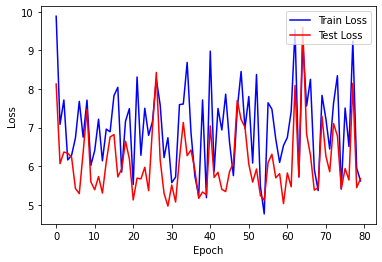

In [196]:
# loss_l = [(loss_list[i*10] - mi)/(ma - mi) for i in range(int(len(loss_list)/10))]
import numpy as np
count = 100
# loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(10000) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 100]


loss_l = [loss_list[i].item() for i in range(count)]
loss_l = [np.mean([n.item() for n in loss_list[i*10:i*10+10]]) for i in range(count) if np.mean([n.item() for n in loss_list[i*10:i*10+10]]) < 1000]


loss_test_l = [test_loss_list[i].item() for i in range(count)]
loss_test_l = [np.mean([n.item() for n in test_loss_list[i*10:i*10+10]]) for i in range(count) if np.mean([n.item() for n in test_loss_list[i*10:i*10+10]]) < 1000]

plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot([i for i in range(len(loss_l))],loss_l, 'blue', label='Train Loss')
plt.plot([i for i in range(len(test_loss_list))][:count],loss_test_l, 'red', label='Test Loss')
plt.legend(loc='upper right')
plt.show()





In [79]:
loss_l

[350.82299346923827,
 256.828311920166,
 289.1947135925293,
 17909.129037475584,
 260.6955932617187,
 410.00671195983887,
 113.0715705871582,
 1660.5524810791017,
 543.3353088378906,
 2952.8409065246583,
 236.65795097351074,
 712.2533824920654,
 17325.400344085694,
 145.5594970703125,
 146.74142532348634,
 125.4530029296875,
 120.09564933776855,
 770.2570196151734,
 137.3720561981201,
 647.5027481079102,
 9543.063697052003,
 222.0661138534546,
 197.82502822875978,
 241.91688919067383,
 862.5016178131103,
 1931.6265922546386,
 2065.549223327637,
 224.05716552734376,
 780.1361148834228,
 619.616609954834,
 155.88958587646485,
 261.68882942199707,
 17916.83288269043,
 301.2502380371094,
 9355.31238861084,
 699.888487625122,
 202.2978542327881,
 146.57321281433104,
 17402.799607467652,
 323.3642997741699,
 245.76093826293945,
 99.79031181335449,
 156.16850204467772,
 286.0754737854004,
 582.2381237030029,
 93.90922203063965,
 119.24697380065918,
 17820.148694705964,
 9690.878521728515,
 10

In [33]:
torch.save(deepmodel.state_dict(), './last_all_feature_and_all_norm_L2.pth')
torch.save(deepmodel2.state_dict(), './last_all_feature_and_all_norm_L1.pth')

# train Fin

# L1 case Start

In [32]:
torch.set_printoptions(sci_mode=False)

In [24]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L1.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [25]:
pred_y = deepmodel(x_test)

In [26]:
pred_y.shape

torch.Size([3454, 1])

In [33]:
y_test = y_test.reshape(-1,1)
y_test

tensor([[    0.0005],
        [    0.1658],
        [    0.0533],
        ...,
        [    0.4124],
        [    0.2739],
        [    6.8481]], device='cuda:0')

In [28]:
pred_y.mean()

tensor(2.6136, device='cuda:0', grad_fn=<MeanBackward0>)

In [29]:
torch.mean(torch.abs(pred_y - y_test))

tensor(4.6064, device='cuda:0', grad_fn=<MeanBackward0>)

# test Field

In [43]:
tmp = [n[0].item() for n in pred_y]
tmp.sort()
tmp

[-0.005642756819725037,
 0.02390320599079132,
 0.02627129852771759,
 0.0509151965379715,
 0.05098690092563629,
 0.06120587885379791,
 0.07664056122303009,
 0.09182430803775787,
 0.09586478769779205,
 0.09642459452152252,
 0.09786529839038849,
 0.11332018673419952,
 0.1390823870897293,
 0.14232434332370758,
 0.14415831863880157,
 0.1525857001543045,
 0.15860463678836823,
 0.16108639538288116,
 0.1753035932779312,
 0.17902500927448273,
 0.1946076899766922,
 0.20628060400485992,
 0.20771504938602448,
 0.21482272446155548,
 0.21774275600910187,
 0.21943141520023346,
 0.22071106731891632,
 0.2269672304391861,
 0.2281833440065384,
 0.22858412563800812,
 0.23101110756397247,
 0.23226167261600494,
 0.2390892654657364,
 0.2508533000946045,
 0.25204944610595703,
 0.25502490997314453,
 0.2724420428276062,
 0.2768123149871826,
 0.27733004093170166,
 0.2777867317199707,
 0.27788472175598145,
 0.285003662109375,
 0.2851952314376831,
 0.2858182191848755,
 0.28627753257751465,
 0.2894499897956848,
 0.

In [35]:
y_test

tensor([[    0.0005],
        [    0.1658],
        [    0.0533],
        ...,
        [    0.4124],
        [    0.2739],
        [    6.8481]], device='cuda:0')

# test Field

In [40]:
diff_list = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [41]:
diff_list = np.array(diff_list)

In [42]:
#import matplotlib.pyplot as plt
#import numpy as np
#plt.figure(figsize=(40,5))
#plt.plot(np.arange(4143), [x.item() - y.item() for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
#plt.plot(np.arange(4143), [x.item() for x in ])

In [43]:
#gt = [y.item() for y in y_test.reshape(-1)]
#pred = [y.item() for y in pred_y.reshape(-1)]
#plt.figure(figsize=(40,5))
#plt.scatter(gt, pred)

In [44]:
#r = np.corrcoef(gt, pred)
#print (r)

#import scipy.stats as stat
#stat.pearsonr(gt, pred)
#res = stat.linregress(gt, pred)
#print (res)

In [45]:
import seaborn as sns

## just < 10

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9d8cf1c130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9d8cf1c7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9d8cf82d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9d8cf1ceb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9d8cf27250>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

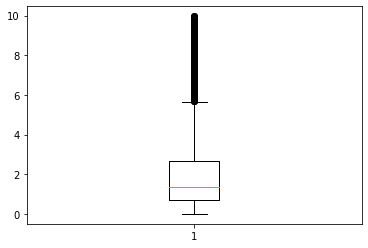

In [46]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1)) if np.abs(x.item() - y.item()) < 10])


## original

[Text(1, 0, 'BEFORE')]

<Figure size 72x7200 with 0 Axes>

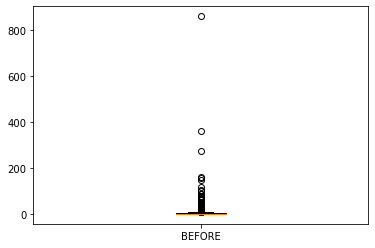

In [47]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [48]:
#new_diff_list = diff_list[np.abs(diff_list) < 1*diff_list.std()]
#(new_diff_list).mean()

In [49]:
#new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
#plt.figure(figsize=(1,100))

#fig, ax = plt.subplots()
#ax.boxplot(new_diff_list)

In [50]:
diff_list = np.sort(diff_list)

In [51]:
q1 = np.percentile(diff_list, 25)
q3 = np.percentile(diff_list, 75)

In [52]:
q3

3.5751542896032333

In [53]:
iqr = q3 - q1

In [54]:
outlier = 1.5*iqr

In [55]:
outlier

4.244626052677631

In [56]:
r = np.array([x for x in diff_list if (x > q1 - outlier and x < q3 +outlier)])
len(r)

2990

In [57]:
r.mean()

1.826361874411739

In [58]:
r1 = np.array([x for x in diff_list if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

464

<ipython-input-59-51b7d7383511>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["AFTER"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9d8cea3a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9d8cea3220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9d8cea36d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9d8cead130>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9d8cead490>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

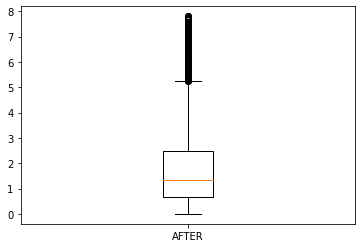

In [59]:
new_diff_list = diff_list[np.abs(diff_list) <= 1*diff_list.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r)

# L1 case Fin && L2 case Start

In [60]:
deepmodel = DeepModel(df.shape[1]-1, 1).to(device)
deepmodel.load_state_dict(torch.load(path+"last_all_feature_and_all_norm_L2.pth"))
deepmodel.eval()

DeepModel(
  (basic): BatchNorm1d(11, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Linear(in_features=11, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer2): Linear(in_features=256, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (head): Linear(in_features=64, out_features=1, bias=True)
)

In [61]:
pred_y = deepmodel(x_test)

In [62]:
y_test.min()

tensor(0.0001, device='cuda:0')

In [63]:
pred_y.max()

tensor(36.7258, device='cuda:0', grad_fn=<MaxBackward1>)

In [64]:
n = pred_y - y_test
n.max()

tensor(36.5096, device='cuda:0', grad_fn=<MaxBackward1>)

In [65]:
y_test = y_test.reshape(-1,1)
torch.mean(torch.abs(pred_y - y_test))

tensor(6.7177, device='cuda:0', grad_fn=<MeanBackward0>)

In [66]:
diff_list_L2 = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]

In [67]:
diff_list_L2 = np.array(diff_list_L2)

In [68]:
import seaborn as sns

## original

[Text(1, 0, 'BEFORE')]

<Figure size 72x7200 with 0 Axes>

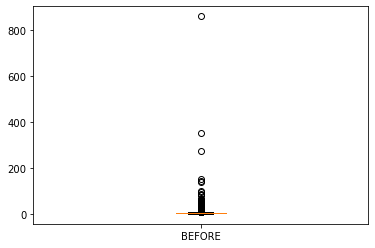

In [69]:
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.boxplot([np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))])
ax.set_xticklabels(["BEFORE"])



In [70]:
diff_list_L2 = np.sort(diff_list_L2)

In [71]:
q1 = np.percentile(diff_list_L2, 25)
q3 = np.percentile(diff_list_L2, 75)

In [72]:
iqr = q3 - q1

In [73]:
outlier = 1.5*iqr

In [74]:
r_l2 = np.array([x for x in diff_list_L2 if (x > q1 - outlier and x < q3 +outlier)])
len(r_l2)

2832

In [75]:
r_l2.mean()

2.963554989890311

In [76]:
r1 = np.array([x for x in diff_list_L2 if (x < q1 - outlier or x > q3 + outlier)])
len(r1)

622

<ipython-input-77-9b88de2c6935>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["AFTER"])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9d8ce35550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9d8ce35c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9d8ce351f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9d8ce2f5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9d8ce07b50>],
 'means': []}

<Figure size 72x7200 with 0 Axes>

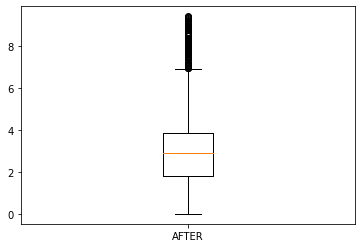

In [77]:
new_diff_list = diff_list_L2[np.abs(diff_list_L2) <= 1*diff_list_L2.std()]
plt.figure(figsize=(1,100))

fig, ax = plt.subplots()
ax.set_xticklabels(["AFTER"])
ax.boxplot(r_l2)

# L2 case Finish

In [78]:
######################

# for bar plot

In [157]:
outlier_l1_after = np.round(r.mean(), 2)

NameError: name 'r' is not defined

In [80]:
outlier_l1_before = np.round(diff_list.mean(), 2)

In [81]:
outlier_l2_after = np.round(r_l2.mean(), 2)

In [82]:
outlier_l2_before = np.round(diff_list_L2.mean(), 2)

In [156]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['L1', 'L2']
before_list = [outlier_l1_before, outlier_l2_before]
after_list = [outlier_l1_after, outlier_l2_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

NameError: name 'outlier_l1_before' is not defined

In [84]:
res = [np.abs(x.item() - y.item()) for x, y in zip(pred_y.reshape(-1), y_test.reshape(-1))]
cnt = 0
tot = []
for i in range(len(res)):
    if res[i] > 20:
        cnt+=1
        tot.append(res[i])

261


/home/jihoon/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

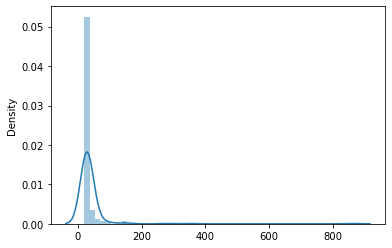

In [85]:
print(cnt)
sns.distplot(tot)

In [86]:
df['next_year_percent'].min()

1.3091428667610496e-05

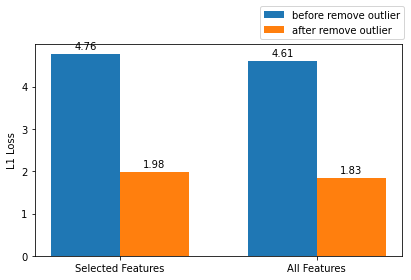

In [168]:
import matplotlib
import matplotlib.pyplot as plt
# plt.figure(figsize=(5, 30))
labels = ['Selected Features', 'All Features']
outlier_l1_s_before = 4.76

outlier_l1_s_after = 1.98

outlier_l1_a_before = 4.61

outlier_l1_a_after = 1.83


before_list = [outlier_l1_s_before, outlier_l1_a_before]
after_list = [outlier_l1_s_after, outlier_l1_a_after]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, before_list, width, label='before remove outlier')
rects2 = ax.bar(x + width/2, after_list, width, label='after remove outlier')
ax.set_ylabel('L1 Loss')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(0.6,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2 , height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()